## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha'])
y = pd.DataFrame(select, columns= ['LN_GS_cub_m'])

In [8]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [9]:
# Columns in "y" data collections
y.head()

,LN_GS_cub_m
0,3.78
1,5.54
2,5.25
3,5.63
4,4.96


# Create first XGBoost model for estimate varibiality of output stats

In [10]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [11]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [12]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [13]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9789140187091119, 0.9688312979979845, 0.9759904003286598]
    Mean: 0.975
    Std: 0.004

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.15933748 0.14378243 0.14608534]
    Mean: 0.150
    Std: 0.007

 --------------------
Mean absolute error (MAE): 

    Scores: [0.09184313030509683, 0.08997230976611584, 0.09025455334312037]
    Mean: 0.091
    Std: 0.001

 --------------------


# Add optimal hyperparameters for XGBoost model

In [15]:
# Hyperparameters data for the next step/stage
p1 = 0.8821030853351247                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.011864622396297486               # gamma
print('Gamma: ' + str(p2))

p3 = 0.1209976158148326                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 178         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.5339951896800694                 # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8821030853351247
Gamma: 0.011864622396297486
Learning_rate: 0.1209976158148326
Max_depth: 4
N_estimators: 178
Subsample: 0.5339951896800694


# Estimation of predictive quality to basic XGBoost models using Loops

In [16]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [17]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:4.15021	validation_1-rmse:4.27881
[1]	validation_0-rmse:3.65493	validation_1-rmse:3.77028
[2]	validation_0-rmse:3.22147	validation_1-rmse:3.32398
[3]	validation_0-rmse:2.83856	validation_1-rmse:2.93374
[4]	validation_0-rmse:2.50364	validation_1-rmse:2.58866
[5]	validation_0-rmse:2.20748	validation_1-rmse:2.28570


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.94760	validation_1-rmse:2.01929
[7]	validation_0-rmse:1.71819	validation_1-rmse:1.78588
[8]	validation_0-rmse:1.51673	validation_1-rmse:1.57899
[9]	validation_0-rmse:1.33772	validation_1-rmse:1.39456
[10]	validation_0-rmse:1.18234	validation_1-rmse:1.23275
[11]	validation_0-rmse:1.04612	validation_1-rmse:1.09426
[12]	validation_0-rmse:0.92315	validation_1-rmse:0.96689
[13]	validation_0-rmse:0.81498	validation_1-rmse:0.85706
[14]	validation_0-rmse:0.72104	validation_1-rmse:0.75979
[15]	validation_0-rmse:0.63894	validation_1-rmse:0.67427
[16]	validation_0-rmse:0.56656	validation_1-rmse:0.60118
[17]	validation_0-rmse:0.50247	validation_1-rmse:0.53631
[18]	validation_0-rmse:0.44691	validation_1-rmse:0.47950
[19]	validation_0-rmse:0.39838	validation_1-rmse:0.43046
[20]	validation_0-rmse:0.35517	validation_1-rmse:0.38705
[21]	validation_0-rmse:0.31726	validation_1-rmse:0.34794
[22]	validation_0-rmse:0.28484	validation_1-rmse:0.31591
[23]	validation_0-rmse:0.25731	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16333	validation_1-rmse:4.22020
[1]	validation_0-rmse:3.66934	validation_1-rmse:3.71467
[2]	validation_0-rmse:3.22970	validation_1-rmse:3.27419
[3]	validation_0-rmse:2.84501	validation_1-rmse:2.88939
[4]	validation_0-rmse:2.50611	validation_1-rmse:2.54301


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.20953	validation_1-rmse:2.24383
[6]	validation_0-rmse:1.94878	validation_1-rmse:1.98133
[7]	validation_0-rmse:1.71800	validation_1-rmse:1.74775
[8]	validation_0-rmse:1.51387	validation_1-rmse:1.53903
[9]	validation_0-rmse:1.33434	validation_1-rmse:1.35792
[10]	validation_0-rmse:1.17745	validation_1-rmse:1.19830
[11]	validation_0-rmse:1.04029	validation_1-rmse:1.06155
[12]	validation_0-rmse:0.91902	validation_1-rmse:0.93621
[13]	validation_0-rmse:0.81399	validation_1-rmse:0.83140
[14]	validation_0-rmse:0.71992	validation_1-rmse:0.73594
[15]	validation_0-rmse:0.63785	validation_1-rmse:0.65335
[16]	validation_0-rmse:0.56645	validation_1-rmse:0.58339
[17]	validation_0-rmse:0.50349	validation_1-rmse:0.52079
[18]	validation_0-rmse:0.44791	validation_1-rmse:0.46540
[19]	validation_0-rmse:0.39830	validation_1-rmse:0.41759
[20]	validation_0-rmse:0.35592	validation_1-rmse:0.37652
[21]	validation_0-rmse:0.31854	validation_1-rmse:0.34041
[22]	validation_0-rmse:0.28686	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17945	validation_1-rmse:4.15182
[1]	validation_0-rmse:3.68184	validation_1-rmse:3.65663


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24262	validation_1-rmse:3.22122
[3]	validation_0-rmse:2.85600	validation_1-rmse:2.83819
[4]	validation_0-rmse:2.51559	validation_1-rmse:2.49961
[5]	validation_0-rmse:2.21821	validation_1-rmse:2.20433
[6]	validation_0-rmse:1.95578	validation_1-rmse:1.94197
[7]	validation_0-rmse:1.72474	validation_1-rmse:1.71412
[8]	validation_0-rmse:1.52181	validation_1-rmse:1.51268
[9]	validation_0-rmse:1.34217	validation_1-rmse:1.33547
[10]	validation_0-rmse:1.18452	validation_1-rmse:1.17823
[11]	validation_0-rmse:1.04607	validation_1-rmse:1.04138
[12]	validation_0-rmse:0.92308	validation_1-rmse:0.91943
[13]	validation_0-rmse:0.81635	validation_1-rmse:0.81420
[14]	validation_0-rmse:0.72150	validation_1-rmse:0.71978
[15]	validation_0-rmse:0.63802	validation_1-rmse:0.63868
[16]	validation_0-rmse:0.56637	validation_1-rmse:0.56854
[17]	validation_0-rmse:0.50360	validation_1-rmse:0.50780
[18]	validation_0-rmse:0.44758	validation_1-rmse:0.45245
[19]	validation_0-rmse:0.39831	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18827	validation_1-rmse:4.13504


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69083	validation_1-rmse:3.63879
[2]	validation_0-rmse:3.25364	validation_1-rmse:3.20561
[3]	validation_0-rmse:2.86701	validation_1-rmse:2.82665
[4]	validation_0-rmse:2.52653	validation_1-rmse:2.49167
[5]	validation_0-rmse:2.22862	validation_1-rmse:2.19469
[6]	validation_0-rmse:1.96539	validation_1-rmse:1.93919
[7]	validation_0-rmse:1.73299	validation_1-rmse:1.71240
[8]	validation_0-rmse:1.52957	validation_1-rmse:1.51374
[9]	validation_0-rmse:1.34826	validation_1-rmse:1.33600
[10]	validation_0-rmse:1.18953	validation_1-rmse:1.17993
[11]	validation_0-rmse:1.05139	validation_1-rmse:1.04232
[12]	validation_0-rmse:0.92995	validation_1-rmse:0.92266
[13]	validation_0-rmse:0.82117	validation_1-rmse:0.81639
[14]	validation_0-rmse:0.72646	validation_1-rmse:0.72509
[15]	validation_0-rmse:0.64377	validation_1-rmse:0.64487
[16]	validation_0-rmse:0.57065	validation_1-rmse:0.57260
[17]	validation_0-rmse:0.50686	validation_1-rmse:0.50920
[18]	validation_0-rmse:0.45054	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17169	validation_1-rmse:4.19929
[1]	validation_0-rmse:3.67670	validation_1-rmse:3.70212
[2]	validation_0-rmse:3.23727	validation_1-rmse:3.26112
[3]	validation_0-rmse:2.85172	validation_1-rmse:2.87565
[4]	validation_0-rmse:2.51428	validation_1-rmse:2.54122
[5]	validation_0-rmse:2.21822	validation_1-rmse:2.24333
[6]	validation_0-rmse:1.95328	validation_1-rmse:1.97652
[7]	validation_0-rmse:1.72290	validation_1-rmse:1.74567
[8]	validation_0-rmse:1.51933	validation_1-rmse:1.53881
[9]	validation_0-rmse:1.34011	validation_1-rmse:1.35942
[10]	validation_0-rmse:1.18404	validation_1-rmse:1.20434
[11]	validation_0-rmse:1.04437	validation_1-rmse:1.06548
[12]	validation_0-rmse:0.92269	validation_1-rmse:0.94334
[13]	validation_0-rmse:0.81610	validation_1-rmse:0.83808
[14]	validation_0-rmse:0.72101	validation_1-rmse:0.74478
[15]	validation_0-rmse:0.63855	validation_1-rmse:0.66258
[16]	validation_0-rmse:0.56604	validation_1-rmse:0.58934
[17]	validation_0-rmse:0.50150	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18010	validation_1-rmse:4.17083
[1]	validation_0-rmse:3.68219	validation_1-rmse:3.67432
[2]	validation_0-rmse:3.24311	validation_1-rmse:3.23566


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85951	validation_1-rmse:2.85217
[4]	validation_0-rmse:2.52115	validation_1-rmse:2.50891
[5]	validation_0-rmse:2.22489	validation_1-rmse:2.21319
[6]	validation_0-rmse:1.96234	validation_1-rmse:1.95272
[7]	validation_0-rmse:1.73133	validation_1-rmse:1.72335
[8]	validation_0-rmse:1.52637	validation_1-rmse:1.51952
[9]	validation_0-rmse:1.34735	validation_1-rmse:1.34200
[10]	validation_0-rmse:1.18886	validation_1-rmse:1.18284
[11]	validation_0-rmse:1.04962	validation_1-rmse:1.04607
[12]	validation_0-rmse:0.92738	validation_1-rmse:0.92665
[13]	validation_0-rmse:0.82029	validation_1-rmse:0.81953
[14]	validation_0-rmse:0.72638	validation_1-rmse:0.72641
[15]	validation_0-rmse:0.64287	validation_1-rmse:0.64341
[16]	validation_0-rmse:0.57028	validation_1-rmse:0.57162
[17]	validation_0-rmse:0.50695	validation_1-rmse:0.51018
[18]	validation_0-rmse:0.45103	validation_1-rmse:0.45426
[19]	validation_0-rmse:0.40245	validation_1-rmse:0.40634
[20]	validation_0-rmse:0.35951	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16669	validation_1-rmse:4.23216


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67168	validation_1-rmse:3.73228
[2]	validation_0-rmse:3.23634	validation_1-rmse:3.28675
[3]	validation_0-rmse:2.85144	validation_1-rmse:2.89687
[4]	validation_0-rmse:2.51238	validation_1-rmse:2.55171
[5]	validation_0-rmse:2.21425	validation_1-rmse:2.24729
[6]	validation_0-rmse:1.95050	validation_1-rmse:1.98158
[7]	validation_0-rmse:1.71694	validation_1-rmse:1.74387
[8]	validation_0-rmse:1.51507	validation_1-rmse:1.54071
[9]	validation_0-rmse:1.33606	validation_1-rmse:1.35995
[10]	validation_0-rmse:1.17820	validation_1-rmse:1.20050
[11]	validation_0-rmse:1.03966	validation_1-rmse:1.05990
[12]	validation_0-rmse:0.91836	validation_1-rmse:0.93842
[13]	validation_0-rmse:0.81148	validation_1-rmse:0.83048
[14]	validation_0-rmse:0.71790	validation_1-rmse:0.73686
[15]	validation_0-rmse:0.63571	validation_1-rmse:0.65390
[16]	validation_0-rmse:0.56341	validation_1-rmse:0.58126
[17]	validation_0-rmse:0.49959	validation_1-rmse:0.51781
[18]	validation_0-rmse:0.44539	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17644	validation_1-rmse:4.17177
[1]	validation_0-rmse:3.67858	validation_1-rmse:3.68190


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24109	validation_1-rmse:3.24586
[3]	validation_0-rmse:2.85418	validation_1-rmse:2.86583
[4]	validation_0-rmse:2.51684	validation_1-rmse:2.52995
[5]	validation_0-rmse:2.21794	validation_1-rmse:2.23358
[6]	validation_0-rmse:1.95527	validation_1-rmse:1.97502
[7]	validation_0-rmse:1.72214	validation_1-rmse:1.74138
[8]	validation_0-rmse:1.51988	validation_1-rmse:1.54010
[9]	validation_0-rmse:1.33969	validation_1-rmse:1.35959
[10]	validation_0-rmse:1.18297	validation_1-rmse:1.20564
[11]	validation_0-rmse:1.04508	validation_1-rmse:1.06977
[12]	validation_0-rmse:0.92314	validation_1-rmse:0.94945
[13]	validation_0-rmse:0.81601	validation_1-rmse:0.84193
[14]	validation_0-rmse:0.72178	validation_1-rmse:0.74795
[15]	validation_0-rmse:0.63892	validation_1-rmse:0.66589
[16]	validation_0-rmse:0.56656	validation_1-rmse:0.59458
[17]	validation_0-rmse:0.50252	validation_1-rmse:0.53177
[18]	validation_0-rmse:0.44745	validation_1-rmse:0.47751
[19]	validation_0-rmse:0.39763	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17816	validation_1-rmse:4.16283
[1]	validation_0-rmse:3.68038	validation_1-rmse:3.66628
[2]	validation_0-rmse:3.24234	validation_1-rmse:3.22862


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85608	validation_1-rmse:2.84331
[4]	validation_0-rmse:2.51909	validation_1-rmse:2.50778
[5]	validation_0-rmse:2.21928	validation_1-rmse:2.21197
[6]	validation_0-rmse:1.95760	validation_1-rmse:1.95071
[7]	validation_0-rmse:1.72833	validation_1-rmse:1.72521
[8]	validation_0-rmse:1.52528	validation_1-rmse:1.52322
[9]	validation_0-rmse:1.34562	validation_1-rmse:1.34421
[10]	validation_0-rmse:1.18687	validation_1-rmse:1.18557
[11]	validation_0-rmse:1.04826	validation_1-rmse:1.04609
[12]	validation_0-rmse:0.92746	validation_1-rmse:0.92572
[13]	validation_0-rmse:0.81965	validation_1-rmse:0.81597
[14]	validation_0-rmse:0.72632	validation_1-rmse:0.72343
[15]	validation_0-rmse:0.64317	validation_1-rmse:0.64014
[16]	validation_0-rmse:0.57002	validation_1-rmse:0.56785
[17]	validation_0-rmse:0.50662	validation_1-rmse:0.50663
[18]	validation_0-rmse:0.45132	validation_1-rmse:0.45193
[19]	validation_0-rmse:0.40250	validation_1-rmse:0.40482
[20]	validation_0-rmse:0.35960	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18554	validation_1-rmse:4.12550
[1]	validation_0-rmse:3.68648	validation_1-rmse:3.62957


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24918	validation_1-rmse:3.20106
[3]	validation_0-rmse:2.86218	validation_1-rmse:2.82124
[4]	validation_0-rmse:2.52276	validation_1-rmse:2.48924
[5]	validation_0-rmse:2.22409	validation_1-rmse:2.19221
[6]	validation_0-rmse:1.95826	validation_1-rmse:1.92967
[7]	validation_0-rmse:1.72626	validation_1-rmse:1.70508
[8]	validation_0-rmse:1.52408	validation_1-rmse:1.50680
[9]	validation_0-rmse:1.34401	validation_1-rmse:1.33078
[10]	validation_0-rmse:1.18700	validation_1-rmse:1.17673
[11]	validation_0-rmse:1.04850	validation_1-rmse:1.04228
[12]	validation_0-rmse:0.92610	validation_1-rmse:0.92179
[13]	validation_0-rmse:0.81899	validation_1-rmse:0.81754
[14]	validation_0-rmse:0.72380	validation_1-rmse:0.72486
[15]	validation_0-rmse:0.64149	validation_1-rmse:0.64478
[16]	validation_0-rmse:0.56862	validation_1-rmse:0.57441
[17]	validation_0-rmse:0.50422	validation_1-rmse:0.51232
[18]	validation_0-rmse:0.44833	validation_1-rmse:0.45871
[19]	validation_0-rmse:0.39957	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15706	validation_1-rmse:4.25693
[1]	validation_0-rmse:3.66241	validation_1-rmse:3.74894
[2]	validation_0-rmse:3.22675	validation_1-rmse:3.30647
[3]	validation_0-rmse:2.84280	validation_1-rmse:2.91869
[4]	validation_0-rmse:2.50358	validation_1-rmse:2.56957


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.20838	validation_1-rmse:2.26394
[6]	validation_0-rmse:1.94607	validation_1-rmse:1.99834
[7]	validation_0-rmse:1.71568	validation_1-rmse:1.76238
[8]	validation_0-rmse:1.51148	validation_1-rmse:1.55434
[9]	validation_0-rmse:1.33403	validation_1-rmse:1.37124
[10]	validation_0-rmse:1.17620	validation_1-rmse:1.20853
[11]	validation_0-rmse:1.03876	validation_1-rmse:1.06730
[12]	validation_0-rmse:0.91878	validation_1-rmse:0.94427
[13]	validation_0-rmse:0.81124	validation_1-rmse:0.83528
[14]	validation_0-rmse:0.71762	validation_1-rmse:0.73979
[15]	validation_0-rmse:0.63530	validation_1-rmse:0.65682
[16]	validation_0-rmse:0.56242	validation_1-rmse:0.58377
[17]	validation_0-rmse:0.49803	validation_1-rmse:0.51801
[18]	validation_0-rmse:0.44326	validation_1-rmse:0.46237
[19]	validation_0-rmse:0.39433	validation_1-rmse:0.41302
[20]	validation_0-rmse:0.35176	validation_1-rmse:0.37143
[21]	validation_0-rmse:0.31471	validation_1-rmse:0.33457
[22]	validation_0-rmse:0.28290	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18457	validation_1-rmse:4.13851
[1]	validation_0-rmse:3.68361	validation_1-rmse:3.64314
[2]	validation_0-rmse:3.24585	validation_1-rmse:3.21123


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86109	validation_1-rmse:2.83669
[4]	validation_0-rmse:2.52129	validation_1-rmse:2.50420
[5]	validation_0-rmse:2.22026	validation_1-rmse:2.20881
[6]	validation_0-rmse:1.95895	validation_1-rmse:1.95319
[7]	validation_0-rmse:1.72627	validation_1-rmse:1.72451
[8]	validation_0-rmse:1.52259	validation_1-rmse:1.52379
[9]	validation_0-rmse:1.34286	validation_1-rmse:1.34725
[10]	validation_0-rmse:1.18553	validation_1-rmse:1.19630
[11]	validation_0-rmse:1.04651	validation_1-rmse:1.06079
[12]	validation_0-rmse:0.92570	validation_1-rmse:0.94411
[13]	validation_0-rmse:0.81829	validation_1-rmse:0.84036
[14]	validation_0-rmse:0.72300	validation_1-rmse:0.74846
[15]	validation_0-rmse:0.63963	validation_1-rmse:0.66924
[16]	validation_0-rmse:0.56692	validation_1-rmse:0.60064
[17]	validation_0-rmse:0.50308	validation_1-rmse:0.53948
[18]	validation_0-rmse:0.44801	validation_1-rmse:0.48781
[19]	validation_0-rmse:0.39902	validation_1-rmse:0.44047
[20]	validation_0-rmse:0.35698	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17825	validation_1-rmse:4.17988
[1]	validation_0-rmse:3.68066	validation_1-rmse:3.68307
[2]	validation_0-rmse:3.24180	validation_1-rmse:3.24284
[3]	validation_0-rmse:2.85425	validation_1-rmse:2.85185
[4]	validation_0-rmse:2.51635	validation_1-rmse:2.51248


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21698	validation_1-rmse:2.21228
[6]	validation_0-rmse:1.95508	validation_1-rmse:1.95180
[7]	validation_0-rmse:1.72422	validation_1-rmse:1.72211
[8]	validation_0-rmse:1.52217	validation_1-rmse:1.51987
[9]	validation_0-rmse:1.34231	validation_1-rmse:1.33924
[10]	validation_0-rmse:1.18573	validation_1-rmse:1.18294
[11]	validation_0-rmse:1.04874	validation_1-rmse:1.04576
[12]	validation_0-rmse:0.92655	validation_1-rmse:0.92366
[13]	validation_0-rmse:0.82009	validation_1-rmse:0.81758
[14]	validation_0-rmse:0.72604	validation_1-rmse:0.72361
[15]	validation_0-rmse:0.64367	validation_1-rmse:0.64225
[16]	validation_0-rmse:0.57191	validation_1-rmse:0.57016
[17]	validation_0-rmse:0.50779	validation_1-rmse:0.50661
[18]	validation_0-rmse:0.45155	validation_1-rmse:0.44985
[19]	validation_0-rmse:0.40297	validation_1-rmse:0.40088
[20]	validation_0-rmse:0.36068	validation_1-rmse:0.35894
[21]	validation_0-rmse:0.32390	validation_1-rmse:0.32297
[22]	validation_0-rmse:0.29161	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17359	validation_1-rmse:4.20265


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67986	validation_1-rmse:3.71320
[2]	validation_0-rmse:3.24157	validation_1-rmse:3.27611
[3]	validation_0-rmse:2.85814	validation_1-rmse:2.89258
[4]	validation_0-rmse:2.51920	validation_1-rmse:2.55244
[5]	validation_0-rmse:2.22027	validation_1-rmse:2.25619
[6]	validation_0-rmse:1.95539	validation_1-rmse:1.99092
[7]	validation_0-rmse:1.72377	validation_1-rmse:1.75904
[8]	validation_0-rmse:1.51932	validation_1-rmse:1.55656
[9]	validation_0-rmse:1.33970	validation_1-rmse:1.37707
[10]	validation_0-rmse:1.18260	validation_1-rmse:1.21908
[11]	validation_0-rmse:1.04540	validation_1-rmse:1.08187
[12]	validation_0-rmse:0.92366	validation_1-rmse:0.96136
[13]	validation_0-rmse:0.81548	validation_1-rmse:0.85243
[14]	validation_0-rmse:0.72163	validation_1-rmse:0.75841
[15]	validation_0-rmse:0.63935	validation_1-rmse:0.67465
[16]	validation_0-rmse:0.56583	validation_1-rmse:0.60115
[17]	validation_0-rmse:0.50352	validation_1-rmse:0.53890
[18]	validation_0-rmse:0.44676	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17585	validation_1-rmse:4.18426
[1]	validation_0-rmse:3.68240	validation_1-rmse:3.69161
[2]	validation_0-rmse:3.24363	validation_1-rmse:3.25545
[3]	validation_0-rmse:2.85714	validation_1-rmse:2.86778
[4]	validation_0-rmse:2.51702	validation_1-rmse:2.52891
[5]	validation_0-rmse:2.21795	validation_1-rmse:2.22955
[6]	validation_0-rmse:1.95525	validation_1-rmse:1.96783
[7]	validation_0-rmse:1.72462	validation_1-rmse:1.73637
[8]	validation_0-rmse:1.52068	validation_1-rmse:1.53236
[9]	validation_0-rmse:1.34263	validation_1-rmse:1.35503
[10]	validation_0-rmse:1.18514	validation_1-rmse:1.19603
[11]	validation_0-rmse:1.04712	validation_1-rmse:1.05546
[12]	validation_0-rmse:0.92756	validation_1-rmse:0.93421
[13]	validation_0-rmse:0.81963	validation_1-rmse:0.82708
[14]	validation_0-rmse:0.72672	validation_1-rmse:0.73347
[15]	validation_0-rmse:0.64406	validation_1-rmse:0.65044
[16]	validation_0-rmse:0.57050	validation_1-rmse:0.57650
[17]	validation_0-rmse:0.50676	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16724	validation_1-rmse:4.20559
[1]	validation_0-rmse:3.66921	validation_1-rmse:3.70367
[2]	validation_0-rmse:3.23155	validation_1-rmse:3.26165
[3]	validation_0-rmse:2.84724	validation_1-rmse:2.87245
[4]	validation_0-rmse:2.50624	validation_1-rmse:2.52845


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.20848	validation_1-rmse:2.22558
[6]	validation_0-rmse:1.94722	validation_1-rmse:1.96246
[7]	validation_0-rmse:1.71741	validation_1-rmse:1.72877
[8]	validation_0-rmse:1.51368	validation_1-rmse:1.52163
[9]	validation_0-rmse:1.33627	validation_1-rmse:1.34156
[10]	validation_0-rmse:1.17956	validation_1-rmse:1.18385
[11]	validation_0-rmse:1.04008	validation_1-rmse:1.04347
[12]	validation_0-rmse:0.91868	validation_1-rmse:0.92122
[13]	validation_0-rmse:0.81234	validation_1-rmse:0.81369
[14]	validation_0-rmse:0.71836	validation_1-rmse:0.71824
[15]	validation_0-rmse:0.63572	validation_1-rmse:0.63588
[16]	validation_0-rmse:0.56274	validation_1-rmse:0.56289
[17]	validation_0-rmse:0.50071	validation_1-rmse:0.50108
[18]	validation_0-rmse:0.44592	validation_1-rmse:0.44672
[19]	validation_0-rmse:0.39813	validation_1-rmse:0.39786
[20]	validation_0-rmse:0.35500	validation_1-rmse:0.35547
[21]	validation_0-rmse:0.31723	validation_1-rmse:0.31862
[22]	validation_0-rmse:0.28686	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16831	validation_1-rmse:4.20404
[1]	validation_0-rmse:3.67600	validation_1-rmse:3.70937
[2]	validation_0-rmse:3.23673	validation_1-rmse:3.26363
[3]	validation_0-rmse:2.85298	validation_1-rmse:2.87865
[4]	validation_0-rmse:2.51400	validation_1-rmse:2.54049
[5]	validation_0-rmse:2.21811	validation_1-rmse:2.24359
[6]	validation_0-rmse:1.95655	validation_1-rmse:1.98004
[7]	validation_0-rmse:1.72423	validation_1-rmse:1.74351
[8]	validation_0-rmse:1.52067	validation_1-rmse:1.53625
[9]	validation_0-rmse:1.34150	validation_1-rmse:1.35670
[10]	validation_0-rmse:1.18408	validation_1-rmse:1.19614
[11]	validation_0-rmse:1.04449	validation_1-rmse:1.05431
[12]	validation_0-rmse:0.92271	validation_1-rmse:0.93201
[13]	validation_0-rmse:0.81494	validation_1-rmse:0.82507
[14]	validation_0-rmse:0.72061	validation_1-rmse:0.72891
[15]	validation_0-rmse:0.63874	validation_1-rmse:0.64583
[16]	validation_0-rmse:0.56693	validation_1-rmse:0.57376
[17]	validation_0-rmse:0.50267	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18342	validation_1-rmse:4.15373
[1]	validation_0-rmse:3.68574	validation_1-rmse:3.66086
[2]	validation_0-rmse:3.24604	validation_1-rmse:3.22859
[3]	validation_0-rmse:2.85869	validation_1-rmse:2.84368
[4]	validation_0-rmse:2.51869	validation_1-rmse:2.50687
[5]	validation_0-rmse:2.21992	validation_1-rmse:2.20812
[6]	validation_0-rmse:1.95580	validation_1-rmse:1.94747
[7]	validation_0-rmse:1.72417	validation_1-rmse:1.71752
[8]	validation_0-rmse:1.52077	validation_1-rmse:1.51573
[9]	validation_0-rmse:1.34170	validation_1-rmse:1.33908
[10]	validation_0-rmse:1.18294	validation_1-rmse:1.18025
[11]	validation_0-rmse:1.04593	validation_1-rmse:1.04332
[12]	validation_0-rmse:0.92452	validation_1-rmse:0.92235
[13]	validation_0-rmse:0.81739	validation_1-rmse:0.81680
[14]	validation_0-rmse:0.72205	validation_1-rmse:0.72197
[15]	validation_0-rmse:0.64034	validation_1-rmse:0.64176
[16]	validation_0-rmse:0.56759	validation_1-rmse:0.57168
[17]	validation_0-rmse:0.50426	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19217	validation_1-rmse:4.10915
[1]	validation_0-rmse:3.69448	validation_1-rmse:3.61500
[2]	validation_0-rmse:3.25536	validation_1-rmse:3.17931


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86768	validation_1-rmse:2.79738
[4]	validation_0-rmse:2.52618	validation_1-rmse:2.45854
[5]	validation_0-rmse:2.22692	validation_1-rmse:2.16285
[6]	validation_0-rmse:1.96339	validation_1-rmse:1.90486
[7]	validation_0-rmse:1.73157	validation_1-rmse:1.67351
[8]	validation_0-rmse:1.52518	validation_1-rmse:1.47317
[9]	validation_0-rmse:1.34711	validation_1-rmse:1.29860
[10]	validation_0-rmse:1.18834	validation_1-rmse:1.14368
[11]	validation_0-rmse:1.04976	validation_1-rmse:1.00719
[12]	validation_0-rmse:0.92850	validation_1-rmse:0.88942
[13]	validation_0-rmse:0.82063	validation_1-rmse:0.78370
[14]	validation_0-rmse:0.72683	validation_1-rmse:0.69197
[15]	validation_0-rmse:0.64445	validation_1-rmse:0.61149
[16]	validation_0-rmse:0.57145	validation_1-rmse:0.54142
[17]	validation_0-rmse:0.50767	validation_1-rmse:0.47964
[18]	validation_0-rmse:0.45189	validation_1-rmse:0.42558
[19]	validation_0-rmse:0.40374	validation_1-rmse:0.37901
[20]	validation_0-rmse:0.36056	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19382	validation_1-rmse:4.10074
[1]	validation_0-rmse:3.69385	validation_1-rmse:3.60714
[2]	validation_0-rmse:3.25203	validation_1-rmse:3.17290
[3]	validation_0-rmse:2.86437	validation_1-rmse:2.79138
[4]	validation_0-rmse:2.52227	validation_1-rmse:2.45426


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22212	validation_1-rmse:2.15802
[6]	validation_0-rmse:1.96023	validation_1-rmse:1.90358
[7]	validation_0-rmse:1.72920	validation_1-rmse:1.67907
[8]	validation_0-rmse:1.52539	validation_1-rmse:1.47807
[9]	validation_0-rmse:1.34634	validation_1-rmse:1.30250
[10]	validation_0-rmse:1.18760	validation_1-rmse:1.14812
[11]	validation_0-rmse:1.04847	validation_1-rmse:1.01248
[12]	validation_0-rmse:0.92623	validation_1-rmse:0.89247
[13]	validation_0-rmse:0.81867	validation_1-rmse:0.78835
[14]	validation_0-rmse:0.72310	validation_1-rmse:0.69490
[15]	validation_0-rmse:0.63977	validation_1-rmse:0.61473
[16]	validation_0-rmse:0.56666	validation_1-rmse:0.54512
[17]	validation_0-rmse:0.50391	validation_1-rmse:0.48669
[18]	validation_0-rmse:0.44873	validation_1-rmse:0.43473
[19]	validation_0-rmse:0.39973	validation_1-rmse:0.38913
[20]	validation_0-rmse:0.35748	validation_1-rmse:0.34834
[21]	validation_0-rmse:0.32029	validation_1-rmse:0.31347
[22]	validation_0-rmse:0.28717	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16800	validation_1-rmse:4.19391


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67348	validation_1-rmse:3.69774
[2]	validation_0-rmse:3.23660	validation_1-rmse:3.26127
[3]	validation_0-rmse:2.85017	validation_1-rmse:2.87494
[4]	validation_0-rmse:2.50949	validation_1-rmse:2.53158
[5]	validation_0-rmse:2.21190	validation_1-rmse:2.23478
[6]	validation_0-rmse:1.94953	validation_1-rmse:1.97124
[7]	validation_0-rmse:1.71952	validation_1-rmse:1.73963
[8]	validation_0-rmse:1.51835	validation_1-rmse:1.53707
[9]	validation_0-rmse:1.33960	validation_1-rmse:1.35790
[10]	validation_0-rmse:1.18146	validation_1-rmse:1.20207
[11]	validation_0-rmse:1.04402	validation_1-rmse:1.06203
[12]	validation_0-rmse:0.92257	validation_1-rmse:0.94023
[13]	validation_0-rmse:0.81588	validation_1-rmse:0.83368
[14]	validation_0-rmse:0.72131	validation_1-rmse:0.73935
[15]	validation_0-rmse:0.63860	validation_1-rmse:0.65847
[16]	validation_0-rmse:0.56628	validation_1-rmse:0.58643
[17]	validation_0-rmse:0.50272	validation_1-rmse:0.52425
[18]	validation_0-rmse:0.44803	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18180	validation_1-rmse:4.15189
[1]	validation_0-rmse:3.68517	validation_1-rmse:3.66052


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24847	validation_1-rmse:3.23342
[3]	validation_0-rmse:2.86180	validation_1-rmse:2.84856
[4]	validation_0-rmse:2.52307	validation_1-rmse:2.51651
[5]	validation_0-rmse:2.22589	validation_1-rmse:2.22430
[6]	validation_0-rmse:1.96094	validation_1-rmse:1.96159
[7]	validation_0-rmse:1.72912	validation_1-rmse:1.73393
[8]	validation_0-rmse:1.52572	validation_1-rmse:1.53144
[9]	validation_0-rmse:1.34573	validation_1-rmse:1.35383
[10]	validation_0-rmse:1.18546	validation_1-rmse:1.19293
[11]	validation_0-rmse:1.04825	validation_1-rmse:1.05680
[12]	validation_0-rmse:0.92654	validation_1-rmse:0.93546
[13]	validation_0-rmse:0.81886	validation_1-rmse:0.82937
[14]	validation_0-rmse:0.72418	validation_1-rmse:0.73704
[15]	validation_0-rmse:0.64061	validation_1-rmse:0.65459
[16]	validation_0-rmse:0.56816	validation_1-rmse:0.58223
[17]	validation_0-rmse:0.50428	validation_1-rmse:0.52003
[18]	validation_0-rmse:0.44920	validation_1-rmse:0.46531
[19]	validation_0-rmse:0.39953	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19975	validation_1-rmse:4.07775
[1]	validation_0-rmse:3.69439	validation_1-rmse:3.58052
[2]	validation_0-rmse:3.25618	validation_1-rmse:3.15648
[3]	validation_0-rmse:2.86840	validation_1-rmse:2.77758
[4]	validation_0-rmse:2.52776	validation_1-rmse:2.44794
[5]	validation_0-rmse:2.22886	validation_1-rmse:2.15614
[6]	validation_0-rmse:1.96438	validation_1-rmse:1.89967
[7]	validation_0-rmse:1.73382	validation_1-rmse:1.67414
[8]	validation_0-rmse:1.53094	validation_1-rmse:1.47566
[9]	validation_0-rmse:1.34993	validation_1-rmse:1.30141
[10]	validation_0-rmse:1.19195	validation_1-rmse:1.15010
[11]	validation_0-rmse:1.05154	validation_1-rmse:1.01290
[12]	validation_0-rmse:0.93036	validation_1-rmse:0.89573
[13]	validation_0-rmse:0.82320	validation_1-rmse:0.79287
[14]	validation_0-rmse:0.72782	validation_1-rmse:0.70089
[15]	validation_0-rmse:0.64533	validation_1-rmse:0.62108
[16]	validation_0-rmse:0.57218	validation_1-rmse:0.55136
[17]	validation_0-rmse:0.50809	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18076	validation_1-rmse:4.15088
[1]	validation_0-rmse:3.68359	validation_1-rmse:3.64619
[2]	validation_0-rmse:3.24627	validation_1-rmse:3.21281
[3]	validation_0-rmse:2.85967	validation_1-rmse:2.82885
[4]	validation_0-rmse:2.51941	validation_1-rmse:2.49358
[5]	validation_0-rmse:2.22032	validation_1-rmse:2.19651


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95735	validation_1-rmse:1.93220
[7]	validation_0-rmse:1.72759	validation_1-rmse:1.70552
[8]	validation_0-rmse:1.52200	validation_1-rmse:1.50058
[9]	validation_0-rmse:1.34158	validation_1-rmse:1.32224
[10]	validation_0-rmse:1.18495	validation_1-rmse:1.16499
[11]	validation_0-rmse:1.04703	validation_1-rmse:1.02840
[12]	validation_0-rmse:0.92487	validation_1-rmse:0.90514
[13]	validation_0-rmse:0.81726	validation_1-rmse:0.80038
[14]	validation_0-rmse:0.72281	validation_1-rmse:0.70573
[15]	validation_0-rmse:0.63993	validation_1-rmse:0.62532
[16]	validation_0-rmse:0.56758	validation_1-rmse:0.55513
[17]	validation_0-rmse:0.50426	validation_1-rmse:0.49464
[18]	validation_0-rmse:0.44882	validation_1-rmse:0.44151
[19]	validation_0-rmse:0.39948	validation_1-rmse:0.39404
[20]	validation_0-rmse:0.35720	validation_1-rmse:0.35407
[21]	validation_0-rmse:0.31909	validation_1-rmse:0.31846
[22]	validation_0-rmse:0.28584	validation_1-rmse:0.28746
[23]	validation_0-rmse:0.25798	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18572	validation_1-rmse:4.13860
[1]	validation_0-rmse:3.68635	validation_1-rmse:3.64704
[2]	validation_0-rmse:3.24663	validation_1-rmse:3.21602
[3]	validation_0-rmse:2.86205	validation_1-rmse:2.83242
[4]	validation_0-rmse:2.52283	validation_1-rmse:2.49416


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22067	validation_1-rmse:2.19727
[6]	validation_0-rmse:1.95841	validation_1-rmse:1.93912
[7]	validation_0-rmse:1.72726	validation_1-rmse:1.71115
[8]	validation_0-rmse:1.52399	validation_1-rmse:1.50966
[9]	validation_0-rmse:1.34551	validation_1-rmse:1.33181
[10]	validation_0-rmse:1.18844	validation_1-rmse:1.17473
[11]	validation_0-rmse:1.05022	validation_1-rmse:1.03860
[12]	validation_0-rmse:0.92873	validation_1-rmse:0.92006
[13]	validation_0-rmse:0.82177	validation_1-rmse:0.81477
[14]	validation_0-rmse:0.72782	validation_1-rmse:0.72085
[15]	validation_0-rmse:0.64421	validation_1-rmse:0.63820
[16]	validation_0-rmse:0.57082	validation_1-rmse:0.56600
[17]	validation_0-rmse:0.50720	validation_1-rmse:0.50299
[18]	validation_0-rmse:0.45228	validation_1-rmse:0.44934
[19]	validation_0-rmse:0.40330	validation_1-rmse:0.40115
[20]	validation_0-rmse:0.36080	validation_1-rmse:0.36103
[21]	validation_0-rmse:0.32369	validation_1-rmse:0.32537
[22]	validation_0-rmse:0.29132	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19074	validation_1-rmse:4.10925
[1]	validation_0-rmse:3.69265	validation_1-rmse:3.62276
[2]	validation_0-rmse:3.25163	validation_1-rmse:3.18824
[3]	validation_0-rmse:2.86545	validation_1-rmse:2.81102


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52586	validation_1-rmse:2.48007
[5]	validation_0-rmse:2.22562	validation_1-rmse:2.18761
[6]	validation_0-rmse:1.96176	validation_1-rmse:1.92984
[7]	validation_0-rmse:1.73024	validation_1-rmse:1.70266
[8]	validation_0-rmse:1.52599	validation_1-rmse:1.50327
[9]	validation_0-rmse:1.34666	validation_1-rmse:1.32946
[10]	validation_0-rmse:1.18989	validation_1-rmse:1.17820
[11]	validation_0-rmse:1.04882	validation_1-rmse:1.04318
[12]	validation_0-rmse:0.92547	validation_1-rmse:0.92542
[13]	validation_0-rmse:0.81773	validation_1-rmse:0.82237
[14]	validation_0-rmse:0.72266	validation_1-rmse:0.73269
[15]	validation_0-rmse:0.63778	validation_1-rmse:0.65104
[16]	validation_0-rmse:0.56568	validation_1-rmse:0.58436
[17]	validation_0-rmse:0.50123	validation_1-rmse:0.52434
[18]	validation_0-rmse:0.44572	validation_1-rmse:0.47308
[19]	validation_0-rmse:0.39624	validation_1-rmse:0.42775
[20]	validation_0-rmse:0.35336	validation_1-rmse:0.38968
[21]	validation_0-rmse:0.31573	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18422	validation_1-rmse:4.12130


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68658	validation_1-rmse:3.63356
[2]	validation_0-rmse:3.24749	validation_1-rmse:3.19816
[3]	validation_0-rmse:2.86049	validation_1-rmse:2.82084
[4]	validation_0-rmse:2.51949	validation_1-rmse:2.48541
[5]	validation_0-rmse:2.22146	validation_1-rmse:2.19341
[6]	validation_0-rmse:1.95834	validation_1-rmse:1.93325
[7]	validation_0-rmse:1.72454	validation_1-rmse:1.70263
[8]	validation_0-rmse:1.52094	validation_1-rmse:1.50059
[9]	validation_0-rmse:1.34137	validation_1-rmse:1.32661
[10]	validation_0-rmse:1.18422	validation_1-rmse:1.17196
[11]	validation_0-rmse:1.04586	validation_1-rmse:1.03569
[12]	validation_0-rmse:0.92461	validation_1-rmse:0.91671
[13]	validation_0-rmse:0.81735	validation_1-rmse:0.81070
[14]	validation_0-rmse:0.72396	validation_1-rmse:0.72130
[15]	validation_0-rmse:0.64222	validation_1-rmse:0.64228
[16]	validation_0-rmse:0.56901	validation_1-rmse:0.57117
[17]	validation_0-rmse:0.50440	validation_1-rmse:0.50854
[18]	validation_0-rmse:0.44873	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16334	validation_1-rmse:4.22643
[1]	validation_0-rmse:3.66840	validation_1-rmse:3.72701
[2]	validation_0-rmse:3.23140	validation_1-rmse:3.28927
[3]	validation_0-rmse:2.84672	validation_1-rmse:2.90085
[4]	validation_0-rmse:2.50836	validation_1-rmse:2.56008
[5]	validation_0-rmse:2.21125	validation_1-rmse:2.25984
[6]	validation_0-rmse:1.95043	validation_1-rmse:1.99732


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.71938	validation_1-rmse:1.76454
[8]	validation_0-rmse:1.51729	validation_1-rmse:1.55977
[9]	validation_0-rmse:1.33981	validation_1-rmse:1.38034
[10]	validation_0-rmse:1.18230	validation_1-rmse:1.22290
[11]	validation_0-rmse:1.04391	validation_1-rmse:1.08434
[12]	validation_0-rmse:0.92189	validation_1-rmse:0.96006
[13]	validation_0-rmse:0.81542	validation_1-rmse:0.85075
[14]	validation_0-rmse:0.72149	validation_1-rmse:0.75580
[15]	validation_0-rmse:0.63915	validation_1-rmse:0.67234
[16]	validation_0-rmse:0.56676	validation_1-rmse:0.59904
[17]	validation_0-rmse:0.50270	validation_1-rmse:0.53366
[18]	validation_0-rmse:0.44651	validation_1-rmse:0.47670
[19]	validation_0-rmse:0.39800	validation_1-rmse:0.42718
[20]	validation_0-rmse:0.35587	validation_1-rmse:0.38417
[21]	validation_0-rmse:0.31913	validation_1-rmse:0.34753
[22]	validation_0-rmse:0.28719	validation_1-rmse:0.31608
[23]	validation_0-rmse:0.25943	validation_1-rmse:0.28739
[24]	validation_0-rmse:0.23539	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17752	validation_1-rmse:4.18091
[1]	validation_0-rmse:3.68089	validation_1-rmse:3.68969
[2]	validation_0-rmse:3.23988	validation_1-rmse:3.24733
[3]	validation_0-rmse:2.85399	validation_1-rmse:2.86298
[4]	validation_0-rmse:2.51517	validation_1-rmse:2.52619
[5]	validation_0-rmse:2.21540	validation_1-rmse:2.22600


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95266	validation_1-rmse:1.96065
[7]	validation_0-rmse:1.72136	validation_1-rmse:1.72736
[8]	validation_0-rmse:1.52006	validation_1-rmse:1.52719
[9]	validation_0-rmse:1.34163	validation_1-rmse:1.34701
[10]	validation_0-rmse:1.18329	validation_1-rmse:1.18853
[11]	validation_0-rmse:1.04544	validation_1-rmse:1.05329
[12]	validation_0-rmse:0.92504	validation_1-rmse:0.93329
[13]	validation_0-rmse:0.81790	validation_1-rmse:0.82722
[14]	validation_0-rmse:0.72402	validation_1-rmse:0.73539
[15]	validation_0-rmse:0.64087	validation_1-rmse:0.65274
[16]	validation_0-rmse:0.56797	validation_1-rmse:0.58162
[17]	validation_0-rmse:0.50441	validation_1-rmse:0.51888
[18]	validation_0-rmse:0.44969	validation_1-rmse:0.46629
[19]	validation_0-rmse:0.39906	validation_1-rmse:0.41712
[20]	validation_0-rmse:0.35640	validation_1-rmse:0.37673
[21]	validation_0-rmse:0.31895	validation_1-rmse:0.34215
[22]	validation_0-rmse:0.28624	validation_1-rmse:0.31087
[23]	validation_0-rmse:0.25758	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16982	validation_1-rmse:4.19998
[1]	validation_0-rmse:3.67161	validation_1-rmse:3.69743
[2]	validation_0-rmse:3.23594	validation_1-rmse:3.25821
[3]	validation_0-rmse:2.85019	validation_1-rmse:2.87101
[4]	validation_0-rmse:2.51213	validation_1-rmse:2.52858
[5]	validation_0-rmse:2.21453	validation_1-rmse:2.22556
[6]	validation_0-rmse:1.95319	validation_1-rmse:1.96200
[7]	validation_0-rmse:1.72252	validation_1-rmse:1.72834
[8]	validation_0-rmse:1.51931	validation_1-rmse:1.52115
[9]	validation_0-rmse:1.34056	validation_1-rmse:1.33957
[10]	validation_0-rmse:1.18189	validation_1-rmse:1.18094
[11]	validation_0-rmse:1.04342	validation_1-rmse:1.04066
[12]	validation_0-rmse:0.92156	validation_1-rmse:0.91747
[13]	validation_0-rmse:0.81455	validation_1-rmse:0.80923
[14]	validation_0-rmse:0.72142	validation_1-rmse:0.71533
[15]	validation_0-rmse:0.63939	validation_1-rmse:0.63288
[16]	validation_0-rmse:0.56619	validation_1-rmse:0.55877
[17]	validation_0-rmse:0.50182	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17666	validation_1-rmse:4.17333


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68415	validation_1-rmse:3.68477
[2]	validation_0-rmse:3.24584	validation_1-rmse:3.24401
[3]	validation_0-rmse:2.86080	validation_1-rmse:2.85712
[4]	validation_0-rmse:2.52067	validation_1-rmse:2.51593
[5]	validation_0-rmse:2.22175	validation_1-rmse:2.21582
[6]	validation_0-rmse:1.95839	validation_1-rmse:1.95279
[7]	validation_0-rmse:1.72405	validation_1-rmse:1.71589
[8]	validation_0-rmse:1.52037	validation_1-rmse:1.51436
[9]	validation_0-rmse:1.34115	validation_1-rmse:1.33571
[10]	validation_0-rmse:1.18339	validation_1-rmse:1.17853
[11]	validation_0-rmse:1.04395	validation_1-rmse:1.03924
[12]	validation_0-rmse:0.92064	validation_1-rmse:0.91658
[13]	validation_0-rmse:0.81336	validation_1-rmse:0.81120
[14]	validation_0-rmse:0.71981	validation_1-rmse:0.71777
[15]	validation_0-rmse:0.63823	validation_1-rmse:0.63542
[16]	validation_0-rmse:0.56579	validation_1-rmse:0.56358
[17]	validation_0-rmse:0.50254	validation_1-rmse:0.50084
[18]	validation_0-rmse:0.44743	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16733	validation_1-rmse:4.20557
[1]	validation_0-rmse:3.66853	validation_1-rmse:3.70204
[2]	validation_0-rmse:3.23166	validation_1-rmse:3.26163
[3]	validation_0-rmse:2.84543	validation_1-rmse:2.87192
[4]	validation_0-rmse:2.50791	validation_1-rmse:2.53107
[5]	validation_0-rmse:2.21125	validation_1-rmse:2.23113
[6]	validation_0-rmse:1.94936	validation_1-rmse:1.96670
[7]	validation_0-rmse:1.71777	validation_1-rmse:1.73436
[8]	validation_0-rmse:1.51449	validation_1-rmse:1.52972
[9]	validation_0-rmse:1.33641	validation_1-rmse:1.34913
[10]	validation_0-rmse:1.17970	validation_1-rmse:1.19118
[11]	validation_0-rmse:1.04101	validation_1-rmse:1.05189
[12]	validation_0-rmse:0.92053	validation_1-rmse:0.93111
[13]	validation_0-rmse:0.81385	validation_1-rmse:0.82382
[14]	validation_0-rmse:0.71940	validation_1-rmse:0.72846
[15]	validation_0-rmse:0.63736	validation_1-rmse:0.64483
[16]	validation_0-rmse:0.56610	validation_1-rmse:0.57240
[17]	validation_0-rmse:0.50285	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17714	validation_1-rmse:4.16772
[1]	validation_0-rmse:3.67876	validation_1-rmse:3.66724
[2]	validation_0-rmse:3.24038	validation_1-rmse:3.22966
[3]	validation_0-rmse:2.85504	validation_1-rmse:2.84448
[4]	validation_0-rmse:2.51543	validation_1-rmse:2.50424


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21828	validation_1-rmse:2.20626
[6]	validation_0-rmse:1.95431	validation_1-rmse:1.94338
[7]	validation_0-rmse:1.72191	validation_1-rmse:1.71251
[8]	validation_0-rmse:1.51790	validation_1-rmse:1.51143
[9]	validation_0-rmse:1.33818	validation_1-rmse:1.33503
[10]	validation_0-rmse:1.18193	validation_1-rmse:1.18084
[11]	validation_0-rmse:1.04295	validation_1-rmse:1.04296
[12]	validation_0-rmse:0.92187	validation_1-rmse:0.92316
[13]	validation_0-rmse:0.81591	validation_1-rmse:0.81780
[14]	validation_0-rmse:0.72055	validation_1-rmse:0.72315
[15]	validation_0-rmse:0.63728	validation_1-rmse:0.64081
[16]	validation_0-rmse:0.56518	validation_1-rmse:0.56940
[17]	validation_0-rmse:0.50229	validation_1-rmse:0.50885
[18]	validation_0-rmse:0.44644	validation_1-rmse:0.45358
[19]	validation_0-rmse:0.39836	validation_1-rmse:0.40671
[20]	validation_0-rmse:0.35543	validation_1-rmse:0.36574
[21]	validation_0-rmse:0.31767	validation_1-rmse:0.32986
[22]	validation_0-rmse:0.28586	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18163	validation_1-rmse:4.16095


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68540	validation_1-rmse:3.66772
[2]	validation_0-rmse:3.24962	validation_1-rmse:3.23564
[3]	validation_0-rmse:2.86179	validation_1-rmse:2.85118
[4]	validation_0-rmse:2.52118	validation_1-rmse:2.51578
[5]	validation_0-rmse:2.22459	validation_1-rmse:2.22089
[6]	validation_0-rmse:1.95972	validation_1-rmse:1.95788
[7]	validation_0-rmse:1.72650	validation_1-rmse:1.72324
[8]	validation_0-rmse:1.52223	validation_1-rmse:1.52028
[9]	validation_0-rmse:1.34259	validation_1-rmse:1.34214
[10]	validation_0-rmse:1.18445	validation_1-rmse:1.18614
[11]	validation_0-rmse:1.04532	validation_1-rmse:1.04892
[12]	validation_0-rmse:0.92307	validation_1-rmse:0.92804
[13]	validation_0-rmse:0.81695	validation_1-rmse:0.82452
[14]	validation_0-rmse:0.72215	validation_1-rmse:0.73230
[15]	validation_0-rmse:0.63944	validation_1-rmse:0.65124
[16]	validation_0-rmse:0.56595	validation_1-rmse:0.58141
[17]	validation_0-rmse:0.50174	validation_1-rmse:0.52033
[18]	validation_0-rmse:0.44647	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15962	validation_1-rmse:4.25501
[1]	validation_0-rmse:3.66010	validation_1-rmse:3.74695
[2]	validation_0-rmse:3.22637	validation_1-rmse:3.30546
[3]	validation_0-rmse:2.84243	validation_1-rmse:2.91454
[4]	validation_0-rmse:2.50534	validation_1-rmse:2.57089


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21076	validation_1-rmse:2.27029
[6]	validation_0-rmse:1.94939	validation_1-rmse:2.00292
[7]	validation_0-rmse:1.71895	validation_1-rmse:1.76961
[8]	validation_0-rmse:1.51649	validation_1-rmse:1.56307
[9]	validation_0-rmse:1.33746	validation_1-rmse:1.37950
[10]	validation_0-rmse:1.18098	validation_1-rmse:1.21678
[11]	validation_0-rmse:1.04340	validation_1-rmse:1.07553
[12]	validation_0-rmse:0.92286	validation_1-rmse:0.95023
[13]	validation_0-rmse:0.81613	validation_1-rmse:0.83910
[14]	validation_0-rmse:0.72271	validation_1-rmse:0.74265
[15]	validation_0-rmse:0.63997	validation_1-rmse:0.65756
[16]	validation_0-rmse:0.56841	validation_1-rmse:0.58468
[17]	validation_0-rmse:0.50624	validation_1-rmse:0.51976
[18]	validation_0-rmse:0.45020	validation_1-rmse:0.46315
[19]	validation_0-rmse:0.40308	validation_1-rmse:0.41505
[20]	validation_0-rmse:0.36082	validation_1-rmse:0.37179
[21]	validation_0-rmse:0.32411	validation_1-rmse:0.33408
[22]	validation_0-rmse:0.29175	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18738	validation_1-rmse:4.12607
[1]	validation_0-rmse:3.68824	validation_1-rmse:3.63623
[2]	validation_0-rmse:3.25095	validation_1-rmse:3.20959
[3]	validation_0-rmse:2.86307	validation_1-rmse:2.82669
[4]	validation_0-rmse:2.52249	validation_1-rmse:2.49179
[5]	validation_0-rmse:2.22719	validation_1-rmse:2.20006
[6]	validation_0-rmse:1.96472	validation_1-rmse:1.93972
[7]	validation_0-rmse:1.73212	validation_1-rmse:1.71353
[8]	validation_0-rmse:1.52712	validation_1-rmse:1.51308
[9]	validation_0-rmse:1.34767	validation_1-rmse:1.33513
[10]	validation_0-rmse:1.18890	validation_1-rmse:1.18072
[11]	validation_0-rmse:1.04986	validation_1-rmse:1.04471
[12]	validation_0-rmse:0.92822	validation_1-rmse:0.92514
[13]	validation_0-rmse:0.82086	validation_1-rmse:0.82010
[14]	validation_0-rmse:0.72627	validation_1-rmse:0.72778
[15]	validation_0-rmse:0.64334	validation_1-rmse:0.64785
[16]	validation_0-rmse:0.56960	validation_1-rmse:0.57606
[17]	validation_0-rmse:0.50586	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16436	validation_1-rmse:4.21436


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.66832	validation_1-rmse:3.70732
[2]	validation_0-rmse:3.23095	validation_1-rmse:3.26527
[3]	validation_0-rmse:2.84485	validation_1-rmse:2.87023
[4]	validation_0-rmse:2.50759	validation_1-rmse:2.52904
[5]	validation_0-rmse:2.21145	validation_1-rmse:2.22737
[6]	validation_0-rmse:1.95026	validation_1-rmse:1.96683
[7]	validation_0-rmse:1.71965	validation_1-rmse:1.73445
[8]	validation_0-rmse:1.51781	validation_1-rmse:1.53290
[9]	validation_0-rmse:1.33925	validation_1-rmse:1.35164
[10]	validation_0-rmse:1.18256	validation_1-rmse:1.19208
[11]	validation_0-rmse:1.04394	validation_1-rmse:1.05476
[12]	validation_0-rmse:0.92384	validation_1-rmse:0.93428
[13]	validation_0-rmse:0.81576	validation_1-rmse:0.82393
[14]	validation_0-rmse:0.72118	validation_1-rmse:0.72662
[15]	validation_0-rmse:0.63880	validation_1-rmse:0.64469
[16]	validation_0-rmse:0.56721	validation_1-rmse:0.57134
[17]	validation_0-rmse:0.50339	validation_1-rmse:0.50815
[18]	validation_0-rmse:0.44784	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16583	validation_1-rmse:4.21177
[1]	validation_0-rmse:3.67075	validation_1-rmse:3.71195
[2]	validation_0-rmse:3.23190	validation_1-rmse:3.26819
[3]	validation_0-rmse:2.84737	validation_1-rmse:2.87632
[4]	validation_0-rmse:2.50821	validation_1-rmse:2.53398
[5]	validation_0-rmse:2.20993	validation_1-rmse:2.23526
[6]	validation_0-rmse:1.94796	validation_1-rmse:1.97112


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.71809	validation_1-rmse:1.73864
[8]	validation_0-rmse:1.51452	validation_1-rmse:1.53359
[9]	validation_0-rmse:1.33517	validation_1-rmse:1.35421
[10]	validation_0-rmse:1.17953	validation_1-rmse:1.19768
[11]	validation_0-rmse:1.04207	validation_1-rmse:1.05932
[12]	validation_0-rmse:0.92058	validation_1-rmse:0.93769
[13]	validation_0-rmse:0.81413	validation_1-rmse:0.82937
[14]	validation_0-rmse:0.72101	validation_1-rmse:0.73540
[15]	validation_0-rmse:0.63825	validation_1-rmse:0.65125
[16]	validation_0-rmse:0.56610	validation_1-rmse:0.57852
[17]	validation_0-rmse:0.50222	validation_1-rmse:0.51592
[18]	validation_0-rmse:0.44708	validation_1-rmse:0.46052
[19]	validation_0-rmse:0.39858	validation_1-rmse:0.41169
[20]	validation_0-rmse:0.35586	validation_1-rmse:0.36803
[21]	validation_0-rmse:0.31847	validation_1-rmse:0.33081
[22]	validation_0-rmse:0.28605	validation_1-rmse:0.29759
[23]	validation_0-rmse:0.25848	validation_1-rmse:0.27050
[24]	validation_0-rmse:0.23457	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18684	validation_1-rmse:4.14677
[1]	validation_0-rmse:3.68877	validation_1-rmse:3.65046
[2]	validation_0-rmse:3.24759	validation_1-rmse:3.21202
[3]	validation_0-rmse:2.86114	validation_1-rmse:2.82625
[4]	validation_0-rmse:2.52149	validation_1-rmse:2.49013
[5]	validation_0-rmse:2.22266	validation_1-rmse:2.19306
[6]	validation_0-rmse:1.96080	validation_1-rmse:1.93354
[7]	validation_0-rmse:1.73110	validation_1-rmse:1.70709


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52754	validation_1-rmse:1.50527
[9]	validation_0-rmse:1.34753	validation_1-rmse:1.32620
[10]	validation_0-rmse:1.18851	validation_1-rmse:1.16887
[11]	validation_0-rmse:1.05052	validation_1-rmse:1.03169
[12]	validation_0-rmse:0.92906	validation_1-rmse:0.91160
[13]	validation_0-rmse:0.82115	validation_1-rmse:0.80594
[14]	validation_0-rmse:0.72630	validation_1-rmse:0.71254
[15]	validation_0-rmse:0.64461	validation_1-rmse:0.63259
[16]	validation_0-rmse:0.57237	validation_1-rmse:0.56152
[17]	validation_0-rmse:0.50925	validation_1-rmse:0.49989
[18]	validation_0-rmse:0.45257	validation_1-rmse:0.44507
[19]	validation_0-rmse:0.40345	validation_1-rmse:0.39748
[20]	validation_0-rmse:0.36075	validation_1-rmse:0.35667
[21]	validation_0-rmse:0.32345	validation_1-rmse:0.32103
[22]	validation_0-rmse:0.29176	validation_1-rmse:0.29092
[23]	validation_0-rmse:0.26391	validation_1-rmse:0.26516
[24]	validation_0-rmse:0.23926	validation_1-rmse:0.24197
[25]	validation_0-rmse:0.21796	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16303	validation_1-rmse:4.25229
[1]	validation_0-rmse:3.67029	validation_1-rmse:3.75637
[2]	validation_0-rmse:3.23122	validation_1-rmse:3.31330
[3]	validation_0-rmse:2.84713	validation_1-rmse:2.92091
[4]	validation_0-rmse:2.50973	validation_1-rmse:2.57641
[5]	validation_0-rmse:2.21439	validation_1-rmse:2.27311


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95240	validation_1-rmse:2.00472
[7]	validation_0-rmse:1.72046	validation_1-rmse:1.76777
[8]	validation_0-rmse:1.51679	validation_1-rmse:1.55976
[9]	validation_0-rmse:1.33910	validation_1-rmse:1.37889
[10]	validation_0-rmse:1.18331	validation_1-rmse:1.22120
[11]	validation_0-rmse:1.04360	validation_1-rmse:1.07765
[12]	validation_0-rmse:0.92205	validation_1-rmse:0.95418
[13]	validation_0-rmse:0.81531	validation_1-rmse:0.84497
[14]	validation_0-rmse:0.72118	validation_1-rmse:0.74869
[15]	validation_0-rmse:0.63922	validation_1-rmse:0.66458
[16]	validation_0-rmse:0.56694	validation_1-rmse:0.59109
[17]	validation_0-rmse:0.50318	validation_1-rmse:0.52636
[18]	validation_0-rmse:0.44810	validation_1-rmse:0.47054
[19]	validation_0-rmse:0.40015	validation_1-rmse:0.42219
[20]	validation_0-rmse:0.35783	validation_1-rmse:0.37895
[21]	validation_0-rmse:0.31980	validation_1-rmse:0.33931
[22]	validation_0-rmse:0.28781	validation_1-rmse:0.30769
[23]	validation_0-rmse:0.26008	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17706	validation_1-rmse:4.16381
[1]	validation_0-rmse:3.67754	validation_1-rmse:3.66977
[2]	validation_0-rmse:3.23888	validation_1-rmse:3.22802
[3]	validation_0-rmse:2.85162	validation_1-rmse:2.84212
[4]	validation_0-rmse:2.51180	validation_1-rmse:2.50331
[5]	validation_0-rmse:2.21590	validation_1-rmse:2.20990
[6]	validation_0-rmse:1.95399	validation_1-rmse:1.94662


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72369	validation_1-rmse:1.71596
[8]	validation_0-rmse:1.52046	validation_1-rmse:1.51307
[9]	validation_0-rmse:1.34094	validation_1-rmse:1.33308
[10]	validation_0-rmse:1.18313	validation_1-rmse:1.17588
[11]	validation_0-rmse:1.04494	validation_1-rmse:1.03861
[12]	validation_0-rmse:0.92289	validation_1-rmse:0.91722
[13]	validation_0-rmse:0.81508	validation_1-rmse:0.80863
[14]	validation_0-rmse:0.72144	validation_1-rmse:0.71398
[15]	validation_0-rmse:0.63848	validation_1-rmse:0.63041
[16]	validation_0-rmse:0.56533	validation_1-rmse:0.55517
[17]	validation_0-rmse:0.50145	validation_1-rmse:0.49098
[18]	validation_0-rmse:0.44535	validation_1-rmse:0.43490
[19]	validation_0-rmse:0.39686	validation_1-rmse:0.38764
[20]	validation_0-rmse:0.35521	validation_1-rmse:0.34709
[21]	validation_0-rmse:0.31831	validation_1-rmse:0.31118
[22]	validation_0-rmse:0.28599	validation_1-rmse:0.28007
[23]	validation_0-rmse:0.25755	validation_1-rmse:0.25437
[24]	validation_0-rmse:0.23308	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15265	validation_1-rmse:4.28125
[1]	validation_0-rmse:3.65829	validation_1-rmse:3.77126
[2]	validation_0-rmse:3.22254	validation_1-rmse:3.32225
[3]	validation_0-rmse:2.83882	validation_1-rmse:2.93132
[4]	validation_0-rmse:2.50299	validation_1-rmse:2.58384
[5]	validation_0-rmse:2.20594	validation_1-rmse:2.27884
[6]	validation_0-rmse:1.94611	validation_1-rmse:2.01247
[7]	validation_0-rmse:1.71587	validation_1-rmse:1.77714
[8]	validation_0-rmse:1.51374	validation_1-rmse:1.57123
[9]	validation_0-rmse:1.33543	validation_1-rmse:1.38783
[10]	validation_0-rmse:1.17844	validation_1-rmse:1.22507
[11]	validation_0-rmse:1.04138	validation_1-rmse:1.08413
[12]	validation_0-rmse:0.92126	validation_1-rmse:0.96059
[13]	validation_0-rmse:0.81550	validation_1-rmse:0.85213
[14]	validation_0-rmse:0.72150	validation_1-rmse:0.75431
[15]	validation_0-rmse:0.63834	validation_1-rmse:0.66837
[16]	validation_0-rmse:0.56715	validation_1-rmse:0.59399
[17]	validation_0-rmse:0.50400	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16795	validation_1-rmse:4.20203
[1]	validation_0-rmse:3.67184	validation_1-rmse:3.70279
[2]	validation_0-rmse:3.23557	validation_1-rmse:3.26017
[3]	validation_0-rmse:2.85427	validation_1-rmse:2.87232
[4]	validation_0-rmse:2.51596	validation_1-rmse:2.53170
[5]	validation_0-rmse:2.21889	validation_1-rmse:2.23226
[6]	validation_0-rmse:1.95614	validation_1-rmse:1.96450


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72769	validation_1-rmse:1.73407
[8]	validation_0-rmse:1.52588	validation_1-rmse:1.52972
[9]	validation_0-rmse:1.34590	validation_1-rmse:1.34852
[10]	validation_0-rmse:1.18858	validation_1-rmse:1.18898
[11]	validation_0-rmse:1.04956	validation_1-rmse:1.05156
[12]	validation_0-rmse:0.92840	validation_1-rmse:0.93022
[13]	validation_0-rmse:0.82197	validation_1-rmse:0.82447
[14]	validation_0-rmse:0.72723	validation_1-rmse:0.72862
[15]	validation_0-rmse:0.64493	validation_1-rmse:0.64688
[16]	validation_0-rmse:0.57226	validation_1-rmse:0.57423
[17]	validation_0-rmse:0.50832	validation_1-rmse:0.50949
[18]	validation_0-rmse:0.45266	validation_1-rmse:0.45447
[19]	validation_0-rmse:0.40297	validation_1-rmse:0.40507
[20]	validation_0-rmse:0.36001	validation_1-rmse:0.36237
[21]	validation_0-rmse:0.32265	validation_1-rmse:0.32768
[22]	validation_0-rmse:0.28875	validation_1-rmse:0.29560
[23]	validation_0-rmse:0.26095	validation_1-rmse:0.27029
[24]	validation_0-rmse:0.23664	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18453	validation_1-rmse:4.14636
[1]	validation_0-rmse:3.68534	validation_1-rmse:3.64688
[2]	validation_0-rmse:3.24468	validation_1-rmse:3.20657
[3]	validation_0-rmse:2.85773	validation_1-rmse:2.82210
[4]	validation_0-rmse:2.51739	validation_1-rmse:2.48440
[5]	validation_0-rmse:2.21894	validation_1-rmse:2.18849


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95657	validation_1-rmse:1.92707
[7]	validation_0-rmse:1.72501	validation_1-rmse:1.69625
[8]	validation_0-rmse:1.52260	validation_1-rmse:1.49315
[9]	validation_0-rmse:1.34133	validation_1-rmse:1.31114
[10]	validation_0-rmse:1.18352	validation_1-rmse:1.15911
[11]	validation_0-rmse:1.04570	validation_1-rmse:1.02388
[12]	validation_0-rmse:0.92333	validation_1-rmse:0.90258
[13]	validation_0-rmse:0.81647	validation_1-rmse:0.79900
[14]	validation_0-rmse:0.72315	validation_1-rmse:0.70728
[15]	validation_0-rmse:0.63952	validation_1-rmse:0.62528
[16]	validation_0-rmse:0.56857	validation_1-rmse:0.55759
[17]	validation_0-rmse:0.50491	validation_1-rmse:0.49713
[18]	validation_0-rmse:0.44906	validation_1-rmse:0.44537
[19]	validation_0-rmse:0.40003	validation_1-rmse:0.39921
[20]	validation_0-rmse:0.35659	validation_1-rmse:0.35877
[21]	validation_0-rmse:0.31880	validation_1-rmse:0.32286
[22]	validation_0-rmse:0.28736	validation_1-rmse:0.29394
[23]	validation_0-rmse:0.25896	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17594	validation_1-rmse:4.17530
[1]	validation_0-rmse:3.67689	validation_1-rmse:3.67458
[2]	validation_0-rmse:3.24062	validation_1-rmse:3.23891
[3]	validation_0-rmse:2.85487	validation_1-rmse:2.85100
[4]	validation_0-rmse:2.51571	validation_1-rmse:2.51351
[5]	validation_0-rmse:2.21762	validation_1-rmse:2.21248


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95577	validation_1-rmse:1.94879
[7]	validation_0-rmse:1.72472	validation_1-rmse:1.71814
[8]	validation_0-rmse:1.52178	validation_1-rmse:1.51479
[9]	validation_0-rmse:1.34304	validation_1-rmse:1.33515
[10]	validation_0-rmse:1.18542	validation_1-rmse:1.17668
[11]	validation_0-rmse:1.04771	validation_1-rmse:1.03881
[12]	validation_0-rmse:0.92638	validation_1-rmse:0.91941
[13]	validation_0-rmse:0.81939	validation_1-rmse:0.81190
[14]	validation_0-rmse:0.72468	validation_1-rmse:0.72005
[15]	validation_0-rmse:0.64167	validation_1-rmse:0.63745
[16]	validation_0-rmse:0.56876	validation_1-rmse:0.56490
[17]	validation_0-rmse:0.50456	validation_1-rmse:0.50240
[18]	validation_0-rmse:0.44891	validation_1-rmse:0.44711
[19]	validation_0-rmse:0.39920	validation_1-rmse:0.39839
[20]	validation_0-rmse:0.35623	validation_1-rmse:0.35722
[21]	validation_0-rmse:0.31930	validation_1-rmse:0.32235
[22]	validation_0-rmse:0.28728	validation_1-rmse:0.29170
[23]	validation_0-rmse:0.25875	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18283	validation_1-rmse:4.15455
[1]	validation_0-rmse:3.68481	validation_1-rmse:3.65795
[2]	validation_0-rmse:3.24504	validation_1-rmse:3.22003
[3]	validation_0-rmse:2.85748	validation_1-rmse:2.83758
[4]	validation_0-rmse:2.51884	validation_1-rmse:2.50214


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22058	validation_1-rmse:2.20341
[6]	validation_0-rmse:1.95860	validation_1-rmse:1.94212
[7]	validation_0-rmse:1.72832	validation_1-rmse:1.71342
[8]	validation_0-rmse:1.52416	validation_1-rmse:1.50876
[9]	validation_0-rmse:1.34467	validation_1-rmse:1.33302
[10]	validation_0-rmse:1.18722	validation_1-rmse:1.17748
[11]	validation_0-rmse:1.04925	validation_1-rmse:1.03901
[12]	validation_0-rmse:0.92753	validation_1-rmse:0.91730
[13]	validation_0-rmse:0.82009	validation_1-rmse:0.81081
[14]	validation_0-rmse:0.72496	validation_1-rmse:0.71720
[15]	validation_0-rmse:0.64242	validation_1-rmse:0.63525
[16]	validation_0-rmse:0.56999	validation_1-rmse:0.56301
[17]	validation_0-rmse:0.50611	validation_1-rmse:0.49905
[18]	validation_0-rmse:0.45073	validation_1-rmse:0.44422
[19]	validation_0-rmse:0.40293	validation_1-rmse:0.39649
[20]	validation_0-rmse:0.35957	validation_1-rmse:0.35354
[21]	validation_0-rmse:0.32148	validation_1-rmse:0.31622
[22]	validation_0-rmse:0.28902	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17656	validation_1-rmse:4.16727
[1]	validation_0-rmse:3.67892	validation_1-rmse:3.67142
[2]	validation_0-rmse:3.23997	validation_1-rmse:3.22984
[3]	validation_0-rmse:2.85707	validation_1-rmse:2.84987
[4]	validation_0-rmse:2.51742	validation_1-rmse:2.50948
[5]	validation_0-rmse:2.21825	validation_1-rmse:2.21100
[6]	validation_0-rmse:1.95671	validation_1-rmse:1.94839
[7]	validation_0-rmse:1.72510	validation_1-rmse:1.71735
[8]	validation_0-rmse:1.52327	validation_1-rmse:1.51719
[9]	validation_0-rmse:1.34401	validation_1-rmse:1.33922
[10]	validation_0-rmse:1.18759	validation_1-rmse:1.18417
[11]	validation_0-rmse:1.04769	validation_1-rmse:1.04515
[12]	validation_0-rmse:0.92511	validation_1-rmse:0.92432
[13]	validation_0-rmse:0.81695	validation_1-rmse:0.81745
[14]	validation_0-rmse:0.72201	validation_1-rmse:0.72331
[15]	validation_0-rmse:0.64019	validation_1-rmse:0.64282
[16]	validation_0-rmse:0.56767	validation_1-rmse:0.57207
[17]	validation_0-rmse:0.50497	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17149	validation_1-rmse:4.19141
[1]	validation_0-rmse:3.67212	validation_1-rmse:3.69901
[2]	validation_0-rmse:3.23416	validation_1-rmse:3.26580
[3]	validation_0-rmse:2.84918	validation_1-rmse:2.88584


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.50986	validation_1-rmse:2.54448
[5]	validation_0-rmse:2.21371	validation_1-rmse:2.24950
[6]	validation_0-rmse:1.95153	validation_1-rmse:1.98779
[7]	validation_0-rmse:1.72033	validation_1-rmse:1.75414
[8]	validation_0-rmse:1.51890	validation_1-rmse:1.55490
[9]	validation_0-rmse:1.33995	validation_1-rmse:1.37670
[10]	validation_0-rmse:1.18231	validation_1-rmse:1.21796
[11]	validation_0-rmse:1.04572	validation_1-rmse:1.08100
[12]	validation_0-rmse:0.92381	validation_1-rmse:0.95915
[13]	validation_0-rmse:0.81662	validation_1-rmse:0.85194
[14]	validation_0-rmse:0.72124	validation_1-rmse:0.75495
[15]	validation_0-rmse:0.64084	validation_1-rmse:0.67290
[16]	validation_0-rmse:0.56890	validation_1-rmse:0.60127
[17]	validation_0-rmse:0.50468	validation_1-rmse:0.53694
[18]	validation_0-rmse:0.44979	validation_1-rmse:0.48325
[19]	validation_0-rmse:0.40101	validation_1-rmse:0.43407
[20]	validation_0-rmse:0.35807	validation_1-rmse:0.39152
[21]	validation_0-rmse:0.32104	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19392	validation_1-rmse:4.09646
[1]	validation_0-rmse:3.69635	validation_1-rmse:3.60943
[2]	validation_0-rmse:3.25655	validation_1-rmse:3.18007
[3]	validation_0-rmse:2.86974	validation_1-rmse:2.80055
[4]	validation_0-rmse:2.52988	validation_1-rmse:2.47128


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.23178	validation_1-rmse:2.17963
[6]	validation_0-rmse:1.96585	validation_1-rmse:1.91906
[7]	validation_0-rmse:1.73413	validation_1-rmse:1.69349
[8]	validation_0-rmse:1.52973	validation_1-rmse:1.49337
[9]	validation_0-rmse:1.35007	validation_1-rmse:1.31885
[10]	validation_0-rmse:1.19230	validation_1-rmse:1.16636
[11]	validation_0-rmse:1.05267	validation_1-rmse:1.03154
[12]	validation_0-rmse:0.92982	validation_1-rmse:0.91185
[13]	validation_0-rmse:0.82244	validation_1-rmse:0.80862
[14]	validation_0-rmse:0.72765	validation_1-rmse:0.71902
[15]	validation_0-rmse:0.64319	validation_1-rmse:0.63882
[16]	validation_0-rmse:0.56971	validation_1-rmse:0.56883
[17]	validation_0-rmse:0.50584	validation_1-rmse:0.50955
[18]	validation_0-rmse:0.44998	validation_1-rmse:0.45911
[19]	validation_0-rmse:0.40048	validation_1-rmse:0.41484
[20]	validation_0-rmse:0.35699	validation_1-rmse:0.37591
[21]	validation_0-rmse:0.31894	validation_1-rmse:0.34284
[22]	validation_0-rmse:0.28616	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17242	validation_1-rmse:4.18982
[1]	validation_0-rmse:3.67331	validation_1-rmse:3.68523
[2]	validation_0-rmse:3.23434	validation_1-rmse:3.24317
[3]	validation_0-rmse:2.84727	validation_1-rmse:2.85364
[4]	validation_0-rmse:2.50870	validation_1-rmse:2.51585
[5]	validation_0-rmse:2.21325	validation_1-rmse:2.21842
[6]	validation_0-rmse:1.94948	validation_1-rmse:1.94949
[7]	validation_0-rmse:1.71988	validation_1-rmse:1.71896
[8]	validation_0-rmse:1.51677	validation_1-rmse:1.51408
[9]	validation_0-rmse:1.33774	validation_1-rmse:1.33403
[10]	validation_0-rmse:1.18216	validation_1-rmse:1.17857
[11]	validation_0-rmse:1.04392	validation_1-rmse:1.04009
[12]	validation_0-rmse:0.92301	validation_1-rmse:0.91681
[13]	validation_0-rmse:0.81498	validation_1-rmse:0.80880
[14]	validation_0-rmse:0.72142	validation_1-rmse:0.71528
[15]	validation_0-rmse:0.63924	validation_1-rmse:0.63199
[16]	validation_0-rmse:0.56685	validation_1-rmse:0.55993
[17]	validation_0-rmse:0.50316	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15728	validation_1-rmse:4.25375
[1]	validation_0-rmse:3.66391	validation_1-rmse:3.75034
[2]	validation_0-rmse:3.22529	validation_1-rmse:3.29913
[3]	validation_0-rmse:2.84123	validation_1-rmse:2.90735
[4]	validation_0-rmse:2.50400	validation_1-rmse:2.55945
[5]	validation_0-rmse:2.20614	validation_1-rmse:2.25744
[6]	validation_0-rmse:1.94399	validation_1-rmse:1.98848
[7]	validation_0-rmse:1.71288	validation_1-rmse:1.75445
[8]	validation_0-rmse:1.51026	validation_1-rmse:1.54843
[9]	validation_0-rmse:1.33373	validation_1-rmse:1.36789
[10]	validation_0-rmse:1.17542	validation_1-rmse:1.20761
[11]	validation_0-rmse:1.03729	validation_1-rmse:1.06696
[12]	validation_0-rmse:0.91575	validation_1-rmse:0.94324
[13]	validation_0-rmse:0.80942	validation_1-rmse:0.83443
[14]	validation_0-rmse:0.71462	validation_1-rmse:0.73814
[15]	validation_0-rmse:0.63287	validation_1-rmse:0.65466
[16]	validation_0-rmse:0.56128	validation_1-rmse:0.58144
[17]	validation_0-rmse:0.49798	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18826	validation_1-rmse:4.13197
[1]	validation_0-rmse:3.68795	validation_1-rmse:3.63601
[2]	validation_0-rmse:3.25060	validation_1-rmse:3.20087


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86626	validation_1-rmse:2.82294
[4]	validation_0-rmse:2.52739	validation_1-rmse:2.48905
[5]	validation_0-rmse:2.22796	validation_1-rmse:2.19288
[6]	validation_0-rmse:1.96205	validation_1-rmse:1.93084
[7]	validation_0-rmse:1.73043	validation_1-rmse:1.70475
[8]	validation_0-rmse:1.52669	validation_1-rmse:1.50356
[9]	validation_0-rmse:1.34710	validation_1-rmse:1.32784
[10]	validation_0-rmse:1.18869	validation_1-rmse:1.17153
[11]	validation_0-rmse:1.05124	validation_1-rmse:1.03645
[12]	validation_0-rmse:0.93001	validation_1-rmse:0.91573
[13]	validation_0-rmse:0.82171	validation_1-rmse:0.81006
[14]	validation_0-rmse:0.72760	validation_1-rmse:0.71823
[15]	validation_0-rmse:0.64446	validation_1-rmse:0.63708
[16]	validation_0-rmse:0.57042	validation_1-rmse:0.56330
[17]	validation_0-rmse:0.50703	validation_1-rmse:0.50001
[18]	validation_0-rmse:0.45083	validation_1-rmse:0.44414
[19]	validation_0-rmse:0.40120	validation_1-rmse:0.39489
[20]	validation_0-rmse:0.35847	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17992	validation_1-rmse:4.16548
[1]	validation_0-rmse:3.68194	validation_1-rmse:3.66940
[2]	validation_0-rmse:3.24420	validation_1-rmse:3.23162
[3]	validation_0-rmse:2.85867	validation_1-rmse:2.84607
[4]	validation_0-rmse:2.51844	validation_1-rmse:2.50493
[5]	validation_0-rmse:2.21992	validation_1-rmse:2.20953


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95888	validation_1-rmse:1.95195
[7]	validation_0-rmse:1.72739	validation_1-rmse:1.72085
[8]	validation_0-rmse:1.52556	validation_1-rmse:1.52050
[9]	validation_0-rmse:1.34609	validation_1-rmse:1.34215
[10]	validation_0-rmse:1.18842	validation_1-rmse:1.18527
[11]	validation_0-rmse:1.04924	validation_1-rmse:1.04818
[12]	validation_0-rmse:0.92839	validation_1-rmse:0.92795
[13]	validation_0-rmse:0.82040	validation_1-rmse:0.82044
[14]	validation_0-rmse:0.72671	validation_1-rmse:0.72638
[15]	validation_0-rmse:0.64411	validation_1-rmse:0.64481
[16]	validation_0-rmse:0.57064	validation_1-rmse:0.57228
[17]	validation_0-rmse:0.50557	validation_1-rmse:0.50813
[18]	validation_0-rmse:0.45021	validation_1-rmse:0.45360
[19]	validation_0-rmse:0.40071	validation_1-rmse:0.40512
[20]	validation_0-rmse:0.35800	validation_1-rmse:0.36463
[21]	validation_0-rmse:0.32013	validation_1-rmse:0.32784
[22]	validation_0-rmse:0.28744	validation_1-rmse:0.29680
[23]	validation_0-rmse:0.25894	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15872	validation_1-rmse:4.26391
[1]	validation_0-rmse:3.66640	validation_1-rmse:3.76615
[2]	validation_0-rmse:3.23249	validation_1-rmse:3.32440
[3]	validation_0-rmse:2.84720	validation_1-rmse:2.93198
[4]	validation_0-rmse:2.50910	validation_1-rmse:2.58895
[5]	validation_0-rmse:2.21247	validation_1-rmse:2.28817


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95067	validation_1-rmse:2.01890
[7]	validation_0-rmse:1.72082	validation_1-rmse:1.78185
[8]	validation_0-rmse:1.51752	validation_1-rmse:1.57349
[9]	validation_0-rmse:1.34001	validation_1-rmse:1.39218
[10]	validation_0-rmse:1.18318	validation_1-rmse:1.22941
[11]	validation_0-rmse:1.04561	validation_1-rmse:1.08598
[12]	validation_0-rmse:0.92291	validation_1-rmse:0.95856
[13]	validation_0-rmse:0.81621	validation_1-rmse:0.84829
[14]	validation_0-rmse:0.72302	validation_1-rmse:0.75311
[15]	validation_0-rmse:0.63861	validation_1-rmse:0.66594
[16]	validation_0-rmse:0.56658	validation_1-rmse:0.59179
[17]	validation_0-rmse:0.50452	validation_1-rmse:0.52773
[18]	validation_0-rmse:0.45017	validation_1-rmse:0.47066
[19]	validation_0-rmse:0.40171	validation_1-rmse:0.41967
[20]	validation_0-rmse:0.35911	validation_1-rmse:0.37420
[21]	validation_0-rmse:0.32278	validation_1-rmse:0.33569
[22]	validation_0-rmse:0.29071	validation_1-rmse:0.30218
[23]	validation_0-rmse:0.26382	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16793	validation_1-rmse:4.20294
[1]	validation_0-rmse:3.67274	validation_1-rmse:3.70643
[2]	validation_0-rmse:3.23903	validation_1-rmse:3.27148
[3]	validation_0-rmse:2.85295	validation_1-rmse:2.88468
[4]	validation_0-rmse:2.51439	validation_1-rmse:2.54832
[5]	validation_0-rmse:2.21599	validation_1-rmse:2.25103
[6]	validation_0-rmse:1.95372	validation_1-rmse:1.98523
[7]	validation_0-rmse:1.72282	validation_1-rmse:1.75534
[8]	validation_0-rmse:1.51886	validation_1-rmse:1.55073
[9]	validation_0-rmse:1.34103	validation_1-rmse:1.37122
[10]	validation_0-rmse:1.18370	validation_1-rmse:1.21368
[11]	validation_0-rmse:1.04615	validation_1-rmse:1.07564
[12]	validation_0-rmse:0.92396	validation_1-rmse:0.95330
[13]	validation_0-rmse:0.81718	validation_1-rmse:0.84752
[14]	validation_0-rmse:0.72357	validation_1-rmse:0.75412
[15]	validation_0-rmse:0.64038	validation_1-rmse:0.67062
[16]	validation_0-rmse:0.56766	validation_1-rmse:0.59812
[17]	validation_0-rmse:0.50491	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18065	validation_1-rmse:4.15708
[1]	validation_0-rmse:3.68547	validation_1-rmse:3.66901
[2]	validation_0-rmse:3.25002	validation_1-rmse:3.23696
[3]	validation_0-rmse:2.86385	validation_1-rmse:2.85020
[4]	validation_0-rmse:2.52548	validation_1-rmse:2.51567
[5]	validation_0-rmse:2.22606	validation_1-rmse:2.21711
[6]	validation_0-rmse:1.96237	validation_1-rmse:1.95855
[7]	validation_0-rmse:1.73177	validation_1-rmse:1.72924
[8]	validation_0-rmse:1.52645	validation_1-rmse:1.52460
[9]	validation_0-rmse:1.34636	validation_1-rmse:1.34777
[10]	validation_0-rmse:1.18706	validation_1-rmse:1.19001
[11]	validation_0-rmse:1.04741	validation_1-rmse:1.05054
[12]	validation_0-rmse:0.92545	validation_1-rmse:0.92998
[13]	validation_0-rmse:0.81798	validation_1-rmse:0.82450
[14]	validation_0-rmse:0.72360	validation_1-rmse:0.73293
[15]	validation_0-rmse:0.64041	validation_1-rmse:0.65003
[16]	validation_0-rmse:0.56784	validation_1-rmse:0.58034
[17]	validation_0-rmse:0.50380	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19517	validation_1-rmse:4.10023
[1]	validation_0-rmse:3.69599	validation_1-rmse:3.60783
[2]	validation_0-rmse:3.25612	validation_1-rmse:3.17988
[3]	validation_0-rmse:2.86970	validation_1-rmse:2.80096
[4]	validation_0-rmse:2.52939	validation_1-rmse:2.46840
[5]	validation_0-rmse:2.22980	validation_1-rmse:2.17946
[6]	validation_0-rmse:1.96555	validation_1-rmse:1.91984
[7]	validation_0-rmse:1.73422	validation_1-rmse:1.69605
[8]	validation_0-rmse:1.52960	validation_1-rmse:1.49653
[9]	validation_0-rmse:1.34852	validation_1-rmse:1.31961
[10]	validation_0-rmse:1.18949	validation_1-rmse:1.16655
[11]	validation_0-rmse:1.05045	validation_1-rmse:1.03070
[12]	validation_0-rmse:0.92869	validation_1-rmse:0.91257
[13]	validation_0-rmse:0.82061	validation_1-rmse:0.80826
[14]	validation_0-rmse:0.72540	validation_1-rmse:0.71658
[15]	validation_0-rmse:0.64201	validation_1-rmse:0.63672
[16]	validation_0-rmse:0.56860	validation_1-rmse:0.56833
[17]	validation_0-rmse:0.50421	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17182	validation_1-rmse:4.17983
[1]	validation_0-rmse:3.67529	validation_1-rmse:3.67915
[2]	validation_0-rmse:3.23845	validation_1-rmse:3.23981
[3]	validation_0-rmse:2.85392	validation_1-rmse:2.85467
[4]	validation_0-rmse:2.51445	validation_1-rmse:2.51385
[5]	validation_0-rmse:2.21579	validation_1-rmse:2.21422
[6]	validation_0-rmse:1.95312	validation_1-rmse:1.95236


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72309	validation_1-rmse:1.72272
[8]	validation_0-rmse:1.51945	validation_1-rmse:1.51842
[9]	validation_0-rmse:1.34155	validation_1-rmse:1.33861
[10]	validation_0-rmse:1.18267	validation_1-rmse:1.18068
[11]	validation_0-rmse:1.04536	validation_1-rmse:1.04322
[12]	validation_0-rmse:0.92328	validation_1-rmse:0.92223
[13]	validation_0-rmse:0.81601	validation_1-rmse:0.81585
[14]	validation_0-rmse:0.72083	validation_1-rmse:0.72038
[15]	validation_0-rmse:0.63835	validation_1-rmse:0.63837
[16]	validation_0-rmse:0.56601	validation_1-rmse:0.56570
[17]	validation_0-rmse:0.50214	validation_1-rmse:0.50222
[18]	validation_0-rmse:0.44658	validation_1-rmse:0.44794
[19]	validation_0-rmse:0.39779	validation_1-rmse:0.40023
[20]	validation_0-rmse:0.35521	validation_1-rmse:0.35812
[21]	validation_0-rmse:0.31831	validation_1-rmse:0.32188
[22]	validation_0-rmse:0.28541	validation_1-rmse:0.28990
[23]	validation_0-rmse:0.25768	validation_1-rmse:0.26330
[24]	validation_0-rmse:0.23393	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18997	validation_1-rmse:4.11825
[1]	validation_0-rmse:3.69227	validation_1-rmse:3.62865
[2]	validation_0-rmse:3.25404	validation_1-rmse:3.19355
[3]	validation_0-rmse:2.86573	validation_1-rmse:2.81321
[4]	validation_0-rmse:2.52333	validation_1-rmse:2.47643
[5]	validation_0-rmse:2.22494	validation_1-rmse:2.18159


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96205	validation_1-rmse:1.92376
[7]	validation_0-rmse:1.72959	validation_1-rmse:1.69414
[8]	validation_0-rmse:1.52617	validation_1-rmse:1.49428
[9]	validation_0-rmse:1.34768	validation_1-rmse:1.32025
[10]	validation_0-rmse:1.18858	validation_1-rmse:1.16488
[11]	validation_0-rmse:1.04922	validation_1-rmse:1.02925
[12]	validation_0-rmse:0.92608	validation_1-rmse:0.90876
[13]	validation_0-rmse:0.81895	validation_1-rmse:0.80554
[14]	validation_0-rmse:0.72437	validation_1-rmse:0.71455
[15]	validation_0-rmse:0.64140	validation_1-rmse:0.63514
[16]	validation_0-rmse:0.56878	validation_1-rmse:0.56403
[17]	validation_0-rmse:0.50460	validation_1-rmse:0.50273
[18]	validation_0-rmse:0.44899	validation_1-rmse:0.44976
[19]	validation_0-rmse:0.40054	validation_1-rmse:0.40339
[20]	validation_0-rmse:0.35652	validation_1-rmse:0.36180
[21]	validation_0-rmse:0.32010	validation_1-rmse:0.32814
[22]	validation_0-rmse:0.28691	validation_1-rmse:0.29608
[23]	validation_0-rmse:0.25903	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18636	validation_1-rmse:4.11328
[1]	validation_0-rmse:3.68694	validation_1-rmse:3.62057
[2]	validation_0-rmse:3.24795	validation_1-rmse:3.19254
[3]	validation_0-rmse:2.86182	validation_1-rmse:2.81640
[4]	validation_0-rmse:2.52342	validation_1-rmse:2.48181
[5]	validation_0-rmse:2.22638	validation_1-rmse:2.18929
[6]	validation_0-rmse:1.96266	validation_1-rmse:1.92890
[7]	validation_0-rmse:1.73150	validation_1-rmse:1.70070
[8]	validation_0-rmse:1.52825	validation_1-rmse:1.49976
[9]	validation_0-rmse:1.34879	validation_1-rmse:1.32329
[10]	validation_0-rmse:1.19203	validation_1-rmse:1.17156
[11]	validation_0-rmse:1.05324	validation_1-rmse:1.03366
[12]	validation_0-rmse:0.93196	validation_1-rmse:0.91539
[13]	validation_0-rmse:0.82502	validation_1-rmse:0.80926
[14]	validation_0-rmse:0.72876	validation_1-rmse:0.71395
[15]	validation_0-rmse:0.64598	validation_1-rmse:0.63163
[16]	validation_0-rmse:0.57361	validation_1-rmse:0.56003
[17]	validation_0-rmse:0.50925	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17622	validation_1-rmse:4.16789
[1]	validation_0-rmse:3.68023	validation_1-rmse:3.67411
[2]	validation_0-rmse:3.24196	validation_1-rmse:3.24096
[3]	validation_0-rmse:2.85654	validation_1-rmse:2.85487
[4]	validation_0-rmse:2.51512	validation_1-rmse:2.51451
[5]	validation_0-rmse:2.21488	validation_1-rmse:2.21471
[6]	validation_0-rmse:1.95319	validation_1-rmse:1.95281
[7]	validation_0-rmse:1.72330	validation_1-rmse:1.72320
[8]	validation_0-rmse:1.51886	validation_1-rmse:1.51990
[9]	validation_0-rmse:1.33998	validation_1-rmse:1.34005
[10]	validation_0-rmse:1.18183	validation_1-rmse:1.18135
[11]	validation_0-rmse:1.04311	validation_1-rmse:1.04429
[12]	validation_0-rmse:0.92077	validation_1-rmse:0.92259
[13]	validation_0-rmse:0.81376	validation_1-rmse:0.81669
[14]	validation_0-rmse:0.72124	validation_1-rmse:0.72430
[15]	validation_0-rmse:0.63993	validation_1-rmse:0.64504
[16]	validation_0-rmse:0.56798	validation_1-rmse:0.57405
[17]	validation_0-rmse:0.50404	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17217	validation_1-rmse:4.19650
[1]	validation_0-rmse:3.67372	validation_1-rmse:3.69094
[2]	validation_0-rmse:3.23827	validation_1-rmse:3.24988
[3]	validation_0-rmse:2.85263	validation_1-rmse:2.86031
[4]	validation_0-rmse:2.51463	validation_1-rmse:2.51938
[5]	validation_0-rmse:2.21547	validation_1-rmse:2.21688
[6]	validation_0-rmse:1.95399	validation_1-rmse:1.95316
[7]	validation_0-rmse:1.72428	validation_1-rmse:1.72583
[8]	validation_0-rmse:1.52116	validation_1-rmse:1.51993
[9]	validation_0-rmse:1.34305	validation_1-rmse:1.33984
[10]	validation_0-rmse:1.18396	validation_1-rmse:1.17982
[11]	validation_0-rmse:1.04629	validation_1-rmse:1.04419
[12]	validation_0-rmse:0.92646	validation_1-rmse:0.92301
[13]	validation_0-rmse:0.81895	validation_1-rmse:0.81445
[14]	validation_0-rmse:0.72515	validation_1-rmse:0.72071
[15]	validation_0-rmse:0.64209	validation_1-rmse:0.63770
[16]	validation_0-rmse:0.56920	validation_1-rmse:0.56568
[17]	validation_0-rmse:0.50565	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20300	validation_1-rmse:4.07742
[1]	validation_0-rmse:3.70205	validation_1-rmse:3.58632
[2]	validation_0-rmse:3.25907	validation_1-rmse:3.15568
[3]	validation_0-rmse:2.87266	validation_1-rmse:2.77703
[4]	validation_0-rmse:2.53270	validation_1-rmse:2.44599


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.23244	validation_1-rmse:2.15598
[6]	validation_0-rmse:1.96787	validation_1-rmse:1.89994
[7]	validation_0-rmse:1.73551	validation_1-rmse:1.67326
[8]	validation_0-rmse:1.53250	validation_1-rmse:1.47736
[9]	validation_0-rmse:1.35110	validation_1-rmse:1.29913
[10]	validation_0-rmse:1.19315	validation_1-rmse:1.14705
[11]	validation_0-rmse:1.05385	validation_1-rmse:1.01161
[12]	validation_0-rmse:0.93179	validation_1-rmse:0.89486
[13]	validation_0-rmse:0.82505	validation_1-rmse:0.79008
[14]	validation_0-rmse:0.72951	validation_1-rmse:0.69691
[15]	validation_0-rmse:0.64505	validation_1-rmse:0.61675
[16]	validation_0-rmse:0.57208	validation_1-rmse:0.54704
[17]	validation_0-rmse:0.50690	validation_1-rmse:0.48362
[18]	validation_0-rmse:0.45026	validation_1-rmse:0.42914
[19]	validation_0-rmse:0.40141	validation_1-rmse:0.38276
[20]	validation_0-rmse:0.35804	validation_1-rmse:0.34219
[21]	validation_0-rmse:0.32131	validation_1-rmse:0.30838
[22]	validation_0-rmse:0.28874	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16893	validation_1-rmse:4.21457
[1]	validation_0-rmse:3.67086	validation_1-rmse:3.71376
[2]	validation_0-rmse:3.23365	validation_1-rmse:3.27492
[3]	validation_0-rmse:2.84653	validation_1-rmse:2.88254
[4]	validation_0-rmse:2.50883	validation_1-rmse:2.54135
[5]	validation_0-rmse:2.21244	validation_1-rmse:2.24323
[6]	validation_0-rmse:1.94994	validation_1-rmse:1.97923
[7]	validation_0-rmse:1.71945	validation_1-rmse:1.74635
[8]	validation_0-rmse:1.51605	validation_1-rmse:1.54276
[9]	validation_0-rmse:1.33660	validation_1-rmse:1.36118
[10]	validation_0-rmse:1.18008	validation_1-rmse:1.20172
[11]	validation_0-rmse:1.04110	validation_1-rmse:1.06166
[12]	validation_0-rmse:0.92011	validation_1-rmse:0.93897
[13]	validation_0-rmse:0.81180	validation_1-rmse:0.82867
[14]	validation_0-rmse:0.71808	validation_1-rmse:0.73368
[15]	validation_0-rmse:0.63553	validation_1-rmse:0.65125
[16]	validation_0-rmse:0.56335	validation_1-rmse:0.57853
[17]	validation_0-rmse:0.50005	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17026	validation_1-rmse:4.19467
[1]	validation_0-rmse:3.67189	validation_1-rmse:3.69451
[2]	validation_0-rmse:3.23374	validation_1-rmse:3.25165
[3]	validation_0-rmse:2.84798	validation_1-rmse:2.86250
[4]	validation_0-rmse:2.51096	validation_1-rmse:2.52350
[5]	validation_0-rmse:2.21258	validation_1-rmse:2.22107


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.94886	validation_1-rmse:1.95518
[7]	validation_0-rmse:1.72020	validation_1-rmse:1.72780
[8]	validation_0-rmse:1.51647	validation_1-rmse:1.52151
[9]	validation_0-rmse:1.33872	validation_1-rmse:1.34352
[10]	validation_0-rmse:1.18112	validation_1-rmse:1.18659
[11]	validation_0-rmse:1.04106	validation_1-rmse:1.04632
[12]	validation_0-rmse:0.91857	validation_1-rmse:0.92452
[13]	validation_0-rmse:0.81270	validation_1-rmse:0.81955
[14]	validation_0-rmse:0.71810	validation_1-rmse:0.72594
[15]	validation_0-rmse:0.63494	validation_1-rmse:0.64411
[16]	validation_0-rmse:0.56333	validation_1-rmse:0.57404
[17]	validation_0-rmse:0.50027	validation_1-rmse:0.51275
[18]	validation_0-rmse:0.44511	validation_1-rmse:0.46022
[19]	validation_0-rmse:0.39619	validation_1-rmse:0.41429
[20]	validation_0-rmse:0.35410	validation_1-rmse:0.37520
[21]	validation_0-rmse:0.31760	validation_1-rmse:0.34195
[22]	validation_0-rmse:0.28647	validation_1-rmse:0.31439
[23]	validation_0-rmse:0.25878	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16745	validation_1-rmse:4.20729
[1]	validation_0-rmse:3.67163	validation_1-rmse:3.70466
[2]	validation_0-rmse:3.23687	validation_1-rmse:3.26470
[3]	validation_0-rmse:2.85345	validation_1-rmse:2.87491
[4]	validation_0-rmse:2.51319	validation_1-rmse:2.52929
[5]	validation_0-rmse:2.21533	validation_1-rmse:2.22972
[6]	validation_0-rmse:1.95333	validation_1-rmse:1.96793
[7]	validation_0-rmse:1.72029	validation_1-rmse:1.73251
[8]	validation_0-rmse:1.51709	validation_1-rmse:1.52973
[9]	validation_0-rmse:1.33808	validation_1-rmse:1.35124
[10]	validation_0-rmse:1.18117	validation_1-rmse:1.19624
[11]	validation_0-rmse:1.04259	validation_1-rmse:1.05677
[12]	validation_0-rmse:0.92136	validation_1-rmse:0.93593
[13]	validation_0-rmse:0.81412	validation_1-rmse:0.83010
[14]	validation_0-rmse:0.71976	validation_1-rmse:0.73783
[15]	validation_0-rmse:0.63693	validation_1-rmse:0.65671
[16]	validation_0-rmse:0.56528	validation_1-rmse:0.58686
[17]	validation_0-rmse:0.50178	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18938	validation_1-rmse:4.11383
[1]	validation_0-rmse:3.69148	validation_1-rmse:3.62109
[2]	validation_0-rmse:3.25206	validation_1-rmse:3.18760


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86497	validation_1-rmse:2.81125
[4]	validation_0-rmse:2.52269	validation_1-rmse:2.47433
[5]	validation_0-rmse:2.22099	validation_1-rmse:2.17390
[6]	validation_0-rmse:1.95645	validation_1-rmse:1.91497
[7]	validation_0-rmse:1.72532	validation_1-rmse:1.68989
[8]	validation_0-rmse:1.52120	validation_1-rmse:1.49256
[9]	validation_0-rmse:1.34136	validation_1-rmse:1.31472
[10]	validation_0-rmse:1.18313	validation_1-rmse:1.16129
[11]	validation_0-rmse:1.04455	validation_1-rmse:1.02472
[12]	validation_0-rmse:0.92263	validation_1-rmse:0.90603
[13]	validation_0-rmse:0.81527	validation_1-rmse:0.80024
[14]	validation_0-rmse:0.72070	validation_1-rmse:0.70736
[15]	validation_0-rmse:0.63785	validation_1-rmse:0.62733
[16]	validation_0-rmse:0.56613	validation_1-rmse:0.55794
[17]	validation_0-rmse:0.50354	validation_1-rmse:0.49753
[18]	validation_0-rmse:0.44817	validation_1-rmse:0.44397
[19]	validation_0-rmse:0.39914	validation_1-rmse:0.39902
[20]	validation_0-rmse:0.35658	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16390	validation_1-rmse:4.22645
[1]	validation_0-rmse:3.67054	validation_1-rmse:3.72742
[2]	validation_0-rmse:3.23385	validation_1-rmse:3.28731


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84931	validation_1-rmse:2.89864
[4]	validation_0-rmse:2.50973	validation_1-rmse:2.55740
[5]	validation_0-rmse:2.21146	validation_1-rmse:2.25574
[6]	validation_0-rmse:1.94916	validation_1-rmse:1.99299
[7]	validation_0-rmse:1.71938	validation_1-rmse:1.76151
[8]	validation_0-rmse:1.51508	validation_1-rmse:1.55546
[9]	validation_0-rmse:1.33804	validation_1-rmse:1.37785
[10]	validation_0-rmse:1.18066	validation_1-rmse:1.21970
[11]	validation_0-rmse:1.04275	validation_1-rmse:1.08076
[12]	validation_0-rmse:0.92114	validation_1-rmse:0.95734
[13]	validation_0-rmse:0.81423	validation_1-rmse:0.84954
[14]	validation_0-rmse:0.71952	validation_1-rmse:0.75519
[15]	validation_0-rmse:0.63664	validation_1-rmse:0.67192
[16]	validation_0-rmse:0.56330	validation_1-rmse:0.59903
[17]	validation_0-rmse:0.50054	validation_1-rmse:0.53647
[18]	validation_0-rmse:0.44545	validation_1-rmse:0.48097
[19]	validation_0-rmse:0.39697	validation_1-rmse:0.43318
[20]	validation_0-rmse:0.35388	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19752	validation_1-rmse:4.09375
[1]	validation_0-rmse:3.69892	validation_1-rmse:3.60100


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25685	validation_1-rmse:3.17057
[3]	validation_0-rmse:2.87026	validation_1-rmse:2.79530
[4]	validation_0-rmse:2.53004	validation_1-rmse:2.46298
[5]	validation_0-rmse:2.23073	validation_1-rmse:2.16928
[6]	validation_0-rmse:1.96569	validation_1-rmse:1.91381
[7]	validation_0-rmse:1.73368	validation_1-rmse:1.68594
[8]	validation_0-rmse:1.52834	validation_1-rmse:1.48564
[9]	validation_0-rmse:1.34845	validation_1-rmse:1.31110
[10]	validation_0-rmse:1.18945	validation_1-rmse:1.15423
[11]	validation_0-rmse:1.05145	validation_1-rmse:1.01833
[12]	validation_0-rmse:0.92875	validation_1-rmse:0.89774
[13]	validation_0-rmse:0.82238	validation_1-rmse:0.79504
[14]	validation_0-rmse:0.72836	validation_1-rmse:0.70420
[15]	validation_0-rmse:0.64618	validation_1-rmse:0.62581
[16]	validation_0-rmse:0.57214	validation_1-rmse:0.55452
[17]	validation_0-rmse:0.50731	validation_1-rmse:0.49260
[18]	validation_0-rmse:0.45092	validation_1-rmse:0.43977
[19]	validation_0-rmse:0.40080	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.19496	validation_1-rmse:4.09789
[1]	validation_0-rmse:3.69370	validation_1-rmse:3.60852
[2]	validation_0-rmse:3.25551	validation_1-rmse:3.17730
[3]	validation_0-rmse:2.86794	validation_1-rmse:2.79863
[4]	validation_0-rmse:2.52737	validation_1-rmse:2.46690
[5]	validation_0-rmse:2.22483	validation_1-rmse:2.17020
[6]	validation_0-rmse:1.96088	validation_1-rmse:1.91098


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72858	validation_1-rmse:1.68276
[8]	validation_0-rmse:1.52435	validation_1-rmse:1.48413
[9]	validation_0-rmse:1.34606	validation_1-rmse:1.31047
[10]	validation_0-rmse:1.18722	validation_1-rmse:1.15554
[11]	validation_0-rmse:1.04884	validation_1-rmse:1.02210
[12]	validation_0-rmse:0.92744	validation_1-rmse:0.90509
[13]	validation_0-rmse:0.82031	validation_1-rmse:0.80275
[14]	validation_0-rmse:0.72663	validation_1-rmse:0.71354
[15]	validation_0-rmse:0.64414	validation_1-rmse:0.63474
[16]	validation_0-rmse:0.57196	validation_1-rmse:0.56615
[17]	validation_0-rmse:0.50796	validation_1-rmse:0.50665
[18]	validation_0-rmse:0.45329	validation_1-rmse:0.45578
[19]	validation_0-rmse:0.40550	validation_1-rmse:0.41146
[20]	validation_0-rmse:0.36295	validation_1-rmse:0.37345
[21]	validation_0-rmse:0.32558	validation_1-rmse:0.33970
[22]	validation_0-rmse:0.29286	validation_1-rmse:0.31167
[23]	validation_0-rmse:0.26367	validation_1-rmse:0.28686
[24]	validation_0-rmse:0.23859	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18969	validation_1-rmse:4.11985
[1]	validation_0-rmse:3.69165	validation_1-rmse:3.63008
[2]	validation_0-rmse:3.25338	validation_1-rmse:3.19871
[3]	validation_0-rmse:2.86731	validation_1-rmse:2.81732
[4]	validation_0-rmse:2.52673	validation_1-rmse:2.48011
[5]	validation_0-rmse:2.22764	validation_1-rmse:2.18604
[6]	validation_0-rmse:1.96086	validation_1-rmse:1.92132
[7]	validation_0-rmse:1.72821	validation_1-rmse:1.69254
[8]	validation_0-rmse:1.52383	validation_1-rmse:1.48993
[9]	validation_0-rmse:1.34355	validation_1-rmse:1.31316
[10]	validation_0-rmse:1.18608	validation_1-rmse:1.15809
[11]	validation_0-rmse:1.04813	validation_1-rmse:1.02258
[12]	validation_0-rmse:0.92617	validation_1-rmse:0.90329
[13]	validation_0-rmse:0.82049	validation_1-rmse:0.79981
[14]	validation_0-rmse:0.72620	validation_1-rmse:0.70839
[15]	validation_0-rmse:0.64264	validation_1-rmse:0.62793
[16]	validation_0-rmse:0.56993	validation_1-rmse:0.55732
[17]	validation_0-rmse:0.50603	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17269	validation_1-rmse:4.18853
[1]	validation_0-rmse:3.67547	validation_1-rmse:3.68681
[2]	validation_0-rmse:3.23783	validation_1-rmse:3.24457
[3]	validation_0-rmse:2.85248	validation_1-rmse:2.85563
[4]	validation_0-rmse:2.51399	validation_1-rmse:2.51919
[5]	validation_0-rmse:2.21689	validation_1-rmse:2.22381
[6]	validation_0-rmse:1.95275	validation_1-rmse:1.96313


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72240	validation_1-rmse:1.73382
[8]	validation_0-rmse:1.51828	validation_1-rmse:1.52625
[9]	validation_0-rmse:1.33955	validation_1-rmse:1.34716
[10]	validation_0-rmse:1.18204	validation_1-rmse:1.19052
[11]	validation_0-rmse:1.04237	validation_1-rmse:1.05139
[12]	validation_0-rmse:0.92083	validation_1-rmse:0.92692
[13]	validation_0-rmse:0.81527	validation_1-rmse:0.82286
[14]	validation_0-rmse:0.72246	validation_1-rmse:0.73123
[15]	validation_0-rmse:0.64010	validation_1-rmse:0.64901
[16]	validation_0-rmse:0.56768	validation_1-rmse:0.57758
[17]	validation_0-rmse:0.50373	validation_1-rmse:0.51365
[18]	validation_0-rmse:0.44786	validation_1-rmse:0.45968
[19]	validation_0-rmse:0.39852	validation_1-rmse:0.41017
[20]	validation_0-rmse:0.35509	validation_1-rmse:0.36881
[21]	validation_0-rmse:0.31876	validation_1-rmse:0.33166
[22]	validation_0-rmse:0.28661	validation_1-rmse:0.30020
[23]	validation_0-rmse:0.25769	validation_1-rmse:0.27185
[24]	validation_0-rmse:0.23338	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16437	validation_1-rmse:4.23271
[1]	validation_0-rmse:3.66950	validation_1-rmse:3.73017
[2]	validation_0-rmse:3.23292	validation_1-rmse:3.28934
[3]	validation_0-rmse:2.84983	validation_1-rmse:2.90293
[4]	validation_0-rmse:2.51000	validation_1-rmse:2.55839
[5]	validation_0-rmse:2.21283	validation_1-rmse:2.25439


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95154	validation_1-rmse:1.98991
[7]	validation_0-rmse:1.72276	validation_1-rmse:1.75667
[8]	validation_0-rmse:1.51955	validation_1-rmse:1.55074
[9]	validation_0-rmse:1.33935	validation_1-rmse:1.36858
[10]	validation_0-rmse:1.18249	validation_1-rmse:1.21089
[11]	validation_0-rmse:1.04472	validation_1-rmse:1.06964
[12]	validation_0-rmse:0.92280	validation_1-rmse:0.94632
[13]	validation_0-rmse:0.81716	validation_1-rmse:0.83878
[14]	validation_0-rmse:0.72363	validation_1-rmse:0.74442
[15]	validation_0-rmse:0.64170	validation_1-rmse:0.66146
[16]	validation_0-rmse:0.56910	validation_1-rmse:0.58768
[17]	validation_0-rmse:0.50437	validation_1-rmse:0.52230
[18]	validation_0-rmse:0.44824	validation_1-rmse:0.46544
[19]	validation_0-rmse:0.40001	validation_1-rmse:0.41681
[20]	validation_0-rmse:0.35781	validation_1-rmse:0.37485
[21]	validation_0-rmse:0.32045	validation_1-rmse:0.33824
[22]	validation_0-rmse:0.28901	validation_1-rmse:0.30701
[23]	validation_0-rmse:0.26080	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.15752	validation_1-rmse:4.25454
[1]	validation_0-rmse:3.66036	validation_1-rmse:3.74719
[2]	validation_0-rmse:3.22136	validation_1-rmse:3.29611
[3]	validation_0-rmse:2.83904	validation_1-rmse:2.91049
[4]	validation_0-rmse:2.50076	validation_1-rmse:2.56641
[5]	validation_0-rmse:2.20256	validation_1-rmse:2.25996


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.94147	validation_1-rmse:1.99723
[7]	validation_0-rmse:1.71268	validation_1-rmse:1.76747
[8]	validation_0-rmse:1.51219	validation_1-rmse:1.56503
[9]	validation_0-rmse:1.33488	validation_1-rmse:1.38564
[10]	validation_0-rmse:1.17771	validation_1-rmse:1.22494
[11]	validation_0-rmse:1.03999	validation_1-rmse:1.08412
[12]	validation_0-rmse:0.91947	validation_1-rmse:0.96114
[13]	validation_0-rmse:0.81279	validation_1-rmse:0.85237
[14]	validation_0-rmse:0.72030	validation_1-rmse:0.75675
[15]	validation_0-rmse:0.63741	validation_1-rmse:0.67300
[16]	validation_0-rmse:0.56517	validation_1-rmse:0.59955
[17]	validation_0-rmse:0.50192	validation_1-rmse:0.53508
[18]	validation_0-rmse:0.44588	validation_1-rmse:0.47925
[19]	validation_0-rmse:0.39785	validation_1-rmse:0.43042
[20]	validation_0-rmse:0.35480	validation_1-rmse:0.38705
[21]	validation_0-rmse:0.31758	validation_1-rmse:0.34945
[22]	validation_0-rmse:0.28516	validation_1-rmse:0.31580
[23]	validation_0-rmse:0.25819	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17179	validation_1-rmse:4.20633
[1]	validation_0-rmse:3.67804	validation_1-rmse:3.71414
[2]	validation_0-rmse:3.24387	validation_1-rmse:3.28188
[3]	validation_0-rmse:2.85939	validation_1-rmse:2.89273
[4]	validation_0-rmse:2.52167	validation_1-rmse:2.55235


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22158	validation_1-rmse:2.25265
[6]	validation_0-rmse:1.95869	validation_1-rmse:1.98870
[7]	validation_0-rmse:1.72741	validation_1-rmse:1.75472
[8]	validation_0-rmse:1.52647	validation_1-rmse:1.55218
[9]	validation_0-rmse:1.34773	validation_1-rmse:1.37038
[10]	validation_0-rmse:1.19050	validation_1-rmse:1.21348
[11]	validation_0-rmse:1.05276	validation_1-rmse:1.07449
[12]	validation_0-rmse:0.93092	validation_1-rmse:0.95392
[13]	validation_0-rmse:0.82296	validation_1-rmse:0.84427
[14]	validation_0-rmse:0.72848	validation_1-rmse:0.74846
[15]	validation_0-rmse:0.64455	validation_1-rmse:0.66335
[16]	validation_0-rmse:0.57180	validation_1-rmse:0.59093
[17]	validation_0-rmse:0.50740	validation_1-rmse:0.52636
[18]	validation_0-rmse:0.45291	validation_1-rmse:0.47133
[19]	validation_0-rmse:0.40471	validation_1-rmse:0.42225
[20]	validation_0-rmse:0.36248	validation_1-rmse:0.37918
[21]	validation_0-rmse:0.32465	validation_1-rmse:0.34080
[22]	validation_0-rmse:0.29150	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17040	validation_1-rmse:4.18932
[1]	validation_0-rmse:3.67329	validation_1-rmse:3.69382
[2]	validation_0-rmse:3.23730	validation_1-rmse:3.25962
[3]	validation_0-rmse:2.85342	validation_1-rmse:2.87403
[4]	validation_0-rmse:2.51554	validation_1-rmse:2.53216
[5]	validation_0-rmse:2.21761	validation_1-rmse:2.23328
[6]	validation_0-rmse:1.95527	validation_1-rmse:1.96794
[7]	validation_0-rmse:1.72541	validation_1-rmse:1.73724
[8]	validation_0-rmse:1.52176	validation_1-rmse:1.53449
[9]	validation_0-rmse:1.34251	validation_1-rmse:1.35535
[10]	validation_0-rmse:1.18573	validation_1-rmse:1.19713
[11]	validation_0-rmse:1.04764	validation_1-rmse:1.05662
[12]	validation_0-rmse:0.92573	validation_1-rmse:0.93469
[13]	validation_0-rmse:0.81729	validation_1-rmse:0.82479
[14]	validation_0-rmse:0.72292	validation_1-rmse:0.72926
[15]	validation_0-rmse:0.64221	validation_1-rmse:0.64780
[16]	validation_0-rmse:0.56957	validation_1-rmse:0.57614
[17]	validation_0-rmse:0.50589	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17996	validation_1-rmse:4.15980
[1]	validation_0-rmse:3.68304	validation_1-rmse:3.66147
[2]	validation_0-rmse:3.24615	validation_1-rmse:3.22743
[3]	validation_0-rmse:2.85991	validation_1-rmse:2.83925
[4]	validation_0-rmse:2.52070	validation_1-rmse:2.50128


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22071	validation_1-rmse:2.19819
[6]	validation_0-rmse:1.95642	validation_1-rmse:1.93497
[7]	validation_0-rmse:1.72436	validation_1-rmse:1.70630
[8]	validation_0-rmse:1.52165	validation_1-rmse:1.50582
[9]	validation_0-rmse:1.34233	validation_1-rmse:1.32801
[10]	validation_0-rmse:1.18416	validation_1-rmse:1.17061
[11]	validation_0-rmse:1.04576	validation_1-rmse:1.03273
[12]	validation_0-rmse:0.92378	validation_1-rmse:0.91266
[13]	validation_0-rmse:0.81719	validation_1-rmse:0.80367
[14]	validation_0-rmse:0.72427	validation_1-rmse:0.71208
[15]	validation_0-rmse:0.64100	validation_1-rmse:0.63011
[16]	validation_0-rmse:0.56740	validation_1-rmse:0.55815
[17]	validation_0-rmse:0.50304	validation_1-rmse:0.49328
[18]	validation_0-rmse:0.44861	validation_1-rmse:0.43905
[19]	validation_0-rmse:0.39957	validation_1-rmse:0.39155
[20]	validation_0-rmse:0.35782	validation_1-rmse:0.35024
[21]	validation_0-rmse:0.32136	validation_1-rmse:0.31445
[22]	validation_0-rmse:0.28914	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16816	validation_1-rmse:4.21397
[1]	validation_0-rmse:3.67362	validation_1-rmse:3.71293
[2]	validation_0-rmse:3.23503	validation_1-rmse:3.27102
[3]	validation_0-rmse:2.85000	validation_1-rmse:2.88578
[4]	validation_0-rmse:2.51174	validation_1-rmse:2.54773
[5]	validation_0-rmse:2.21373	validation_1-rmse:2.24690
[6]	validation_0-rmse:1.95150	validation_1-rmse:1.98232
[7]	validation_0-rmse:1.72129	validation_1-rmse:1.75109
[8]	validation_0-rmse:1.51764	validation_1-rmse:1.54408
[9]	validation_0-rmse:1.33929	validation_1-rmse:1.36346
[10]	validation_0-rmse:1.18088	validation_1-rmse:1.20450
[11]	validation_0-rmse:1.04252	validation_1-rmse:1.06617
[12]	validation_0-rmse:0.92047	validation_1-rmse:0.94250
[13]	validation_0-rmse:0.81270	validation_1-rmse:0.83473
[14]	validation_0-rmse:0.71938	validation_1-rmse:0.74210
[15]	validation_0-rmse:0.63684	validation_1-rmse:0.65990
[16]	validation_0-rmse:0.56346	validation_1-rmse:0.58949
[17]	validation_0-rmse:0.49965	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19452	validation_1-rmse:4.10270
[1]	validation_0-rmse:3.69630	validation_1-rmse:3.61580
[2]	validation_0-rmse:3.25294	validation_1-rmse:3.17881
[3]	validation_0-rmse:2.86575	validation_1-rmse:2.80159
[4]	validation_0-rmse:2.52650	validation_1-rmse:2.47107
[5]	validation_0-rmse:2.22860	validation_1-rmse:2.17633
[6]	validation_0-rmse:1.96312	validation_1-rmse:1.91418
[7]	validation_0-rmse:1.73265	validation_1-rmse:1.68995
[8]	validation_0-rmse:1.52887	validation_1-rmse:1.49326
[9]	validation_0-rmse:1.34936	validation_1-rmse:1.31716
[10]	validation_0-rmse:1.19025	validation_1-rmse:1.16117
[11]	validation_0-rmse:1.05171	validation_1-rmse:1.02507
[12]	validation_0-rmse:0.93096	validation_1-rmse:0.90837
[13]	validation_0-rmse:0.82281	validation_1-rmse:0.80261
[14]	validation_0-rmse:0.72845	validation_1-rmse:0.71055
[15]	validation_0-rmse:0.64423	validation_1-rmse:0.62835
[16]	validation_0-rmse:0.57177	validation_1-rmse:0.55897
[17]	validation_0-rmse:0.50787	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18357	validation_1-rmse:4.14241
[1]	validation_0-rmse:3.68501	validation_1-rmse:3.65024
[2]	validation_0-rmse:3.24881	validation_1-rmse:3.21921


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86219	validation_1-rmse:2.83667
[4]	validation_0-rmse:2.52233	validation_1-rmse:2.49900
[5]	validation_0-rmse:2.22326	validation_1-rmse:2.20180
[6]	validation_0-rmse:1.95993	validation_1-rmse:1.94032
[7]	validation_0-rmse:1.73055	validation_1-rmse:1.71483
[8]	validation_0-rmse:1.52619	validation_1-rmse:1.51313
[9]	validation_0-rmse:1.34587	validation_1-rmse:1.33442
[10]	validation_0-rmse:1.18760	validation_1-rmse:1.17705
[11]	validation_0-rmse:1.04867	validation_1-rmse:1.04137
[12]	validation_0-rmse:0.92699	validation_1-rmse:0.92252
[13]	validation_0-rmse:0.82063	validation_1-rmse:0.81701
[14]	validation_0-rmse:0.72727	validation_1-rmse:0.72552
[15]	validation_0-rmse:0.64448	validation_1-rmse:0.64339
[16]	validation_0-rmse:0.57182	validation_1-rmse:0.57190
[17]	validation_0-rmse:0.50797	validation_1-rmse:0.50891
[18]	validation_0-rmse:0.45334	validation_1-rmse:0.45544
[19]	validation_0-rmse:0.40403	validation_1-rmse:0.40691
[20]	validation_0-rmse:0.36159	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18518	validation_1-rmse:4.12077
[1]	validation_0-rmse:3.68565	validation_1-rmse:3.62069
[2]	validation_0-rmse:3.24700	validation_1-rmse:3.18520
[3]	validation_0-rmse:2.86301	validation_1-rmse:2.80461
[4]	validation_0-rmse:2.52303	validation_1-rmse:2.46633
[5]	validation_0-rmse:2.22316	validation_1-rmse:2.17100
[6]	validation_0-rmse:1.95977	validation_1-rmse:1.90981


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72936	validation_1-rmse:1.68224
[8]	validation_0-rmse:1.52517	validation_1-rmse:1.48061
[9]	validation_0-rmse:1.34550	validation_1-rmse:1.30338
[10]	validation_0-rmse:1.18792	validation_1-rmse:1.14640
[11]	validation_0-rmse:1.04989	validation_1-rmse:1.01200
[12]	validation_0-rmse:0.92831	validation_1-rmse:0.89173
[13]	validation_0-rmse:0.82113	validation_1-rmse:0.78568
[14]	validation_0-rmse:0.72670	validation_1-rmse:0.69394
[15]	validation_0-rmse:0.64479	validation_1-rmse:0.61453
[16]	validation_0-rmse:0.57201	validation_1-rmse:0.54302
[17]	validation_0-rmse:0.50859	validation_1-rmse:0.48161
[18]	validation_0-rmse:0.45331	validation_1-rmse:0.42879
[19]	validation_0-rmse:0.40448	validation_1-rmse:0.38156
[20]	validation_0-rmse:0.36237	validation_1-rmse:0.34259
[21]	validation_0-rmse:0.32562	validation_1-rmse:0.30826
[22]	validation_0-rmse:0.29241	validation_1-rmse:0.27797
[23]	validation_0-rmse:0.26449	validation_1-rmse:0.25278
[24]	validation_0-rmse:0.23983	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17463	validation_1-rmse:4.19526


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68275	validation_1-rmse:3.69941
[2]	validation_0-rmse:3.24585	validation_1-rmse:3.26037
[3]	validation_0-rmse:2.86209	validation_1-rmse:2.87712
[4]	validation_0-rmse:2.52268	validation_1-rmse:2.53478
[5]	validation_0-rmse:2.22279	validation_1-rmse:2.23294
[6]	validation_0-rmse:1.95900	validation_1-rmse:1.96816
[7]	validation_0-rmse:1.72796	validation_1-rmse:1.73487
[8]	validation_0-rmse:1.52498	validation_1-rmse:1.53003
[9]	validation_0-rmse:1.34519	validation_1-rmse:1.35106
[10]	validation_0-rmse:1.18845	validation_1-rmse:1.19569
[11]	validation_0-rmse:1.04924	validation_1-rmse:1.05724
[12]	validation_0-rmse:0.92681	validation_1-rmse:0.93386
[13]	validation_0-rmse:0.81946	validation_1-rmse:0.82864
[14]	validation_0-rmse:0.72456	validation_1-rmse:0.73463
[15]	validation_0-rmse:0.64182	validation_1-rmse:0.65311
[16]	validation_0-rmse:0.56862	validation_1-rmse:0.58264
[17]	validation_0-rmse:0.50333	validation_1-rmse:0.51903
[18]	validation_0-rmse:0.44675	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16643	validation_1-rmse:4.21029
[1]	validation_0-rmse:3.67079	validation_1-rmse:3.70665
[2]	validation_0-rmse:3.23316	validation_1-rmse:3.26635
[3]	validation_0-rmse:2.84865	validation_1-rmse:2.87480
[4]	validation_0-rmse:2.51005	validation_1-rmse:2.53334


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21374	validation_1-rmse:2.23530
[6]	validation_0-rmse:1.95220	validation_1-rmse:1.96871
[7]	validation_0-rmse:1.72053	validation_1-rmse:1.73250
[8]	validation_0-rmse:1.51763	validation_1-rmse:1.52495
[9]	validation_0-rmse:1.33752	validation_1-rmse:1.34269
[10]	validation_0-rmse:1.18138	validation_1-rmse:1.18495
[11]	validation_0-rmse:1.04329	validation_1-rmse:1.04654
[12]	validation_0-rmse:0.92199	validation_1-rmse:0.92286
[13]	validation_0-rmse:0.81490	validation_1-rmse:0.81571
[14]	validation_0-rmse:0.71981	validation_1-rmse:0.72021
[15]	validation_0-rmse:0.63806	validation_1-rmse:0.63886
[16]	validation_0-rmse:0.56525	validation_1-rmse:0.56675
[17]	validation_0-rmse:0.50222	validation_1-rmse:0.50436
[18]	validation_0-rmse:0.44673	validation_1-rmse:0.44999
[19]	validation_0-rmse:0.39810	validation_1-rmse:0.40229
[20]	validation_0-rmse:0.35517	validation_1-rmse:0.36037
[21]	validation_0-rmse:0.31841	validation_1-rmse:0.32593
[22]	validation_0-rmse:0.28627	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19754	validation_1-rmse:4.09746
[1]	validation_0-rmse:3.69637	validation_1-rmse:3.60249
[2]	validation_0-rmse:3.25615	validation_1-rmse:3.16905
[3]	validation_0-rmse:2.86866	validation_1-rmse:2.79394
[4]	validation_0-rmse:2.52800	validation_1-rmse:2.46027
[5]	validation_0-rmse:2.22745	validation_1-rmse:2.16448
[6]	validation_0-rmse:1.96354	validation_1-rmse:1.90899
[7]	validation_0-rmse:1.72984	validation_1-rmse:1.67928
[8]	validation_0-rmse:1.52576	validation_1-rmse:1.47897
[9]	validation_0-rmse:1.34597	validation_1-rmse:1.30469
[10]	validation_0-rmse:1.18799	validation_1-rmse:1.15317
[11]	validation_0-rmse:1.04968	validation_1-rmse:1.02027
[12]	validation_0-rmse:0.92848	validation_1-rmse:0.90437
[13]	validation_0-rmse:0.81965	validation_1-rmse:0.79834
[14]	validation_0-rmse:0.72547	validation_1-rmse:0.70956
[15]	validation_0-rmse:0.64192	validation_1-rmse:0.62990
[16]	validation_0-rmse:0.56833	validation_1-rmse:0.56107
[17]	validation_0-rmse:0.50426	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17697	validation_1-rmse:4.18336
[1]	validation_0-rmse:3.67847	validation_1-rmse:3.68634
[2]	validation_0-rmse:3.24049	validation_1-rmse:3.24627
[3]	validation_0-rmse:2.85443	validation_1-rmse:2.85915
[4]	validation_0-rmse:2.51672	validation_1-rmse:2.52394
[5]	validation_0-rmse:2.22018	validation_1-rmse:2.22761
[6]	validation_0-rmse:1.95719	validation_1-rmse:1.96248
[7]	validation_0-rmse:1.72725	validation_1-rmse:1.73366
[8]	validation_0-rmse:1.52430	validation_1-rmse:1.53003
[9]	validation_0-rmse:1.34528	validation_1-rmse:1.35322
[10]	validation_0-rmse:1.18900	validation_1-rmse:1.19578
[11]	validation_0-rmse:1.04966	validation_1-rmse:1.05668
[12]	validation_0-rmse:0.92901	validation_1-rmse:0.93536
[13]	validation_0-rmse:0.82108	validation_1-rmse:0.82664
[14]	validation_0-rmse:0.72580	validation_1-rmse:0.73247
[15]	validation_0-rmse:0.64294	validation_1-rmse:0.64895
[16]	validation_0-rmse:0.57044	validation_1-rmse:0.57614
[17]	validation_0-rmse:0.50700	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18517	validation_1-rmse:4.13331
[1]	validation_0-rmse:3.68672	validation_1-rmse:3.64507
[2]	validation_0-rmse:3.24647	validation_1-rmse:3.21275
[3]	validation_0-rmse:2.86123	validation_1-rmse:2.83015
[4]	validation_0-rmse:2.52198	validation_1-rmse:2.49828
[5]	validation_0-rmse:2.22158	validation_1-rmse:2.20362
[6]	validation_0-rmse:1.95651	validation_1-rmse:1.93992
[7]	validation_0-rmse:1.72525	validation_1-rmse:1.71251
[8]	validation_0-rmse:1.52160	validation_1-rmse:1.51302
[9]	validation_0-rmse:1.34216	validation_1-rmse:1.33628
[10]	validation_0-rmse:1.18577	validation_1-rmse:1.18288
[11]	validation_0-rmse:1.04630	validation_1-rmse:1.04767
[12]	validation_0-rmse:0.92382	validation_1-rmse:0.92911
[13]	validation_0-rmse:0.81733	validation_1-rmse:0.82474
[14]	validation_0-rmse:0.72138	validation_1-rmse:0.73132
[15]	validation_0-rmse:0.63887	validation_1-rmse:0.65055
[16]	validation_0-rmse:0.56649	validation_1-rmse:0.57965
[17]	validation_0-rmse:0.50293	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18905	validation_1-rmse:4.13874
[1]	validation_0-rmse:3.68997	validation_1-rmse:3.64645
[2]	validation_0-rmse:3.25097	validation_1-rmse:3.21071
[3]	validation_0-rmse:2.86295	validation_1-rmse:2.82570
[4]	validation_0-rmse:2.52512	validation_1-rmse:2.49568


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22499	validation_1-rmse:2.19890
[6]	validation_0-rmse:1.96173	validation_1-rmse:1.94007
[7]	validation_0-rmse:1.73138	validation_1-rmse:1.71288
[8]	validation_0-rmse:1.52590	validation_1-rmse:1.51122
[9]	validation_0-rmse:1.34596	validation_1-rmse:1.33766
[10]	validation_0-rmse:1.18885	validation_1-rmse:1.18183
[11]	validation_0-rmse:1.04969	validation_1-rmse:1.04568
[12]	validation_0-rmse:0.92695	validation_1-rmse:0.92696
[13]	validation_0-rmse:0.81877	validation_1-rmse:0.82243
[14]	validation_0-rmse:0.72525	validation_1-rmse:0.73424
[15]	validation_0-rmse:0.64211	validation_1-rmse:0.65208
[16]	validation_0-rmse:0.57015	validation_1-rmse:0.58381
[17]	validation_0-rmse:0.50511	validation_1-rmse:0.52163
[18]	validation_0-rmse:0.44877	validation_1-rmse:0.46661
[19]	validation_0-rmse:0.40061	validation_1-rmse:0.42089
[20]	validation_0-rmse:0.35763	validation_1-rmse:0.38131
[21]	validation_0-rmse:0.31971	validation_1-rmse:0.34654
[22]	validation_0-rmse:0.28745	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20630	validation_1-rmse:4.04692


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.70530	validation_1-rmse:3.56464
[2]	validation_0-rmse:3.26546	validation_1-rmse:3.14019
[3]	validation_0-rmse:2.87710	validation_1-rmse:2.76526
[4]	validation_0-rmse:2.53417	validation_1-rmse:2.43354
[5]	validation_0-rmse:2.23244	validation_1-rmse:2.14420
[6]	validation_0-rmse:1.96545	validation_1-rmse:1.88866
[7]	validation_0-rmse:1.73198	validation_1-rmse:1.66640
[8]	validation_0-rmse:1.52935	validation_1-rmse:1.47274
[9]	validation_0-rmse:1.34813	validation_1-rmse:1.30108
[10]	validation_0-rmse:1.18942	validation_1-rmse:1.14878
[11]	validation_0-rmse:1.04942	validation_1-rmse:1.01469
[12]	validation_0-rmse:0.92874	validation_1-rmse:0.89864
[13]	validation_0-rmse:0.82013	validation_1-rmse:0.79484
[14]	validation_0-rmse:0.72619	validation_1-rmse:0.70505
[15]	validation_0-rmse:0.64305	validation_1-rmse:0.62895
[16]	validation_0-rmse:0.56964	validation_1-rmse:0.56022
[17]	validation_0-rmse:0.50591	validation_1-rmse:0.49983
[18]	validation_0-rmse:0.45033	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19147	validation_1-rmse:4.10642
[1]	validation_0-rmse:3.69350	validation_1-rmse:3.61366
[2]	validation_0-rmse:3.25329	validation_1-rmse:3.18577
[3]	validation_0-rmse:2.86507	validation_1-rmse:2.80760
[4]	validation_0-rmse:2.52569	validation_1-rmse:2.47574
[5]	validation_0-rmse:2.22564	validation_1-rmse:2.17885
[6]	validation_0-rmse:1.96105	validation_1-rmse:1.91961
[7]	validation_0-rmse:1.72894	validation_1-rmse:1.69261
[8]	validation_0-rmse:1.52596	validation_1-rmse:1.49236
[9]	validation_0-rmse:1.34669	validation_1-rmse:1.31764
[10]	validation_0-rmse:1.18724	validation_1-rmse:1.16298
[11]	validation_0-rmse:1.04825	validation_1-rmse:1.02839
[12]	validation_0-rmse:0.92706	validation_1-rmse:0.91093
[13]	validation_0-rmse:0.82057	validation_1-rmse:0.80754
[14]	validation_0-rmse:0.72586	validation_1-rmse:0.71670
[15]	validation_0-rmse:0.64236	validation_1-rmse:0.63729
[16]	validation_0-rmse:0.56904	validation_1-rmse:0.56807
[17]	validation_0-rmse:0.50628	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16628	validation_1-rmse:4.20578
[1]	validation_0-rmse:3.66911	validation_1-rmse:3.70336
[2]	validation_0-rmse:3.23348	validation_1-rmse:3.25943
[3]	validation_0-rmse:2.84972	validation_1-rmse:2.87356


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.50992	validation_1-rmse:2.52829
[5]	validation_0-rmse:2.21510	validation_1-rmse:2.23299
[6]	validation_0-rmse:1.95339	validation_1-rmse:1.97017
[7]	validation_0-rmse:1.72298	validation_1-rmse:1.73607
[8]	validation_0-rmse:1.52094	validation_1-rmse:1.53384
[9]	validation_0-rmse:1.34260	validation_1-rmse:1.35601
[10]	validation_0-rmse:1.18576	validation_1-rmse:1.19813
[11]	validation_0-rmse:1.04548	validation_1-rmse:1.05762
[12]	validation_0-rmse:0.92362	validation_1-rmse:0.93474
[13]	validation_0-rmse:0.81678	validation_1-rmse:0.82821
[14]	validation_0-rmse:0.72193	validation_1-rmse:0.73315
[15]	validation_0-rmse:0.63913	validation_1-rmse:0.64930
[16]	validation_0-rmse:0.56563	validation_1-rmse:0.57562
[17]	validation_0-rmse:0.50157	validation_1-rmse:0.51084
[18]	validation_0-rmse:0.44501	validation_1-rmse:0.45671
[19]	validation_0-rmse:0.39685	validation_1-rmse:0.41086
[20]	validation_0-rmse:0.35496	validation_1-rmse:0.37192
[21]	validation_0-rmse:0.31822	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17619	validation_1-rmse:4.17565


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67846	validation_1-rmse:3.68001
[2]	validation_0-rmse:3.24046	validation_1-rmse:3.24809
[3]	validation_0-rmse:2.85506	validation_1-rmse:2.86934
[4]	validation_0-rmse:2.51515	validation_1-rmse:2.52703
[5]	validation_0-rmse:2.21561	validation_1-rmse:2.23368
[6]	validation_0-rmse:1.95156	validation_1-rmse:1.96945
[7]	validation_0-rmse:1.72046	validation_1-rmse:1.73943
[8]	validation_0-rmse:1.51774	validation_1-rmse:1.53699
[9]	validation_0-rmse:1.33843	validation_1-rmse:1.35769
[10]	validation_0-rmse:1.18163	validation_1-rmse:1.20404
[11]	validation_0-rmse:1.04352	validation_1-rmse:1.06882
[12]	validation_0-rmse:0.92076	validation_1-rmse:0.94655
[13]	validation_0-rmse:0.81452	validation_1-rmse:0.84302
[14]	validation_0-rmse:0.72031	validation_1-rmse:0.75227
[15]	validation_0-rmse:0.63795	validation_1-rmse:0.67170
[16]	validation_0-rmse:0.56546	validation_1-rmse:0.60052
[17]	validation_0-rmse:0.50109	validation_1-rmse:0.53899
[18]	validation_0-rmse:0.44489	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19328	validation_1-rmse:4.10616
[1]	validation_0-rmse:3.69119	validation_1-rmse:3.61160
[2]	validation_0-rmse:3.25155	validation_1-rmse:3.17904
[3]	validation_0-rmse:2.86483	validation_1-rmse:2.79480
[4]	validation_0-rmse:2.52327	validation_1-rmse:2.45846
[5]	validation_0-rmse:2.22278	validation_1-rmse:2.16377
[6]	validation_0-rmse:1.96007	validation_1-rmse:1.90685
[7]	validation_0-rmse:1.72898	validation_1-rmse:1.67950
[8]	validation_0-rmse:1.52624	validation_1-rmse:1.48111
[9]	validation_0-rmse:1.34590	validation_1-rmse:1.30231
[10]	validation_0-rmse:1.18784	validation_1-rmse:1.14688
[11]	validation_0-rmse:1.04910	validation_1-rmse:1.01109
[12]	validation_0-rmse:0.92680	validation_1-rmse:0.89204
[13]	validation_0-rmse:0.81976	validation_1-rmse:0.78803
[14]	validation_0-rmse:0.72611	validation_1-rmse:0.69733
[15]	validation_0-rmse:0.64264	validation_1-rmse:0.61609
[16]	validation_0-rmse:0.56897	validation_1-rmse:0.54487
[17]	validation_0-rmse:0.50477	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17662	validation_1-rmse:4.17577
[1]	validation_0-rmse:3.68015	validation_1-rmse:3.68122
[2]	validation_0-rmse:3.24520	validation_1-rmse:3.24578
[3]	validation_0-rmse:2.85985	validation_1-rmse:2.86212
[4]	validation_0-rmse:2.52156	validation_1-rmse:2.52524
[5]	validation_0-rmse:2.22232	validation_1-rmse:2.22966


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96066	validation_1-rmse:1.96707
[7]	validation_0-rmse:1.72816	validation_1-rmse:1.73508
[8]	validation_0-rmse:1.52200	validation_1-rmse:1.53013
[9]	validation_0-rmse:1.34411	validation_1-rmse:1.35491
[10]	validation_0-rmse:1.18587	validation_1-rmse:1.19714
[11]	validation_0-rmse:1.04796	validation_1-rmse:1.05920
[12]	validation_0-rmse:0.92637	validation_1-rmse:0.93858
[13]	validation_0-rmse:0.81893	validation_1-rmse:0.83082
[14]	validation_0-rmse:0.72497	validation_1-rmse:0.73711
[15]	validation_0-rmse:0.64201	validation_1-rmse:0.65401
[16]	validation_0-rmse:0.56945	validation_1-rmse:0.58225
[17]	validation_0-rmse:0.50526	validation_1-rmse:0.51917
[18]	validation_0-rmse:0.44924	validation_1-rmse:0.46370
[19]	validation_0-rmse:0.40091	validation_1-rmse:0.41518
[20]	validation_0-rmse:0.35890	validation_1-rmse:0.37279
[21]	validation_0-rmse:0.32090	validation_1-rmse:0.33591
[22]	validation_0-rmse:0.28870	validation_1-rmse:0.30498
[23]	validation_0-rmse:0.26072	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18330	validation_1-rmse:4.15533
[1]	validation_0-rmse:3.68708	validation_1-rmse:3.66466
[2]	validation_0-rmse:3.24804	validation_1-rmse:3.22960
[3]	validation_0-rmse:2.86217	validation_1-rmse:2.84726
[4]	validation_0-rmse:2.52189	validation_1-rmse:2.50705
[5]	validation_0-rmse:2.22319	validation_1-rmse:2.21067
[6]	validation_0-rmse:1.95934	validation_1-rmse:1.94955
[7]	validation_0-rmse:1.72669	validation_1-rmse:1.71949
[8]	validation_0-rmse:1.52397	validation_1-rmse:1.52000
[9]	validation_0-rmse:1.34414	validation_1-rmse:1.34312
[10]	validation_0-rmse:1.18829	validation_1-rmse:1.18842
[11]	validation_0-rmse:1.04916	validation_1-rmse:1.05327
[12]	validation_0-rmse:0.92698	validation_1-rmse:0.93365
[13]	validation_0-rmse:0.82004	validation_1-rmse:0.82605
[14]	validation_0-rmse:0.72607	validation_1-rmse:0.73413
[15]	validation_0-rmse:0.64347	validation_1-rmse:0.65262
[16]	validation_0-rmse:0.57076	validation_1-rmse:0.58045
[17]	validation_0-rmse:0.50671	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17416	validation_1-rmse:4.18584
[1]	validation_0-rmse:3.67811	validation_1-rmse:3.69224


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23776	validation_1-rmse:3.24591
[3]	validation_0-rmse:2.85139	validation_1-rmse:2.86359
[4]	validation_0-rmse:2.51335	validation_1-rmse:2.52407
[5]	validation_0-rmse:2.21291	validation_1-rmse:2.22198
[6]	validation_0-rmse:1.95191	validation_1-rmse:1.96370
[7]	validation_0-rmse:1.72231	validation_1-rmse:1.73155
[8]	validation_0-rmse:1.51796	validation_1-rmse:1.52953
[9]	validation_0-rmse:1.33775	validation_1-rmse:1.35156
[10]	validation_0-rmse:1.18067	validation_1-rmse:1.19567
[11]	validation_0-rmse:1.04213	validation_1-rmse:1.05855
[12]	validation_0-rmse:0.92056	validation_1-rmse:0.93982
[13]	validation_0-rmse:0.81349	validation_1-rmse:0.83332
[14]	validation_0-rmse:0.71953	validation_1-rmse:0.74174
[15]	validation_0-rmse:0.63738	validation_1-rmse:0.66047
[16]	validation_0-rmse:0.56396	validation_1-rmse:0.58983
[17]	validation_0-rmse:0.49946	validation_1-rmse:0.52752
[18]	validation_0-rmse:0.44344	validation_1-rmse:0.47350
[19]	validation_0-rmse:0.39409	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17149	validation_1-rmse:4.19734
[1]	validation_0-rmse:3.67379	validation_1-rmse:3.70053
[2]	validation_0-rmse:3.23794	validation_1-rmse:3.26296
[3]	validation_0-rmse:2.85349	validation_1-rmse:2.87650
[4]	validation_0-rmse:2.51404	validation_1-rmse:2.53828
[5]	validation_0-rmse:2.21514	validation_1-rmse:2.23763
[6]	validation_0-rmse:1.95320	validation_1-rmse:1.97599
[7]	validation_0-rmse:1.72341	validation_1-rmse:1.74551
[8]	validation_0-rmse:1.52124	validation_1-rmse:1.54118
[9]	validation_0-rmse:1.34220	validation_1-rmse:1.36151
[10]	validation_0-rmse:1.18413	validation_1-rmse:1.20411
[11]	validation_0-rmse:1.04460	validation_1-rmse:1.06567
[12]	validation_0-rmse:0.92417	validation_1-rmse:0.94438
[13]	validation_0-rmse:0.81729	validation_1-rmse:0.83750
[14]	validation_0-rmse:0.72198	validation_1-rmse:0.74154
[15]	validation_0-rmse:0.63878	validation_1-rmse:0.65953
[16]	validation_0-rmse:0.56572	validation_1-rmse:0.58842
[17]	validation_0-rmse:0.50194	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17249	validation_1-rmse:4.18748


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67828	validation_1-rmse:3.69176
[2]	validation_0-rmse:3.24172	validation_1-rmse:3.26434
[3]	validation_0-rmse:2.85557	validation_1-rmse:2.88151
[4]	validation_0-rmse:2.51508	validation_1-rmse:2.54327
[5]	validation_0-rmse:2.21727	validation_1-rmse:2.24642
[6]	validation_0-rmse:1.95552	validation_1-rmse:1.98469
[7]	validation_0-rmse:1.72455	validation_1-rmse:1.75727
[8]	validation_0-rmse:1.52129	validation_1-rmse:1.55344
[9]	validation_0-rmse:1.34141	validation_1-rmse:1.37498
[10]	validation_0-rmse:1.18547	validation_1-rmse:1.21896
[11]	validation_0-rmse:1.04686	validation_1-rmse:1.08154
[12]	validation_0-rmse:0.92689	validation_1-rmse:0.96275
[13]	validation_0-rmse:0.81933	validation_1-rmse:0.85662
[14]	validation_0-rmse:0.72508	validation_1-rmse:0.76271
[15]	validation_0-rmse:0.64165	validation_1-rmse:0.67709
[16]	validation_0-rmse:0.56894	validation_1-rmse:0.60572
[17]	validation_0-rmse:0.50527	validation_1-rmse:0.53990
[18]	validation_0-rmse:0.44986	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18409	validation_1-rmse:4.14519


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68376	validation_1-rmse:3.64936
[2]	validation_0-rmse:3.24461	validation_1-rmse:3.21486
[3]	validation_0-rmse:2.85865	validation_1-rmse:2.83049
[4]	validation_0-rmse:2.51722	validation_1-rmse:2.49180
[5]	validation_0-rmse:2.21808	validation_1-rmse:2.19720
[6]	validation_0-rmse:1.95536	validation_1-rmse:1.93659
[7]	validation_0-rmse:1.72394	validation_1-rmse:1.70757
[8]	validation_0-rmse:1.52012	validation_1-rmse:1.50515
[9]	validation_0-rmse:1.34173	validation_1-rmse:1.32844
[10]	validation_0-rmse:1.18396	validation_1-rmse:1.17593
[11]	validation_0-rmse:1.04471	validation_1-rmse:1.03946
[12]	validation_0-rmse:0.92276	validation_1-rmse:0.91973
[13]	validation_0-rmse:0.81434	validation_1-rmse:0.81222
[14]	validation_0-rmse:0.72039	validation_1-rmse:0.72045
[15]	validation_0-rmse:0.63807	validation_1-rmse:0.63921
[16]	validation_0-rmse:0.56587	validation_1-rmse:0.56779
[17]	validation_0-rmse:0.50218	validation_1-rmse:0.50564
[18]	validation_0-rmse:0.44726	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19352	validation_1-rmse:4.10989
[1]	validation_0-rmse:3.69285	validation_1-rmse:3.61543


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25336	validation_1-rmse:3.17517
[3]	validation_0-rmse:2.87034	validation_1-rmse:2.79593
[4]	validation_0-rmse:2.52816	validation_1-rmse:2.45714
[5]	validation_0-rmse:2.22628	validation_1-rmse:2.15512
[6]	validation_0-rmse:1.96369	validation_1-rmse:1.89823
[7]	validation_0-rmse:1.73306	validation_1-rmse:1.67041
[8]	validation_0-rmse:1.52882	validation_1-rmse:1.47323
[9]	validation_0-rmse:1.34753	validation_1-rmse:1.30021
[10]	validation_0-rmse:1.18898	validation_1-rmse:1.14512
[11]	validation_0-rmse:1.04934	validation_1-rmse:1.00983
[12]	validation_0-rmse:0.92761	validation_1-rmse:0.89144
[13]	validation_0-rmse:0.81902	validation_1-rmse:0.78505
[14]	validation_0-rmse:0.72438	validation_1-rmse:0.69276
[15]	validation_0-rmse:0.64069	validation_1-rmse:0.61341
[16]	validation_0-rmse:0.56838	validation_1-rmse:0.54409
[17]	validation_0-rmse:0.50541	validation_1-rmse:0.48289
[18]	validation_0-rmse:0.44938	validation_1-rmse:0.43109
[19]	validation_0-rmse:0.40094	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15718	validation_1-rmse:4.25506
[1]	validation_0-rmse:3.66439	validation_1-rmse:3.75487
[2]	validation_0-rmse:3.22878	validation_1-rmse:3.31197
[3]	validation_0-rmse:2.84334	validation_1-rmse:2.91601
[4]	validation_0-rmse:2.50326	validation_1-rmse:2.56684
[5]	validation_0-rmse:2.20796	validation_1-rmse:2.26656
[6]	validation_0-rmse:1.94845	validation_1-rmse:2.00434
[7]	validation_0-rmse:1.71885	validation_1-rmse:1.76881
[8]	validation_0-rmse:1.51736	validation_1-rmse:1.56525
[9]	validation_0-rmse:1.33839	validation_1-rmse:1.38057
[10]	validation_0-rmse:1.18192	validation_1-rmse:1.21984
[11]	validation_0-rmse:1.04409	validation_1-rmse:1.07894
[12]	validation_0-rmse:0.92199	validation_1-rmse:0.95451
[13]	validation_0-rmse:0.81422	validation_1-rmse:0.84414
[14]	validation_0-rmse:0.72134	validation_1-rmse:0.74881
[15]	validation_0-rmse:0.63914	validation_1-rmse:0.66495
[16]	validation_0-rmse:0.56582	validation_1-rmse:0.59062
[17]	validation_0-rmse:0.50176	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19528	validation_1-rmse:4.11500
[1]	validation_0-rmse:3.70091	validation_1-rmse:3.62763
[2]	validation_0-rmse:3.26184	validation_1-rmse:3.19253
[3]	validation_0-rmse:2.87744	validation_1-rmse:2.81138
[4]	validation_0-rmse:2.53672	validation_1-rmse:2.47398


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.23275	validation_1-rmse:2.17538
[6]	validation_0-rmse:1.96873	validation_1-rmse:1.91411
[7]	validation_0-rmse:1.73610	validation_1-rmse:1.68394
[8]	validation_0-rmse:1.53186	validation_1-rmse:1.48062
[9]	validation_0-rmse:1.35142	validation_1-rmse:1.30223
[10]	validation_0-rmse:1.19405	validation_1-rmse:1.14821
[11]	validation_0-rmse:1.05450	validation_1-rmse:1.00910
[12]	validation_0-rmse:0.93184	validation_1-rmse:0.88857
[13]	validation_0-rmse:0.82262	validation_1-rmse:0.78080
[14]	validation_0-rmse:0.72802	validation_1-rmse:0.68787
[15]	validation_0-rmse:0.64574	validation_1-rmse:0.60652
[16]	validation_0-rmse:0.57166	validation_1-rmse:0.53372
[17]	validation_0-rmse:0.50778	validation_1-rmse:0.47091
[18]	validation_0-rmse:0.45215	validation_1-rmse:0.41668
[19]	validation_0-rmse:0.40355	validation_1-rmse:0.37007
[20]	validation_0-rmse:0.36082	validation_1-rmse:0.32854
[21]	validation_0-rmse:0.32398	validation_1-rmse:0.29413
[22]	validation_0-rmse:0.29174	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18329	validation_1-rmse:4.15367
[1]	validation_0-rmse:3.68343	validation_1-rmse:3.65480
[2]	validation_0-rmse:3.24451	validation_1-rmse:3.21529
[3]	validation_0-rmse:2.85898	validation_1-rmse:2.82877
[4]	validation_0-rmse:2.51634	validation_1-rmse:2.49144


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21991	validation_1-rmse:2.20131
[6]	validation_0-rmse:1.95695	validation_1-rmse:1.93922
[7]	validation_0-rmse:1.72509	validation_1-rmse:1.70891
[8]	validation_0-rmse:1.52225	validation_1-rmse:1.50933
[9]	validation_0-rmse:1.34509	validation_1-rmse:1.33201
[10]	validation_0-rmse:1.18680	validation_1-rmse:1.17722
[11]	validation_0-rmse:1.04962	validation_1-rmse:1.03971
[12]	validation_0-rmse:0.92789	validation_1-rmse:0.91941
[13]	validation_0-rmse:0.81929	validation_1-rmse:0.81256
[14]	validation_0-rmse:0.72494	validation_1-rmse:0.72021
[15]	validation_0-rmse:0.64262	validation_1-rmse:0.64015
[16]	validation_0-rmse:0.56852	validation_1-rmse:0.56681
[17]	validation_0-rmse:0.50413	validation_1-rmse:0.50251
[18]	validation_0-rmse:0.44977	validation_1-rmse:0.44939
[19]	validation_0-rmse:0.40143	validation_1-rmse:0.40169
[20]	validation_0-rmse:0.35850	validation_1-rmse:0.35943
[21]	validation_0-rmse:0.32159	validation_1-rmse:0.32317
[22]	validation_0-rmse:0.28926	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17360	validation_1-rmse:4.20216
[1]	validation_0-rmse:3.68043	validation_1-rmse:3.70933
[2]	validation_0-rmse:3.24194	validation_1-rmse:3.27312
[3]	validation_0-rmse:2.85858	validation_1-rmse:2.88888
[4]	validation_0-rmse:2.51948	validation_1-rmse:2.54782
[5]	validation_0-rmse:2.22054	validation_1-rmse:2.25017
[6]	validation_0-rmse:1.95819	validation_1-rmse:1.98667
[7]	validation_0-rmse:1.72714	validation_1-rmse:1.75350
[8]	validation_0-rmse:1.52392	validation_1-rmse:1.55404
[9]	validation_0-rmse:1.34492	validation_1-rmse:1.37468
[10]	validation_0-rmse:1.18763	validation_1-rmse:1.21603
[11]	validation_0-rmse:1.04933	validation_1-rmse:1.07795
[12]	validation_0-rmse:0.92754	validation_1-rmse:0.95490
[13]	validation_0-rmse:0.81984	validation_1-rmse:0.84626
[14]	validation_0-rmse:0.72662	validation_1-rmse:0.75324
[15]	validation_0-rmse:0.64373	validation_1-rmse:0.67080
[16]	validation_0-rmse:0.57060	validation_1-rmse:0.59829
[17]	validation_0-rmse:0.50677	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17923	validation_1-rmse:4.17549
[1]	validation_0-rmse:3.68098	validation_1-rmse:3.67955
[2]	validation_0-rmse:3.24369	validation_1-rmse:3.24535
[3]	validation_0-rmse:2.85729	validation_1-rmse:2.85862
[4]	validation_0-rmse:2.51659	validation_1-rmse:2.52140
[5]	validation_0-rmse:2.21819	validation_1-rmse:2.22306


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95621	validation_1-rmse:1.96134
[7]	validation_0-rmse:1.72653	validation_1-rmse:1.73389
[8]	validation_0-rmse:1.52288	validation_1-rmse:1.53045
[9]	validation_0-rmse:1.34377	validation_1-rmse:1.35053
[10]	validation_0-rmse:1.18725	validation_1-rmse:1.19413
[11]	validation_0-rmse:1.04872	validation_1-rmse:1.05683
[12]	validation_0-rmse:0.92653	validation_1-rmse:0.93554
[13]	validation_0-rmse:0.81846	validation_1-rmse:0.82737
[14]	validation_0-rmse:0.72435	validation_1-rmse:0.73260
[15]	validation_0-rmse:0.64236	validation_1-rmse:0.65105
[16]	validation_0-rmse:0.56969	validation_1-rmse:0.57943
[17]	validation_0-rmse:0.50542	validation_1-rmse:0.51506
[18]	validation_0-rmse:0.44994	validation_1-rmse:0.46142
[19]	validation_0-rmse:0.40150	validation_1-rmse:0.41269
[20]	validation_0-rmse:0.35899	validation_1-rmse:0.37019
[21]	validation_0-rmse:0.32219	validation_1-rmse:0.33431
[22]	validation_0-rmse:0.28976	validation_1-rmse:0.30285
[23]	validation_0-rmse:0.26181	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16657	validation_1-rmse:4.21641
[1]	validation_0-rmse:3.67147	validation_1-rmse:3.72092
[2]	validation_0-rmse:3.23458	validation_1-rmse:3.27895
[3]	validation_0-rmse:2.84956	validation_1-rmse:2.88492
[4]	validation_0-rmse:2.50920	validation_1-rmse:2.54075
[5]	validation_0-rmse:2.21114	validation_1-rmse:2.24063
[6]	validation_0-rmse:1.94894	validation_1-rmse:1.97568


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.71723	validation_1-rmse:1.74164
[8]	validation_0-rmse:1.51498	validation_1-rmse:1.53865
[9]	validation_0-rmse:1.33646	validation_1-rmse:1.35777
[10]	validation_0-rmse:1.17882	validation_1-rmse:1.19884
[11]	validation_0-rmse:1.03975	validation_1-rmse:1.05969
[12]	validation_0-rmse:0.91934	validation_1-rmse:0.94006
[13]	validation_0-rmse:0.81306	validation_1-rmse:0.83203
[14]	validation_0-rmse:0.71918	validation_1-rmse:0.73612
[15]	validation_0-rmse:0.63547	validation_1-rmse:0.65106
[16]	validation_0-rmse:0.56346	validation_1-rmse:0.57850
[17]	validation_0-rmse:0.50111	validation_1-rmse:0.51564
[18]	validation_0-rmse:0.44634	validation_1-rmse:0.45889
[19]	validation_0-rmse:0.39805	validation_1-rmse:0.41150
[20]	validation_0-rmse:0.35575	validation_1-rmse:0.36811
[21]	validation_0-rmse:0.31870	validation_1-rmse:0.33148
[22]	validation_0-rmse:0.28603	validation_1-rmse:0.29903
[23]	validation_0-rmse:0.25833	validation_1-rmse:0.27107
[24]	validation_0-rmse:0.23440	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17500	validation_1-rmse:4.18304
[1]	validation_0-rmse:3.67952	validation_1-rmse:3.68640
[2]	validation_0-rmse:3.24267	validation_1-rmse:3.24863
[3]	validation_0-rmse:2.85642	validation_1-rmse:2.86160
[4]	validation_0-rmse:2.51507	validation_1-rmse:2.52040
[5]	validation_0-rmse:2.21573	validation_1-rmse:2.21973
[6]	validation_0-rmse:1.95327	validation_1-rmse:1.95941
[7]	validation_0-rmse:1.72419	validation_1-rmse:1.72914
[8]	validation_0-rmse:1.52281	validation_1-rmse:1.52790
[9]	validation_0-rmse:1.34324	validation_1-rmse:1.34972
[10]	validation_0-rmse:1.18671	validation_1-rmse:1.19402
[11]	validation_0-rmse:1.04716	validation_1-rmse:1.05488
[12]	validation_0-rmse:0.92552	validation_1-rmse:0.93347
[13]	validation_0-rmse:0.81897	validation_1-rmse:0.82691
[14]	validation_0-rmse:0.72481	validation_1-rmse:0.73279
[15]	validation_0-rmse:0.64206	validation_1-rmse:0.65059
[16]	validation_0-rmse:0.56866	validation_1-rmse:0.57766
[17]	validation_0-rmse:0.50514	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17481	validation_1-rmse:4.18648
[1]	validation_0-rmse:3.67693	validation_1-rmse:3.68572
[2]	validation_0-rmse:3.24252	validation_1-rmse:3.25101
[3]	validation_0-rmse:2.85933	validation_1-rmse:2.86573
[4]	validation_0-rmse:2.52052	validation_1-rmse:2.52889
[5]	validation_0-rmse:2.22158	validation_1-rmse:2.22872
[6]	validation_0-rmse:1.95785	validation_1-rmse:1.96479
[7]	validation_0-rmse:1.72699	validation_1-rmse:1.73308
[8]	validation_0-rmse:1.52345	validation_1-rmse:1.53063
[9]	validation_0-rmse:1.34323	validation_1-rmse:1.35324
[10]	validation_0-rmse:1.18406	validation_1-rmse:1.19360
[11]	validation_0-rmse:1.04555	validation_1-rmse:1.05508
[12]	validation_0-rmse:0.92314	validation_1-rmse:0.93285
[13]	validation_0-rmse:0.81570	validation_1-rmse:0.82671
[14]	validation_0-rmse:0.72172	validation_1-rmse:0.73186
[15]	validation_0-rmse:0.63800	validation_1-rmse:0.64878
[16]	validation_0-rmse:0.56518	validation_1-rmse:0.57710
[17]	validation_0-rmse:0.50195	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16225	validation_1-rmse:4.23014
[1]	validation_0-rmse:3.66659	validation_1-rmse:3.73029
[2]	validation_0-rmse:3.23122	validation_1-rmse:3.28753
[3]	validation_0-rmse:2.84685	validation_1-rmse:2.89870
[4]	validation_0-rmse:2.50952	validation_1-rmse:2.55479


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21220	validation_1-rmse:2.25439
[6]	validation_0-rmse:1.95036	validation_1-rmse:1.98645
[7]	validation_0-rmse:1.72142	validation_1-rmse:1.75606
[8]	validation_0-rmse:1.51852	validation_1-rmse:1.54927
[9]	validation_0-rmse:1.33950	validation_1-rmse:1.36838
[10]	validation_0-rmse:1.18294	validation_1-rmse:1.20870
[11]	validation_0-rmse:1.04439	validation_1-rmse:1.06864
[12]	validation_0-rmse:0.92303	validation_1-rmse:0.94661
[13]	validation_0-rmse:0.81628	validation_1-rmse:0.83793
[14]	validation_0-rmse:0.72105	validation_1-rmse:0.74173
[15]	validation_0-rmse:0.63729	validation_1-rmse:0.65718
[16]	validation_0-rmse:0.56526	validation_1-rmse:0.58404
[17]	validation_0-rmse:0.50127	validation_1-rmse:0.51878
[18]	validation_0-rmse:0.44722	validation_1-rmse:0.46424
[19]	validation_0-rmse:0.39923	validation_1-rmse:0.41597
[20]	validation_0-rmse:0.35629	validation_1-rmse:0.37183
[21]	validation_0-rmse:0.32001	validation_1-rmse:0.33567
[22]	validation_0-rmse:0.28750	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15715	validation_1-rmse:4.24430
[1]	validation_0-rmse:3.66126	validation_1-rmse:3.73745
[2]	validation_0-rmse:3.22574	validation_1-rmse:3.29404


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84299	validation_1-rmse:2.90425
[4]	validation_0-rmse:2.50410	validation_1-rmse:2.55876
[5]	validation_0-rmse:2.20919	validation_1-rmse:2.25860
[6]	validation_0-rmse:1.94668	validation_1-rmse:1.99218
[7]	validation_0-rmse:1.71622	validation_1-rmse:1.75841
[8]	validation_0-rmse:1.51550	validation_1-rmse:1.55216
[9]	validation_0-rmse:1.33678	validation_1-rmse:1.36959
[10]	validation_0-rmse:1.18069	validation_1-rmse:1.20972
[11]	validation_0-rmse:1.04198	validation_1-rmse:1.06820
[12]	validation_0-rmse:0.92007	validation_1-rmse:0.94442
[13]	validation_0-rmse:0.81282	validation_1-rmse:0.83444
[14]	validation_0-rmse:0.71826	validation_1-rmse:0.73752
[15]	validation_0-rmse:0.63591	validation_1-rmse:0.65334
[16]	validation_0-rmse:0.56409	validation_1-rmse:0.58003
[17]	validation_0-rmse:0.50109	validation_1-rmse:0.51601
[18]	validation_0-rmse:0.44527	validation_1-rmse:0.45988
[19]	validation_0-rmse:0.39623	validation_1-rmse:0.41094
[20]	validation_0-rmse:0.35340	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18264	validation_1-rmse:4.14819
[1]	validation_0-rmse:3.68355	validation_1-rmse:3.65597
[2]	validation_0-rmse:3.24381	validation_1-rmse:3.21554
[3]	validation_0-rmse:2.85597	validation_1-rmse:2.83020
[4]	validation_0-rmse:2.51735	validation_1-rmse:2.49269
[5]	validation_0-rmse:2.21765	validation_1-rmse:2.19961


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95409	validation_1-rmse:1.94059
[7]	validation_0-rmse:1.72457	validation_1-rmse:1.71445
[8]	validation_0-rmse:1.52082	validation_1-rmse:1.51522
[9]	validation_0-rmse:1.33972	validation_1-rmse:1.33682
[10]	validation_0-rmse:1.18293	validation_1-rmse:1.18273
[11]	validation_0-rmse:1.04465	validation_1-rmse:1.04670
[12]	validation_0-rmse:0.92423	validation_1-rmse:0.92931
[13]	validation_0-rmse:0.81656	validation_1-rmse:0.82285
[14]	validation_0-rmse:0.72148	validation_1-rmse:0.73119
[15]	validation_0-rmse:0.63800	validation_1-rmse:0.65016
[16]	validation_0-rmse:0.56627	validation_1-rmse:0.58231
[17]	validation_0-rmse:0.50295	validation_1-rmse:0.52170
[18]	validation_0-rmse:0.44780	validation_1-rmse:0.47042
[19]	validation_0-rmse:0.39891	validation_1-rmse:0.42509
[20]	validation_0-rmse:0.35606	validation_1-rmse:0.38571
[21]	validation_0-rmse:0.31937	validation_1-rmse:0.35335
[22]	validation_0-rmse:0.28690	validation_1-rmse:0.32476
[23]	validation_0-rmse:0.25850	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18652	validation_1-rmse:4.13768
[1]	validation_0-rmse:3.69129	validation_1-rmse:3.64930
[2]	validation_0-rmse:3.25251	validation_1-rmse:3.21258
[3]	validation_0-rmse:2.86436	validation_1-rmse:2.83035
[4]	validation_0-rmse:2.52447	validation_1-rmse:2.49378
[5]	validation_0-rmse:2.22617	validation_1-rmse:2.19941
[6]	validation_0-rmse:1.96303	validation_1-rmse:1.94109
[7]	validation_0-rmse:1.73087	validation_1-rmse:1.71067
[8]	validation_0-rmse:1.52713	validation_1-rmse:1.51034
[9]	validation_0-rmse:1.34659	validation_1-rmse:1.33087
[10]	validation_0-rmse:1.18799	validation_1-rmse:1.17393
[11]	validation_0-rmse:1.04922	validation_1-rmse:1.03730
[12]	validation_0-rmse:0.92813	validation_1-rmse:0.91928
[13]	validation_0-rmse:0.82090	validation_1-rmse:0.81389
[14]	validation_0-rmse:0.72714	validation_1-rmse:0.72129
[15]	validation_0-rmse:0.64390	validation_1-rmse:0.63988
[16]	validation_0-rmse:0.56990	validation_1-rmse:0.56774
[17]	validation_0-rmse:0.50581	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18310	validation_1-rmse:4.15709
[1]	validation_0-rmse:3.68718	validation_1-rmse:3.67022
[2]	validation_0-rmse:3.24705	validation_1-rmse:3.23401
[3]	validation_0-rmse:2.85959	validation_1-rmse:2.85308
[4]	validation_0-rmse:2.51903	validation_1-rmse:2.51572
[5]	validation_0-rmse:2.22147	validation_1-rmse:2.22209
[6]	validation_0-rmse:1.95833	validation_1-rmse:1.96123
[7]	validation_0-rmse:1.72794	validation_1-rmse:1.73329
[8]	validation_0-rmse:1.52264	validation_1-rmse:1.53091
[9]	validation_0-rmse:1.34318	validation_1-rmse:1.35287
[10]	validation_0-rmse:1.18472	validation_1-rmse:1.19511
[11]	validation_0-rmse:1.04590	validation_1-rmse:1.05747
[12]	validation_0-rmse:0.92235	validation_1-rmse:0.93729
[13]	validation_0-rmse:0.81497	validation_1-rmse:0.83035
[14]	validation_0-rmse:0.72010	validation_1-rmse:0.73717
[15]	validation_0-rmse:0.63683	validation_1-rmse:0.65487
[16]	validation_0-rmse:0.56380	validation_1-rmse:0.58374
[17]	validation_0-rmse:0.49999	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16528	validation_1-rmse:4.21312
[1]	validation_0-rmse:3.66838	validation_1-rmse:3.72246


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23492	validation_1-rmse:3.28085
[3]	validation_0-rmse:2.84771	validation_1-rmse:2.89047
[4]	validation_0-rmse:2.50877	validation_1-rmse:2.54586
[5]	validation_0-rmse:2.21160	validation_1-rmse:2.24765
[6]	validation_0-rmse:1.94948	validation_1-rmse:1.98426
[7]	validation_0-rmse:1.71990	validation_1-rmse:1.75086
[8]	validation_0-rmse:1.51730	validation_1-rmse:1.54842
[9]	validation_0-rmse:1.33820	validation_1-rmse:1.37027
[10]	validation_0-rmse:1.18270	validation_1-rmse:1.21266
[11]	validation_0-rmse:1.04615	validation_1-rmse:1.07614
[12]	validation_0-rmse:0.92454	validation_1-rmse:0.95478
[13]	validation_0-rmse:0.81613	validation_1-rmse:0.84561
[14]	validation_0-rmse:0.72314	validation_1-rmse:0.75187
[15]	validation_0-rmse:0.64044	validation_1-rmse:0.66779
[16]	validation_0-rmse:0.56774	validation_1-rmse:0.59552
[17]	validation_0-rmse:0.50348	validation_1-rmse:0.53067
[18]	validation_0-rmse:0.44778	validation_1-rmse:0.47506
[19]	validation_0-rmse:0.40027	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18038	validation_1-rmse:4.15889
[1]	validation_0-rmse:3.68375	validation_1-rmse:3.66228
[2]	validation_0-rmse:3.24564	validation_1-rmse:3.22512
[3]	validation_0-rmse:2.86198	validation_1-rmse:2.83998
[4]	validation_0-rmse:2.52237	validation_1-rmse:2.49900
[5]	validation_0-rmse:2.22236	validation_1-rmse:2.19725
[6]	validation_0-rmse:1.96099	validation_1-rmse:1.93921
[7]	validation_0-rmse:1.73092	validation_1-rmse:1.70863
[8]	validation_0-rmse:1.52754	validation_1-rmse:1.50885
[9]	validation_0-rmse:1.34724	validation_1-rmse:1.32796
[10]	validation_0-rmse:1.18886	validation_1-rmse:1.17243
[11]	validation_0-rmse:1.05019	validation_1-rmse:1.03224
[12]	validation_0-rmse:0.92866	validation_1-rmse:0.91263
[13]	validation_0-rmse:0.82050	validation_1-rmse:0.80556
[14]	validation_0-rmse:0.72591	validation_1-rmse:0.71140
[15]	validation_0-rmse:0.64196	validation_1-rmse:0.62877
[16]	validation_0-rmse:0.56946	validation_1-rmse:0.55738
[17]	validation_0-rmse:0.50537	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18620	validation_1-rmse:4.14365


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68820	validation_1-rmse:3.65000
[2]	validation_0-rmse:3.24977	validation_1-rmse:3.21501
[3]	validation_0-rmse:2.86381	validation_1-rmse:2.83024
[4]	validation_0-rmse:2.52488	validation_1-rmse:2.49283
[5]	validation_0-rmse:2.22641	validation_1-rmse:2.19634
[6]	validation_0-rmse:1.96211	validation_1-rmse:1.93527
[7]	validation_0-rmse:1.72904	validation_1-rmse:1.70325
[8]	validation_0-rmse:1.52735	validation_1-rmse:1.50403
[9]	validation_0-rmse:1.34628	validation_1-rmse:1.32751
[10]	validation_0-rmse:1.18738	validation_1-rmse:1.17228
[11]	validation_0-rmse:1.04874	validation_1-rmse:1.03685
[12]	validation_0-rmse:0.92562	validation_1-rmse:0.91591
[13]	validation_0-rmse:0.81874	validation_1-rmse:0.81203
[14]	validation_0-rmse:0.72356	validation_1-rmse:0.71884
[15]	validation_0-rmse:0.64037	validation_1-rmse:0.63819
[16]	validation_0-rmse:0.56771	validation_1-rmse:0.56693
[17]	validation_0-rmse:0.50418	validation_1-rmse:0.50558
[18]	validation_0-rmse:0.44890	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16413	validation_1-rmse:4.21754
[1]	validation_0-rmse:3.66770	validation_1-rmse:3.71390
[2]	validation_0-rmse:3.23287	validation_1-rmse:3.27330
[3]	validation_0-rmse:2.84695	validation_1-rmse:2.87862
[4]	validation_0-rmse:2.50869	validation_1-rmse:2.53392
[5]	validation_0-rmse:2.21256	validation_1-rmse:2.23427
[6]	validation_0-rmse:1.94888	validation_1-rmse:1.96544
[7]	validation_0-rmse:1.71750	validation_1-rmse:1.72931
[8]	validation_0-rmse:1.51524	validation_1-rmse:1.52412
[9]	validation_0-rmse:1.33658	validation_1-rmse:1.34334
[10]	validation_0-rmse:1.17892	validation_1-rmse:1.18606
[11]	validation_0-rmse:1.04119	validation_1-rmse:1.04729
[12]	validation_0-rmse:0.91999	validation_1-rmse:0.92433
[13]	validation_0-rmse:0.81326	validation_1-rmse:0.81561
[14]	validation_0-rmse:0.71976	validation_1-rmse:0.72235
[15]	validation_0-rmse:0.63641	validation_1-rmse:0.63875
[16]	validation_0-rmse:0.56434	validation_1-rmse:0.56769
[17]	validation_0-rmse:0.50068	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16706	validation_1-rmse:4.20633
[1]	validation_0-rmse:3.67258	validation_1-rmse:3.70871


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23552	validation_1-rmse:3.27045
[3]	validation_0-rmse:2.84996	validation_1-rmse:2.88042
[4]	validation_0-rmse:2.51198	validation_1-rmse:2.53926
[5]	validation_0-rmse:2.21650	validation_1-rmse:2.24253
[6]	validation_0-rmse:1.95429	validation_1-rmse:1.97830
[7]	validation_0-rmse:1.72529	validation_1-rmse:1.74621
[8]	validation_0-rmse:1.52209	validation_1-rmse:1.54028
[9]	validation_0-rmse:1.34126	validation_1-rmse:1.35615
[10]	validation_0-rmse:1.18238	validation_1-rmse:1.19615
[11]	validation_0-rmse:1.04404	validation_1-rmse:1.05748
[12]	validation_0-rmse:0.92186	validation_1-rmse:0.93443
[13]	validation_0-rmse:0.81432	validation_1-rmse:0.82749
[14]	validation_0-rmse:0.71903	validation_1-rmse:0.73120
[15]	validation_0-rmse:0.63660	validation_1-rmse:0.64929
[16]	validation_0-rmse:0.56365	validation_1-rmse:0.57719
[17]	validation_0-rmse:0.49999	validation_1-rmse:0.51593
[18]	validation_0-rmse:0.44412	validation_1-rmse:0.46206
[19]	validation_0-rmse:0.39670	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17979	validation_1-rmse:4.16905
[1]	validation_0-rmse:3.68040	validation_1-rmse:3.66996
[2]	validation_0-rmse:3.24072	validation_1-rmse:3.23210
[3]	validation_0-rmse:2.85600	validation_1-rmse:2.84839
[4]	validation_0-rmse:2.51577	validation_1-rmse:2.50822
[5]	validation_0-rmse:2.21764	validation_1-rmse:2.20658
[6]	validation_0-rmse:1.95594	validation_1-rmse:1.94369
[7]	validation_0-rmse:1.72800	validation_1-rmse:1.71754
[8]	validation_0-rmse:1.52395	validation_1-rmse:1.51351
[9]	validation_0-rmse:1.34480	validation_1-rmse:1.33385
[10]	validation_0-rmse:1.18705	validation_1-rmse:1.17673
[11]	validation_0-rmse:1.04773	validation_1-rmse:1.03739
[12]	validation_0-rmse:0.92603	validation_1-rmse:0.91583
[13]	validation_0-rmse:0.81756	validation_1-rmse:0.80574
[14]	validation_0-rmse:0.72313	validation_1-rmse:0.71063
[15]	validation_0-rmse:0.64044	validation_1-rmse:0.62795
[16]	validation_0-rmse:0.56778	validation_1-rmse:0.55473
[17]	validation_0-rmse:0.50289	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17521	validation_1-rmse:4.17929
[1]	validation_0-rmse:3.67965	validation_1-rmse:3.68276
[2]	validation_0-rmse:3.24041	validation_1-rmse:3.24259
[3]	validation_0-rmse:2.85476	validation_1-rmse:2.86034
[4]	validation_0-rmse:2.51499	validation_1-rmse:2.51850


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21657	validation_1-rmse:2.21743
[6]	validation_0-rmse:1.95477	validation_1-rmse:1.95860
[7]	validation_0-rmse:1.72481	validation_1-rmse:1.72652
[8]	validation_0-rmse:1.52131	validation_1-rmse:1.52479
[9]	validation_0-rmse:1.34260	validation_1-rmse:1.34354
[10]	validation_0-rmse:1.18551	validation_1-rmse:1.18724
[11]	validation_0-rmse:1.04628	validation_1-rmse:1.05066
[12]	validation_0-rmse:0.92484	validation_1-rmse:0.93258
[13]	validation_0-rmse:0.81700	validation_1-rmse:0.82670
[14]	validation_0-rmse:0.72212	validation_1-rmse:0.73509
[15]	validation_0-rmse:0.63920	validation_1-rmse:0.65423
[16]	validation_0-rmse:0.56711	validation_1-rmse:0.58388
[17]	validation_0-rmse:0.50244	validation_1-rmse:0.52158
[18]	validation_0-rmse:0.44667	validation_1-rmse:0.46862
[19]	validation_0-rmse:0.39831	validation_1-rmse:0.42355
[20]	validation_0-rmse:0.35525	validation_1-rmse:0.38541
[21]	validation_0-rmse:0.31785	validation_1-rmse:0.35305
[22]	validation_0-rmse:0.28461	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20010	validation_1-rmse:4.08932


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69892	validation_1-rmse:3.60295
[2]	validation_0-rmse:3.26023	validation_1-rmse:3.17425
[3]	validation_0-rmse:2.87313	validation_1-rmse:2.79837
[4]	validation_0-rmse:2.53260	validation_1-rmse:2.46785
[5]	validation_0-rmse:2.23301	validation_1-rmse:2.17552
[6]	validation_0-rmse:1.96862	validation_1-rmse:1.91901
[7]	validation_0-rmse:1.73578	validation_1-rmse:1.69169
[8]	validation_0-rmse:1.53064	validation_1-rmse:1.49356
[9]	validation_0-rmse:1.34986	validation_1-rmse:1.31832
[10]	validation_0-rmse:1.19165	validation_1-rmse:1.16456
[11]	validation_0-rmse:1.05286	validation_1-rmse:1.03202
[12]	validation_0-rmse:0.93034	validation_1-rmse:0.91438
[13]	validation_0-rmse:0.82299	validation_1-rmse:0.81284
[14]	validation_0-rmse:0.72775	validation_1-rmse:0.72373
[15]	validation_0-rmse:0.64594	validation_1-rmse:0.64650
[16]	validation_0-rmse:0.57250	validation_1-rmse:0.57637
[17]	validation_0-rmse:0.50788	validation_1-rmse:0.51600
[18]	validation_0-rmse:0.45236	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15969	validation_1-rmse:4.24416
[1]	validation_0-rmse:3.66582	validation_1-rmse:3.73867
[2]	validation_0-rmse:3.22779	validation_1-rmse:3.29428


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84324	validation_1-rmse:2.90840
[4]	validation_0-rmse:2.50366	validation_1-rmse:2.56670
[5]	validation_0-rmse:2.20670	validation_1-rmse:2.26840
[6]	validation_0-rmse:1.94374	validation_1-rmse:2.00212
[7]	validation_0-rmse:1.71451	validation_1-rmse:1.76733
[8]	validation_0-rmse:1.51279	validation_1-rmse:1.56096
[9]	validation_0-rmse:1.33575	validation_1-rmse:1.38444
[10]	validation_0-rmse:1.17804	validation_1-rmse:1.22368
[11]	validation_0-rmse:1.04054	validation_1-rmse:1.08289
[12]	validation_0-rmse:0.91893	validation_1-rmse:0.95716
[13]	validation_0-rmse:0.81120	validation_1-rmse:0.84869
[14]	validation_0-rmse:0.71862	validation_1-rmse:0.75622
[15]	validation_0-rmse:0.63689	validation_1-rmse:0.67497
[16]	validation_0-rmse:0.56469	validation_1-rmse:0.60344
[17]	validation_0-rmse:0.50162	validation_1-rmse:0.54031
[18]	validation_0-rmse:0.44614	validation_1-rmse:0.48589
[19]	validation_0-rmse:0.39586	validation_1-rmse:0.43709
[20]	validation_0-rmse:0.35291	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17259	validation_1-rmse:4.18174
[1]	validation_0-rmse:3.67544	validation_1-rmse:3.68477
[2]	validation_0-rmse:3.23537	validation_1-rmse:3.24214
[3]	validation_0-rmse:2.85118	validation_1-rmse:2.85201
[4]	validation_0-rmse:2.51123	validation_1-rmse:2.50785
[5]	validation_0-rmse:2.21743	validation_1-rmse:2.21140
[6]	validation_0-rmse:1.95539	validation_1-rmse:1.94637
[7]	validation_0-rmse:1.72536	validation_1-rmse:1.71535
[8]	validation_0-rmse:1.52373	validation_1-rmse:1.51177
[9]	validation_0-rmse:1.34439	validation_1-rmse:1.33079
[10]	validation_0-rmse:1.18833	validation_1-rmse:1.17298
[11]	validation_0-rmse:1.05088	validation_1-rmse:1.03621
[12]	validation_0-rmse:0.92819	validation_1-rmse:0.91277
[13]	validation_0-rmse:0.82045	validation_1-rmse:0.80441
[14]	validation_0-rmse:0.72637	validation_1-rmse:0.70890
[15]	validation_0-rmse:0.64453	validation_1-rmse:0.62757
[16]	validation_0-rmse:0.57146	validation_1-rmse:0.55534
[17]	validation_0-rmse:0.50809	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16889	validation_1-rmse:4.19470
[1]	validation_0-rmse:3.67255	validation_1-rmse:3.69956
[2]	validation_0-rmse:3.23632	validation_1-rmse:3.25751


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84864	validation_1-rmse:2.86905
[4]	validation_0-rmse:2.51140	validation_1-rmse:2.53132
[5]	validation_0-rmse:2.21382	validation_1-rmse:2.23196
[6]	validation_0-rmse:1.95248	validation_1-rmse:1.97022
[7]	validation_0-rmse:1.72203	validation_1-rmse:1.74033
[8]	validation_0-rmse:1.51871	validation_1-rmse:1.53820
[9]	validation_0-rmse:1.33989	validation_1-rmse:1.35920
[10]	validation_0-rmse:1.18288	validation_1-rmse:1.20150
[11]	validation_0-rmse:1.04390	validation_1-rmse:1.06271
[12]	validation_0-rmse:0.92338	validation_1-rmse:0.94283
[13]	validation_0-rmse:0.81676	validation_1-rmse:0.83711
[14]	validation_0-rmse:0.72139	validation_1-rmse:0.74275
[15]	validation_0-rmse:0.63807	validation_1-rmse:0.65935
[16]	validation_0-rmse:0.56572	validation_1-rmse:0.58806
[17]	validation_0-rmse:0.50195	validation_1-rmse:0.52553
[18]	validation_0-rmse:0.44685	validation_1-rmse:0.47147
[19]	validation_0-rmse:0.39738	validation_1-rmse:0.42359
[20]	validation_0-rmse:0.35498	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16802	validation_1-rmse:4.20256
[1]	validation_0-rmse:3.67400	validation_1-rmse:3.70251
[2]	validation_0-rmse:3.23615	validation_1-rmse:3.26910


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85005	validation_1-rmse:2.88140
[4]	validation_0-rmse:2.51277	validation_1-rmse:2.53989
[5]	validation_0-rmse:2.21875	validation_1-rmse:2.24112
[6]	validation_0-rmse:1.95776	validation_1-rmse:1.98039
[7]	validation_0-rmse:1.72431	validation_1-rmse:1.74317
[8]	validation_0-rmse:1.52254	validation_1-rmse:1.53730
[9]	validation_0-rmse:1.34215	validation_1-rmse:1.35941
[10]	validation_0-rmse:1.18586	validation_1-rmse:1.20097
[11]	validation_0-rmse:1.04747	validation_1-rmse:1.06084
[12]	validation_0-rmse:0.92626	validation_1-rmse:0.93821
[13]	validation_0-rmse:0.81898	validation_1-rmse:0.83165
[14]	validation_0-rmse:0.72515	validation_1-rmse:0.73709
[15]	validation_0-rmse:0.64278	validation_1-rmse:0.65342
[16]	validation_0-rmse:0.57000	validation_1-rmse:0.58131
[17]	validation_0-rmse:0.50630	validation_1-rmse:0.51620
[18]	validation_0-rmse:0.44998	validation_1-rmse:0.45911
[19]	validation_0-rmse:0.40225	validation_1-rmse:0.41069
[20]	validation_0-rmse:0.35985	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15459	validation_1-rmse:4.27043
[1]	validation_0-rmse:3.65893	validation_1-rmse:3.76420
[2]	validation_0-rmse:3.22153	validation_1-rmse:3.31773


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.83734	validation_1-rmse:2.92321
[4]	validation_0-rmse:2.50143	validation_1-rmse:2.57840
[5]	validation_0-rmse:2.20490	validation_1-rmse:2.27713
[6]	validation_0-rmse:1.94366	validation_1-rmse:2.00854
[7]	validation_0-rmse:1.71589	validation_1-rmse:1.77554
[8]	validation_0-rmse:1.51436	validation_1-rmse:1.56938
[9]	validation_0-rmse:1.33538	validation_1-rmse:1.38682
[10]	validation_0-rmse:1.17961	validation_1-rmse:1.22625
[11]	validation_0-rmse:1.04067	validation_1-rmse:1.08351
[12]	validation_0-rmse:0.91950	validation_1-rmse:0.96024
[13]	validation_0-rmse:0.81235	validation_1-rmse:0.84979
[14]	validation_0-rmse:0.71808	validation_1-rmse:0.75013
[15]	validation_0-rmse:0.63629	validation_1-rmse:0.66565
[16]	validation_0-rmse:0.56480	validation_1-rmse:0.59359
[17]	validation_0-rmse:0.50160	validation_1-rmse:0.52805
[18]	validation_0-rmse:0.44666	validation_1-rmse:0.47047
[19]	validation_0-rmse:0.39776	validation_1-rmse:0.42226
[20]	validation_0-rmse:0.35558	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18146	validation_1-rmse:4.15761
[1]	validation_0-rmse:3.68340	validation_1-rmse:3.66405
[2]	validation_0-rmse:3.24753	validation_1-rmse:3.23353


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86220	validation_1-rmse:2.85226
[4]	validation_0-rmse:2.52197	validation_1-rmse:2.51381
[5]	validation_0-rmse:2.22259	validation_1-rmse:2.21632
[6]	validation_0-rmse:1.95986	validation_1-rmse:1.95749
[7]	validation_0-rmse:1.72731	validation_1-rmse:1.72438
[8]	validation_0-rmse:1.52482	validation_1-rmse:1.52227
[9]	validation_0-rmse:1.34455	validation_1-rmse:1.34380
[10]	validation_0-rmse:1.18779	validation_1-rmse:1.18845
[11]	validation_0-rmse:1.04742	validation_1-rmse:1.04979
[12]	validation_0-rmse:0.92607	validation_1-rmse:0.92976
[13]	validation_0-rmse:0.81871	validation_1-rmse:0.82300
[14]	validation_0-rmse:0.72422	validation_1-rmse:0.72983
[15]	validation_0-rmse:0.64163	validation_1-rmse:0.64754
[16]	validation_0-rmse:0.56982	validation_1-rmse:0.57514
[17]	validation_0-rmse:0.50773	validation_1-rmse:0.51295
[18]	validation_0-rmse:0.45140	validation_1-rmse:0.45662
[19]	validation_0-rmse:0.40239	validation_1-rmse:0.40849
[20]	validation_0-rmse:0.35967	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17927	validation_1-rmse:4.16785
[1]	validation_0-rmse:3.68158	validation_1-rmse:3.66884
[2]	validation_0-rmse:3.24209	validation_1-rmse:3.22671


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85521	validation_1-rmse:2.83742
[4]	validation_0-rmse:2.51703	validation_1-rmse:2.50047
[5]	validation_0-rmse:2.21983	validation_1-rmse:2.20410
[6]	validation_0-rmse:1.95883	validation_1-rmse:1.94571
[7]	validation_0-rmse:1.72684	validation_1-rmse:1.71519
[8]	validation_0-rmse:1.52329	validation_1-rmse:1.51165
[9]	validation_0-rmse:1.34311	validation_1-rmse:1.33151
[10]	validation_0-rmse:1.18556	validation_1-rmse:1.17282
[11]	validation_0-rmse:1.04957	validation_1-rmse:1.03687
[12]	validation_0-rmse:0.92682	validation_1-rmse:0.91430
[13]	validation_0-rmse:0.82041	validation_1-rmse:0.80772
[14]	validation_0-rmse:0.72541	validation_1-rmse:0.71283
[15]	validation_0-rmse:0.64294	validation_1-rmse:0.63134
[16]	validation_0-rmse:0.56851	validation_1-rmse:0.55752
[17]	validation_0-rmse:0.50514	validation_1-rmse:0.49543
[18]	validation_0-rmse:0.44970	validation_1-rmse:0.44074
[19]	validation_0-rmse:0.40031	validation_1-rmse:0.39093
[20]	validation_0-rmse:0.35805	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18805	validation_1-rmse:4.11584


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69147	validation_1-rmse:3.62514
[2]	validation_0-rmse:3.25455	validation_1-rmse:3.19598
[3]	validation_0-rmse:2.86589	validation_1-rmse:2.81552
[4]	validation_0-rmse:2.52479	validation_1-rmse:2.47438
[5]	validation_0-rmse:2.22763	validation_1-rmse:2.18273
[6]	validation_0-rmse:1.96326	validation_1-rmse:1.92357
[7]	validation_0-rmse:1.73086	validation_1-rmse:1.69288
[8]	validation_0-rmse:1.52709	validation_1-rmse:1.49651
[9]	validation_0-rmse:1.34637	validation_1-rmse:1.31907
[10]	validation_0-rmse:1.18858	validation_1-rmse:1.16176
[11]	validation_0-rmse:1.04889	validation_1-rmse:1.02532
[12]	validation_0-rmse:0.92849	validation_1-rmse:0.90934
[13]	validation_0-rmse:0.82015	validation_1-rmse:0.80187
[14]	validation_0-rmse:0.72559	validation_1-rmse:0.70733
[15]	validation_0-rmse:0.64341	validation_1-rmse:0.62571
[16]	validation_0-rmse:0.57094	validation_1-rmse:0.55607
[17]	validation_0-rmse:0.50644	validation_1-rmse:0.49253
[18]	validation_0-rmse:0.45025	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18456	validation_1-rmse:4.14073
[1]	validation_0-rmse:3.68627	validation_1-rmse:3.64158
[2]	validation_0-rmse:3.24750	validation_1-rmse:3.20901


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86003	validation_1-rmse:2.82500
[4]	validation_0-rmse:2.51911	validation_1-rmse:2.48793
[5]	validation_0-rmse:2.22229	validation_1-rmse:2.19278
[6]	validation_0-rmse:1.95896	validation_1-rmse:1.92926
[7]	validation_0-rmse:1.72756	validation_1-rmse:1.69872
[8]	validation_0-rmse:1.52335	validation_1-rmse:1.49121
[9]	validation_0-rmse:1.34421	validation_1-rmse:1.31631
[10]	validation_0-rmse:1.18620	validation_1-rmse:1.16037
[11]	validation_0-rmse:1.04816	validation_1-rmse:1.02336
[12]	validation_0-rmse:0.92509	validation_1-rmse:0.89796
[13]	validation_0-rmse:0.81681	validation_1-rmse:0.79222
[14]	validation_0-rmse:0.72213	validation_1-rmse:0.70053
[15]	validation_0-rmse:0.63967	validation_1-rmse:0.62196
[16]	validation_0-rmse:0.56691	validation_1-rmse:0.55239
[17]	validation_0-rmse:0.50272	validation_1-rmse:0.49046
[18]	validation_0-rmse:0.44739	validation_1-rmse:0.43639
[19]	validation_0-rmse:0.39805	validation_1-rmse:0.38951
[20]	validation_0-rmse:0.35573	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16460	validation_1-rmse:4.22499
[1]	validation_0-rmse:3.66882	validation_1-rmse:3.71884
[2]	validation_0-rmse:3.23020	validation_1-rmse:3.27436
[3]	validation_0-rmse:2.84593	validation_1-rmse:2.88351
[4]	validation_0-rmse:2.50855	validation_1-rmse:2.54012
[5]	validation_0-rmse:2.21227	validation_1-rmse:2.23865
[6]	validation_0-rmse:1.95018	validation_1-rmse:1.97037
[7]	validation_0-rmse:1.71939	validation_1-rmse:1.73605
[8]	validation_0-rmse:1.51762	validation_1-rmse:1.53358
[9]	validation_0-rmse:1.34062	validation_1-rmse:1.35274
[10]	validation_0-rmse:1.18296	validation_1-rmse:1.19095
[11]	validation_0-rmse:1.04563	validation_1-rmse:1.05369
[12]	validation_0-rmse:0.92305	validation_1-rmse:0.93018
[13]	validation_0-rmse:0.81523	validation_1-rmse:0.82203
[14]	validation_0-rmse:0.72108	validation_1-rmse:0.72852
[15]	validation_0-rmse:0.63970	validation_1-rmse:0.64745
[16]	validation_0-rmse:0.56727	validation_1-rmse:0.57487
[17]	validation_0-rmse:0.50412	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18200	validation_1-rmse:4.15817
[1]	validation_0-rmse:3.68275	validation_1-rmse:3.66291
[2]	validation_0-rmse:3.24373	validation_1-rmse:3.22678


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85644	validation_1-rmse:2.84443
[4]	validation_0-rmse:2.51745	validation_1-rmse:2.50659
[5]	validation_0-rmse:2.21922	validation_1-rmse:2.20923
[6]	validation_0-rmse:1.95536	validation_1-rmse:1.94595
[7]	validation_0-rmse:1.72305	validation_1-rmse:1.71446
[8]	validation_0-rmse:1.51981	validation_1-rmse:1.51179
[9]	validation_0-rmse:1.34087	validation_1-rmse:1.33470
[10]	validation_0-rmse:1.18328	validation_1-rmse:1.17790
[11]	validation_0-rmse:1.04622	validation_1-rmse:1.04231
[12]	validation_0-rmse:0.92346	validation_1-rmse:0.91925
[13]	validation_0-rmse:0.81675	validation_1-rmse:0.81408
[14]	validation_0-rmse:0.72309	validation_1-rmse:0.72098
[15]	validation_0-rmse:0.64024	validation_1-rmse:0.63994
[16]	validation_0-rmse:0.56826	validation_1-rmse:0.56862
[17]	validation_0-rmse:0.50562	validation_1-rmse:0.50709
[18]	validation_0-rmse:0.45132	validation_1-rmse:0.45338
[19]	validation_0-rmse:0.40314	validation_1-rmse:0.40570
[20]	validation_0-rmse:0.36027	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17298	validation_1-rmse:4.18731
[1]	validation_0-rmse:3.67803	validation_1-rmse:3.69400
[2]	validation_0-rmse:3.24185	validation_1-rmse:3.26053


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85631	validation_1-rmse:2.87568
[4]	validation_0-rmse:2.51589	validation_1-rmse:2.53569
[5]	validation_0-rmse:2.21692	validation_1-rmse:2.23738
[6]	validation_0-rmse:1.95363	validation_1-rmse:1.97543
[7]	validation_0-rmse:1.72234	validation_1-rmse:1.74454
[8]	validation_0-rmse:1.51888	validation_1-rmse:1.54191
[9]	validation_0-rmse:1.34098	validation_1-rmse:1.36338
[10]	validation_0-rmse:1.18267	validation_1-rmse:1.20465
[11]	validation_0-rmse:1.04422	validation_1-rmse:1.06471
[12]	validation_0-rmse:0.92386	validation_1-rmse:0.94279
[13]	validation_0-rmse:0.81636	validation_1-rmse:0.83613
[14]	validation_0-rmse:0.72265	validation_1-rmse:0.74077
[15]	validation_0-rmse:0.64016	validation_1-rmse:0.65726
[16]	validation_0-rmse:0.56758	validation_1-rmse:0.58438
[17]	validation_0-rmse:0.50434	validation_1-rmse:0.52141
[18]	validation_0-rmse:0.44822	validation_1-rmse:0.46439
[19]	validation_0-rmse:0.40037	validation_1-rmse:0.41663
[20]	validation_0-rmse:0.35753	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19507	validation_1-rmse:4.09026
[1]	validation_0-rmse:3.69660	validation_1-rmse:3.60805


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25532	validation_1-rmse:3.17305
[3]	validation_0-rmse:2.86736	validation_1-rmse:2.79294
[4]	validation_0-rmse:2.52780	validation_1-rmse:2.46105
[5]	validation_0-rmse:2.22685	validation_1-rmse:2.16581
[6]	validation_0-rmse:1.96524	validation_1-rmse:1.90973
[7]	validation_0-rmse:1.73318	validation_1-rmse:1.68481
[8]	validation_0-rmse:1.52869	validation_1-rmse:1.48801
[9]	validation_0-rmse:1.34904	validation_1-rmse:1.31314
[10]	validation_0-rmse:1.18959	validation_1-rmse:1.15957
[11]	validation_0-rmse:1.04951	validation_1-rmse:1.02474
[12]	validation_0-rmse:0.92757	validation_1-rmse:0.91035
[13]	validation_0-rmse:0.82061	validation_1-rmse:0.80773
[14]	validation_0-rmse:0.72535	validation_1-rmse:0.71764
[15]	validation_0-rmse:0.64280	validation_1-rmse:0.63949
[16]	validation_0-rmse:0.56856	validation_1-rmse:0.56972
[17]	validation_0-rmse:0.50396	validation_1-rmse:0.50974
[18]	validation_0-rmse:0.44768	validation_1-rmse:0.45907
[19]	validation_0-rmse:0.39795	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.19462	validation_1-rmse:4.10190
[1]	validation_0-rmse:3.69638	validation_1-rmse:3.61023
[2]	validation_0-rmse:3.25713	validation_1-rmse:3.17804


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86919	validation_1-rmse:2.79398
[4]	validation_0-rmse:2.52738	validation_1-rmse:2.45607
[5]	validation_0-rmse:2.22736	validation_1-rmse:2.16056
[6]	validation_0-rmse:1.96275	validation_1-rmse:1.89985
[7]	validation_0-rmse:1.73001	validation_1-rmse:1.67359
[8]	validation_0-rmse:1.52708	validation_1-rmse:1.47647
[9]	validation_0-rmse:1.34749	validation_1-rmse:1.30067
[10]	validation_0-rmse:1.19072	validation_1-rmse:1.14658
[11]	validation_0-rmse:1.05182	validation_1-rmse:1.01142
[12]	validation_0-rmse:0.92983	validation_1-rmse:0.89106
[13]	validation_0-rmse:0.82358	validation_1-rmse:0.78778
[14]	validation_0-rmse:0.72907	validation_1-rmse:0.69533
[15]	validation_0-rmse:0.64596	validation_1-rmse:0.61369
[16]	validation_0-rmse:0.57301	validation_1-rmse:0.54261
[17]	validation_0-rmse:0.50922	validation_1-rmse:0.48243
[18]	validation_0-rmse:0.45323	validation_1-rmse:0.42779
[19]	validation_0-rmse:0.40425	validation_1-rmse:0.37984
[20]	validation_0-rmse:0.36066	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15905	validation_1-rmse:4.24738
[1]	validation_0-rmse:3.66486	validation_1-rmse:3.74040
[2]	validation_0-rmse:3.22898	validation_1-rmse:3.29520
[3]	validation_0-rmse:2.84335	validation_1-rmse:2.90399
[4]	validation_0-rmse:2.50586	validation_1-rmse:2.56490
[5]	validation_0-rmse:2.20944	validation_1-rmse:2.26210
[6]	validation_0-rmse:1.94912	validation_1-rmse:1.99920
[7]	validation_0-rmse:1.71995	validation_1-rmse:1.76485
[8]	validation_0-rmse:1.51658	validation_1-rmse:1.55604
[9]	validation_0-rmse:1.33943	validation_1-rmse:1.37553
[10]	validation_0-rmse:1.18204	validation_1-rmse:1.21520
[11]	validation_0-rmse:1.04432	validation_1-rmse:1.07431
[12]	validation_0-rmse:0.92361	validation_1-rmse:0.94933
[13]	validation_0-rmse:0.81659	validation_1-rmse:0.84025
[14]	validation_0-rmse:0.72270	validation_1-rmse:0.74512
[15]	validation_0-rmse:0.64090	validation_1-rmse:0.66188
[16]	validation_0-rmse:0.56811	validation_1-rmse:0.58868
[17]	validation_0-rmse:0.50420	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17619	validation_1-rmse:4.18960
[1]	validation_0-rmse:3.68198	validation_1-rmse:3.69319
[2]	validation_0-rmse:3.24201	validation_1-rmse:3.24918
[3]	validation_0-rmse:2.85633	validation_1-rmse:2.86257


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51857	validation_1-rmse:2.52282
[5]	validation_0-rmse:2.21998	validation_1-rmse:2.22268
[6]	validation_0-rmse:1.95538	validation_1-rmse:1.95531
[7]	validation_0-rmse:1.72477	validation_1-rmse:1.72353
[8]	validation_0-rmse:1.52193	validation_1-rmse:1.51998
[9]	validation_0-rmse:1.34138	validation_1-rmse:1.33671
[10]	validation_0-rmse:1.18340	validation_1-rmse:1.17833
[11]	validation_0-rmse:1.04661	validation_1-rmse:1.03900
[12]	validation_0-rmse:0.92470	validation_1-rmse:0.91754
[13]	validation_0-rmse:0.81729	validation_1-rmse:0.80906
[14]	validation_0-rmse:0.72394	validation_1-rmse:0.71648
[15]	validation_0-rmse:0.64160	validation_1-rmse:0.63348
[16]	validation_0-rmse:0.56881	validation_1-rmse:0.56151
[17]	validation_0-rmse:0.50551	validation_1-rmse:0.49849
[18]	validation_0-rmse:0.45040	validation_1-rmse:0.44391
[19]	validation_0-rmse:0.40009	validation_1-rmse:0.39478
[20]	validation_0-rmse:0.35657	validation_1-rmse:0.35420
[21]	validation_0-rmse:0.31919	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17517	validation_1-rmse:4.17540
[1]	validation_0-rmse:3.68115	validation_1-rmse:3.67957
[2]	validation_0-rmse:3.24310	validation_1-rmse:3.24139
[3]	validation_0-rmse:2.85856	validation_1-rmse:2.85522


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51658	validation_1-rmse:2.51278
[5]	validation_0-rmse:2.21750	validation_1-rmse:2.20956
[6]	validation_0-rmse:1.95360	validation_1-rmse:1.94523
[7]	validation_0-rmse:1.72355	validation_1-rmse:1.71581
[8]	validation_0-rmse:1.51979	validation_1-rmse:1.51249
[9]	validation_0-rmse:1.34212	validation_1-rmse:1.33590
[10]	validation_0-rmse:1.18532	validation_1-rmse:1.17928
[11]	validation_0-rmse:1.04776	validation_1-rmse:1.04075
[12]	validation_0-rmse:0.92551	validation_1-rmse:0.91963
[13]	validation_0-rmse:0.81756	validation_1-rmse:0.81140
[14]	validation_0-rmse:0.72344	validation_1-rmse:0.71685
[15]	validation_0-rmse:0.64064	validation_1-rmse:0.63519
[16]	validation_0-rmse:0.56699	validation_1-rmse:0.56066
[17]	validation_0-rmse:0.50215	validation_1-rmse:0.49684
[18]	validation_0-rmse:0.44682	validation_1-rmse:0.44157
[19]	validation_0-rmse:0.39834	validation_1-rmse:0.39325
[20]	validation_0-rmse:0.35628	validation_1-rmse:0.35055
[21]	validation_0-rmse:0.31941	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18207	validation_1-rmse:4.14728


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68562	validation_1-rmse:3.65174
[2]	validation_0-rmse:3.24667	validation_1-rmse:3.21238
[3]	validation_0-rmse:2.85937	validation_1-rmse:2.82592
[4]	validation_0-rmse:2.52071	validation_1-rmse:2.48637
[5]	validation_0-rmse:2.22205	validation_1-rmse:2.18888
[6]	validation_0-rmse:1.95919	validation_1-rmse:1.92753
[7]	validation_0-rmse:1.73000	validation_1-rmse:1.70057
[8]	validation_0-rmse:1.52599	validation_1-rmse:1.49744
[9]	validation_0-rmse:1.34639	validation_1-rmse:1.31945
[10]	validation_0-rmse:1.18985	validation_1-rmse:1.16423
[11]	validation_0-rmse:1.05145	validation_1-rmse:1.02652
[12]	validation_0-rmse:0.93051	validation_1-rmse:0.90784
[13]	validation_0-rmse:0.82317	validation_1-rmse:0.80182
[14]	validation_0-rmse:0.72825	validation_1-rmse:0.70786
[15]	validation_0-rmse:0.64396	validation_1-rmse:0.62495
[16]	validation_0-rmse:0.57089	validation_1-rmse:0.55230
[17]	validation_0-rmse:0.50687	validation_1-rmse:0.48991
[18]	validation_0-rmse:0.45114	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17290	validation_1-rmse:4.20246
[1]	validation_0-rmse:3.67804	validation_1-rmse:3.69598
[2]	validation_0-rmse:3.24127	validation_1-rmse:3.25132
[3]	validation_0-rmse:2.85422	validation_1-rmse:2.85792
[4]	validation_0-rmse:2.51522	validation_1-rmse:2.51173


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21887	validation_1-rmse:2.21093
[6]	validation_0-rmse:1.95601	validation_1-rmse:1.94254
[7]	validation_0-rmse:1.72583	validation_1-rmse:1.70662
[8]	validation_0-rmse:1.52215	validation_1-rmse:1.50121
[9]	validation_0-rmse:1.34269	validation_1-rmse:1.31910
[10]	validation_0-rmse:1.18535	validation_1-rmse:1.16248
[11]	validation_0-rmse:1.04877	validation_1-rmse:1.02636
[12]	validation_0-rmse:0.92773	validation_1-rmse:0.90576
[13]	validation_0-rmse:0.81985	validation_1-rmse:0.79833
[14]	validation_0-rmse:0.72609	validation_1-rmse:0.70463
[15]	validation_0-rmse:0.64349	validation_1-rmse:0.62132
[16]	validation_0-rmse:0.57047	validation_1-rmse:0.54827
[17]	validation_0-rmse:0.50680	validation_1-rmse:0.48484
[18]	validation_0-rmse:0.45272	validation_1-rmse:0.43026
[19]	validation_0-rmse:0.40342	validation_1-rmse:0.38131
[20]	validation_0-rmse:0.36013	validation_1-rmse:0.33920
[21]	validation_0-rmse:0.32279	validation_1-rmse:0.30306
[22]	validation_0-rmse:0.29025	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18265	validation_1-rmse:4.14190
[1]	validation_0-rmse:3.68384	validation_1-rmse:3.64400
[2]	validation_0-rmse:3.24486	validation_1-rmse:3.20633
[3]	validation_0-rmse:2.86064	validation_1-rmse:2.83078
[4]	validation_0-rmse:2.52264	validation_1-rmse:2.49871


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22499	validation_1-rmse:2.20391
[6]	validation_0-rmse:1.96122	validation_1-rmse:1.94512
[7]	validation_0-rmse:1.73049	validation_1-rmse:1.71841
[8]	validation_0-rmse:1.52748	validation_1-rmse:1.51760
[9]	validation_0-rmse:1.34710	validation_1-rmse:1.34065
[10]	validation_0-rmse:1.18947	validation_1-rmse:1.18448
[11]	validation_0-rmse:1.05000	validation_1-rmse:1.04628
[12]	validation_0-rmse:0.92744	validation_1-rmse:0.92605
[13]	validation_0-rmse:0.81906	validation_1-rmse:0.82119
[14]	validation_0-rmse:0.72484	validation_1-rmse:0.73041
[15]	validation_0-rmse:0.64071	validation_1-rmse:0.64959
[16]	validation_0-rmse:0.56695	validation_1-rmse:0.58059
[17]	validation_0-rmse:0.50229	validation_1-rmse:0.51932
[18]	validation_0-rmse:0.44574	validation_1-rmse:0.46793
[19]	validation_0-rmse:0.39710	validation_1-rmse:0.42420
[20]	validation_0-rmse:0.35452	validation_1-rmse:0.38533
[21]	validation_0-rmse:0.31735	validation_1-rmse:0.35107
[22]	validation_0-rmse:0.28469	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18077	validation_1-rmse:4.16080
[1]	validation_0-rmse:3.68404	validation_1-rmse:3.66539
[2]	validation_0-rmse:3.24750	validation_1-rmse:3.22984
[3]	validation_0-rmse:2.86206	validation_1-rmse:2.84253
[4]	validation_0-rmse:2.52281	validation_1-rmse:2.50453
[5]	validation_0-rmse:2.22455	validation_1-rmse:2.20788
[6]	validation_0-rmse:1.96238	validation_1-rmse:1.94707


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.73098	validation_1-rmse:1.71687
[8]	validation_0-rmse:1.52788	validation_1-rmse:1.51505
[9]	validation_0-rmse:1.34729	validation_1-rmse:1.33512
[10]	validation_0-rmse:1.18820	validation_1-rmse:1.17766
[11]	validation_0-rmse:1.05002	validation_1-rmse:1.03993
[12]	validation_0-rmse:0.92651	validation_1-rmse:0.91868
[13]	validation_0-rmse:0.81963	validation_1-rmse:0.81235
[14]	validation_0-rmse:0.72390	validation_1-rmse:0.71749
[15]	validation_0-rmse:0.64175	validation_1-rmse:0.63608
[16]	validation_0-rmse:0.57027	validation_1-rmse:0.56565
[17]	validation_0-rmse:0.50641	validation_1-rmse:0.50201
[18]	validation_0-rmse:0.45124	validation_1-rmse:0.44855
[19]	validation_0-rmse:0.40254	validation_1-rmse:0.40083
[20]	validation_0-rmse:0.35966	validation_1-rmse:0.35942
[21]	validation_0-rmse:0.32169	validation_1-rmse:0.32315
[22]	validation_0-rmse:0.28895	validation_1-rmse:0.29190
[23]	validation_0-rmse:0.26010	validation_1-rmse:0.26496
[24]	validation_0-rmse:0.23611	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18058	validation_1-rmse:4.16827
[1]	validation_0-rmse:3.68385	validation_1-rmse:3.67500
[2]	validation_0-rmse:3.24562	validation_1-rmse:3.23763


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86213	validation_1-rmse:2.85043
[4]	validation_0-rmse:2.52300	validation_1-rmse:2.50628
[5]	validation_0-rmse:2.22478	validation_1-rmse:2.20916
[6]	validation_0-rmse:1.96218	validation_1-rmse:1.94875
[7]	validation_0-rmse:1.73035	validation_1-rmse:1.71689
[8]	validation_0-rmse:1.52658	validation_1-rmse:1.51570
[9]	validation_0-rmse:1.34556	validation_1-rmse:1.33570
[10]	validation_0-rmse:1.18853	validation_1-rmse:1.17727
[11]	validation_0-rmse:1.04949	validation_1-rmse:1.03856
[12]	validation_0-rmse:0.92890	validation_1-rmse:0.91988
[13]	validation_0-rmse:0.82141	validation_1-rmse:0.81231
[14]	validation_0-rmse:0.72764	validation_1-rmse:0.71876
[15]	validation_0-rmse:0.64324	validation_1-rmse:0.63390
[16]	validation_0-rmse:0.56978	validation_1-rmse:0.56282
[17]	validation_0-rmse:0.50556	validation_1-rmse:0.49860
[18]	validation_0-rmse:0.44995	validation_1-rmse:0.44326
[19]	validation_0-rmse:0.40129	validation_1-rmse:0.39536
[20]	validation_0-rmse:0.35852	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16589	validation_1-rmse:4.20335
[1]	validation_0-rmse:3.67004	validation_1-rmse:3.70594


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23433	validation_1-rmse:3.26719
[3]	validation_0-rmse:2.85033	validation_1-rmse:2.88064
[4]	validation_0-rmse:2.51157	validation_1-rmse:2.53651
[5]	validation_0-rmse:2.21464	validation_1-rmse:2.23621
[6]	validation_0-rmse:1.95364	validation_1-rmse:1.97069
[7]	validation_0-rmse:1.72481	validation_1-rmse:1.73923
[8]	validation_0-rmse:1.52344	validation_1-rmse:1.53690
[9]	validation_0-rmse:1.34495	validation_1-rmse:1.35501
[10]	validation_0-rmse:1.18861	validation_1-rmse:1.19492
[11]	validation_0-rmse:1.05143	validation_1-rmse:1.05506
[12]	validation_0-rmse:0.92873	validation_1-rmse:0.93266
[13]	validation_0-rmse:0.82070	validation_1-rmse:0.82439
[14]	validation_0-rmse:0.72644	validation_1-rmse:0.72927
[15]	validation_0-rmse:0.64287	validation_1-rmse:0.64524
[16]	validation_0-rmse:0.57097	validation_1-rmse:0.57262
[17]	validation_0-rmse:0.50747	validation_1-rmse:0.50873
[18]	validation_0-rmse:0.45186	validation_1-rmse:0.45192
[19]	validation_0-rmse:0.40264	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16551	validation_1-rmse:4.21452
[1]	validation_0-rmse:3.67073	validation_1-rmse:3.71250
[2]	validation_0-rmse:3.23694	validation_1-rmse:3.27753
[3]	validation_0-rmse:2.85396	validation_1-rmse:2.88820


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51651	validation_1-rmse:2.54805
[5]	validation_0-rmse:2.21795	validation_1-rmse:2.24630
[6]	validation_0-rmse:1.95340	validation_1-rmse:1.97920
[7]	validation_0-rmse:1.72190	validation_1-rmse:1.74867
[8]	validation_0-rmse:1.51848	validation_1-rmse:1.54064
[9]	validation_0-rmse:1.34121	validation_1-rmse:1.36258
[10]	validation_0-rmse:1.18424	validation_1-rmse:1.20593
[11]	validation_0-rmse:1.04462	validation_1-rmse:1.06627
[12]	validation_0-rmse:0.92258	validation_1-rmse:0.94256
[13]	validation_0-rmse:0.81416	validation_1-rmse:0.83343
[14]	validation_0-rmse:0.71881	validation_1-rmse:0.73773
[15]	validation_0-rmse:0.63508	validation_1-rmse:0.65358
[16]	validation_0-rmse:0.56353	validation_1-rmse:0.58215
[17]	validation_0-rmse:0.50041	validation_1-rmse:0.51993
[18]	validation_0-rmse:0.44441	validation_1-rmse:0.46550
[19]	validation_0-rmse:0.39547	validation_1-rmse:0.41709
[20]	validation_0-rmse:0.35182	validation_1-rmse:0.37445
[21]	validation_0-rmse:0.31444	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17869	validation_1-rmse:4.15935
[1]	validation_0-rmse:3.68293	validation_1-rmse:3.66455
[2]	validation_0-rmse:3.24635	validation_1-rmse:3.23166
[3]	validation_0-rmse:2.86012	validation_1-rmse:2.84925
[4]	validation_0-rmse:2.52003	validation_1-rmse:2.51300
[5]	validation_0-rmse:2.22108	validation_1-rmse:2.21352
[6]	validation_0-rmse:1.95722	validation_1-rmse:1.95180


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72566	validation_1-rmse:1.72014
[8]	validation_0-rmse:1.52169	validation_1-rmse:1.51625
[9]	validation_0-rmse:1.34256	validation_1-rmse:1.33752
[10]	validation_0-rmse:1.18447	validation_1-rmse:1.17913
[11]	validation_0-rmse:1.04510	validation_1-rmse:1.04126
[12]	validation_0-rmse:0.92375	validation_1-rmse:0.91999
[13]	validation_0-rmse:0.81606	validation_1-rmse:0.81148
[14]	validation_0-rmse:0.72293	validation_1-rmse:0.71914
[15]	validation_0-rmse:0.64063	validation_1-rmse:0.63694
[16]	validation_0-rmse:0.56858	validation_1-rmse:0.56531
[17]	validation_0-rmse:0.50503	validation_1-rmse:0.50212
[18]	validation_0-rmse:0.44941	validation_1-rmse:0.44683
[19]	validation_0-rmse:0.39989	validation_1-rmse:0.39738
[20]	validation_0-rmse:0.35731	validation_1-rmse:0.35637
[21]	validation_0-rmse:0.31966	validation_1-rmse:0.31861
[22]	validation_0-rmse:0.28655	validation_1-rmse:0.28592
[23]	validation_0-rmse:0.25971	validation_1-rmse:0.25916
[24]	validation_0-rmse:0.23465	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18304	validation_1-rmse:4.14737
[1]	validation_0-rmse:3.68849	validation_1-rmse:3.65665
[2]	validation_0-rmse:3.25086	validation_1-rmse:3.21782
[3]	validation_0-rmse:2.86470	validation_1-rmse:2.83208
[4]	validation_0-rmse:2.52219	validation_1-rmse:2.49102
[5]	validation_0-rmse:2.22344	validation_1-rmse:2.19635
[6]	validation_0-rmse:1.95926	validation_1-rmse:1.93428
[7]	validation_0-rmse:1.72870	validation_1-rmse:1.70728
[8]	validation_0-rmse:1.52407	validation_1-rmse:1.50406
[9]	validation_0-rmse:1.34533	validation_1-rmse:1.32854
[10]	validation_0-rmse:1.18623	validation_1-rmse:1.16933
[11]	validation_0-rmse:1.04798	validation_1-rmse:1.03225
[12]	validation_0-rmse:0.92620	validation_1-rmse:0.91259
[13]	validation_0-rmse:0.81805	validation_1-rmse:0.80596
[14]	validation_0-rmse:0.72414	validation_1-rmse:0.71249
[15]	validation_0-rmse:0.64093	validation_1-rmse:0.63053
[16]	validation_0-rmse:0.56758	validation_1-rmse:0.55993
[17]	validation_0-rmse:0.50442	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16953	validation_1-rmse:4.21947
[1]	validation_0-rmse:3.67792	validation_1-rmse:3.72357
[2]	validation_0-rmse:3.23953	validation_1-rmse:3.28294
[3]	validation_0-rmse:2.85380	validation_1-rmse:2.89243
[4]	validation_0-rmse:2.51542	validation_1-rmse:2.55239
[5]	validation_0-rmse:2.21855	validation_1-rmse:2.25312
[6]	validation_0-rmse:1.95642	validation_1-rmse:1.98447
[7]	validation_0-rmse:1.72717	validation_1-rmse:1.75145
[8]	validation_0-rmse:1.52443	validation_1-rmse:1.54637


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.34564	validation_1-rmse:1.36438
[10]	validation_0-rmse:1.18722	validation_1-rmse:1.20380
[11]	validation_0-rmse:1.04826	validation_1-rmse:1.06147
[12]	validation_0-rmse:0.92595	validation_1-rmse:0.93870
[13]	validation_0-rmse:0.81855	validation_1-rmse:0.83014
[14]	validation_0-rmse:0.72461	validation_1-rmse:0.73548
[15]	validation_0-rmse:0.64209	validation_1-rmse:0.65221
[16]	validation_0-rmse:0.56928	validation_1-rmse:0.58001
[17]	validation_0-rmse:0.50591	validation_1-rmse:0.51603
[18]	validation_0-rmse:0.45136	validation_1-rmse:0.46068
[19]	validation_0-rmse:0.40182	validation_1-rmse:0.41251
[20]	validation_0-rmse:0.35941	validation_1-rmse:0.37078
[21]	validation_0-rmse:0.32224	validation_1-rmse:0.33342
[22]	validation_0-rmse:0.28933	validation_1-rmse:0.30023
[23]	validation_0-rmse:0.26182	validation_1-rmse:0.27379
[24]	validation_0-rmse:0.23771	validation_1-rmse:0.25096
[25]	validation_0-rmse:0.21640	validation_1-rmse:0.23046
[26]	validation_0-rmse:0.19923	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18646	validation_1-rmse:4.12895
[1]	validation_0-rmse:3.68835	validation_1-rmse:3.64355
[2]	validation_0-rmse:3.24977	validation_1-rmse:3.21723


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86386	validation_1-rmse:2.83799
[4]	validation_0-rmse:2.52227	validation_1-rmse:2.50732
[5]	validation_0-rmse:2.22426	validation_1-rmse:2.21469
[6]	validation_0-rmse:1.96065	validation_1-rmse:1.95406
[7]	validation_0-rmse:1.72789	validation_1-rmse:1.72109
[8]	validation_0-rmse:1.52433	validation_1-rmse:1.52083
[9]	validation_0-rmse:1.34507	validation_1-rmse:1.34374
[10]	validation_0-rmse:1.18905	validation_1-rmse:1.19038
[11]	validation_0-rmse:1.04964	validation_1-rmse:1.05304
[12]	validation_0-rmse:0.92789	validation_1-rmse:0.93260
[13]	validation_0-rmse:0.81985	validation_1-rmse:0.82675
[14]	validation_0-rmse:0.72647	validation_1-rmse:0.73602
[15]	validation_0-rmse:0.64331	validation_1-rmse:0.65372
[16]	validation_0-rmse:0.57068	validation_1-rmse:0.58194
[17]	validation_0-rmse:0.50702	validation_1-rmse:0.51722
[18]	validation_0-rmse:0.45120	validation_1-rmse:0.46269
[19]	validation_0-rmse:0.40237	validation_1-rmse:0.41425
[20]	validation_0-rmse:0.35921	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17040	validation_1-rmse:4.18751
[1]	validation_0-rmse:3.67444	validation_1-rmse:3.69350
[2]	validation_0-rmse:3.23694	validation_1-rmse:3.25341
[3]	validation_0-rmse:2.85115	validation_1-rmse:2.86321
[4]	validation_0-rmse:2.51015	validation_1-rmse:2.51617
[5]	validation_0-rmse:2.21071	validation_1-rmse:2.21867
[6]	validation_0-rmse:1.94880	validation_1-rmse:1.95227
[7]	validation_0-rmse:1.71656	validation_1-rmse:1.72117
[8]	validation_0-rmse:1.51464	validation_1-rmse:1.52253


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.33711	validation_1-rmse:1.34202
[10]	validation_0-rmse:1.18084	validation_1-rmse:1.18662
[11]	validation_0-rmse:1.04170	validation_1-rmse:1.04493
[12]	validation_0-rmse:0.92170	validation_1-rmse:0.92699
[13]	validation_0-rmse:0.81462	validation_1-rmse:0.81961
[14]	validation_0-rmse:0.72093	validation_1-rmse:0.72617
[15]	validation_0-rmse:0.63771	validation_1-rmse:0.64203
[16]	validation_0-rmse:0.56473	validation_1-rmse:0.56991
[17]	validation_0-rmse:0.49997	validation_1-rmse:0.50469
[18]	validation_0-rmse:0.44436	validation_1-rmse:0.44970
[19]	validation_0-rmse:0.39558	validation_1-rmse:0.40171
[20]	validation_0-rmse:0.35234	validation_1-rmse:0.35988
[21]	validation_0-rmse:0.31530	validation_1-rmse:0.32426
[22]	validation_0-rmse:0.28315	validation_1-rmse:0.29372
[23]	validation_0-rmse:0.25528	validation_1-rmse:0.26768
[24]	validation_0-rmse:0.23097	validation_1-rmse:0.24605
[25]	validation_0-rmse:0.20905	validation_1-rmse:0.22607
[26]	validation_0-rmse:0.19107	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16949	validation_1-rmse:4.20149
[1]	validation_0-rmse:3.67194	validation_1-rmse:3.70227
[2]	validation_0-rmse:3.23661	validation_1-rmse:3.26449
[3]	validation_0-rmse:2.85182	validation_1-rmse:2.87224


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51386	validation_1-rmse:2.53281
[5]	validation_0-rmse:2.21501	validation_1-rmse:2.23631
[6]	validation_0-rmse:1.95284	validation_1-rmse:1.97314
[7]	validation_0-rmse:1.72152	validation_1-rmse:1.73889
[8]	validation_0-rmse:1.51946	validation_1-rmse:1.53440
[9]	validation_0-rmse:1.34131	validation_1-rmse:1.35462
[10]	validation_0-rmse:1.18391	validation_1-rmse:1.19499
[11]	validation_0-rmse:1.04504	validation_1-rmse:1.05696
[12]	validation_0-rmse:0.92280	validation_1-rmse:0.93488
[13]	validation_0-rmse:0.81498	validation_1-rmse:0.82784
[14]	validation_0-rmse:0.72145	validation_1-rmse:0.73575
[15]	validation_0-rmse:0.63870	validation_1-rmse:0.65320
[16]	validation_0-rmse:0.56588	validation_1-rmse:0.58323
[17]	validation_0-rmse:0.50159	validation_1-rmse:0.52086
[18]	validation_0-rmse:0.44558	validation_1-rmse:0.46693
[19]	validation_0-rmse:0.39658	validation_1-rmse:0.42172
[20]	validation_0-rmse:0.35377	validation_1-rmse:0.38302
[21]	validation_0-rmse:0.31716	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17211	validation_1-rmse:4.17292
[1]	validation_0-rmse:3.67427	validation_1-rmse:3.66970
[2]	validation_0-rmse:3.23624	validation_1-rmse:3.23263
[3]	validation_0-rmse:2.84914	validation_1-rmse:2.84548
[4]	validation_0-rmse:2.51335	validation_1-rmse:2.50715
[5]	validation_0-rmse:2.21717	validation_1-rmse:2.21414
[6]	validation_0-rmse:1.95595	validation_1-rmse:1.95436
[7]	validation_0-rmse:1.72558	validation_1-rmse:1.72148
[8]	validation_0-rmse:1.52343	validation_1-rmse:1.52347
[9]	validation_0-rmse:1.34433	validation_1-rmse:1.34388
[10]	validation_0-rmse:1.18792	validation_1-rmse:1.18711
[11]	validation_0-rmse:1.04882	validation_1-rmse:1.04907
[12]	validation_0-rmse:0.92703	validation_1-rmse:0.92860
[13]	validation_0-rmse:0.82094	validation_1-rmse:0.82203
[14]	validation_0-rmse:0.72663	validation_1-rmse:0.72848
[15]	validation_0-rmse:0.64340	validation_1-rmse:0.64742
[16]	validation_0-rmse:0.57093	validation_1-rmse:0.57513
[17]	validation_0-rmse:0.50675	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16975	validation_1-rmse:4.20150
[1]	validation_0-rmse:3.67595	validation_1-rmse:3.70296
[2]	validation_0-rmse:3.23598	validation_1-rmse:3.26148
[3]	validation_0-rmse:2.85184	validation_1-rmse:2.87406
[4]	validation_0-rmse:2.51384	validation_1-rmse:2.53384
[5]	validation_0-rmse:2.21812	validation_1-rmse:2.23530
[6]	validation_0-rmse:1.95635	validation_1-rmse:1.97231
[7]	validation_0-rmse:1.72322	validation_1-rmse:1.73665
[8]	validation_0-rmse:1.52046	validation_1-rmse:1.53290
[9]	validation_0-rmse:1.34157	validation_1-rmse:1.35392
[10]	validation_0-rmse:1.18439	validation_1-rmse:1.19718
[11]	validation_0-rmse:1.04574	validation_1-rmse:1.05853
[12]	validation_0-rmse:0.92350	validation_1-rmse:0.93527
[13]	validation_0-rmse:0.81736	validation_1-rmse:0.83069
[14]	validation_0-rmse:0.72359	validation_1-rmse:0.73712
[15]	validation_0-rmse:0.64083	validation_1-rmse:0.65457
[16]	validation_0-rmse:0.56865	validation_1-rmse:0.58263
[17]	validation_0-rmse:0.50461	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19850	validation_1-rmse:4.07123
[1]	validation_0-rmse:3.69786	validation_1-rmse:3.57994
[2]	validation_0-rmse:3.25420	validation_1-rmse:3.14978


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86997	validation_1-rmse:2.77642
[4]	validation_0-rmse:2.52794	validation_1-rmse:2.44466
[5]	validation_0-rmse:2.22750	validation_1-rmse:2.15166
[6]	validation_0-rmse:1.96289	validation_1-rmse:1.89383
[7]	validation_0-rmse:1.73110	validation_1-rmse:1.66899
[8]	validation_0-rmse:1.52664	validation_1-rmse:1.47102
[9]	validation_0-rmse:1.34722	validation_1-rmse:1.29608
[10]	validation_0-rmse:1.19088	validation_1-rmse:1.14387
[11]	validation_0-rmse:1.05304	validation_1-rmse:1.01190
[12]	validation_0-rmse:0.93017	validation_1-rmse:0.89314
[13]	validation_0-rmse:0.82170	validation_1-rmse:0.78725
[14]	validation_0-rmse:0.72723	validation_1-rmse:0.69510
[15]	validation_0-rmse:0.64358	validation_1-rmse:0.61357
[16]	validation_0-rmse:0.57140	validation_1-rmse:0.54319
[17]	validation_0-rmse:0.50720	validation_1-rmse:0.48183
[18]	validation_0-rmse:0.45121	validation_1-rmse:0.42690
[19]	validation_0-rmse:0.40225	validation_1-rmse:0.38102
[20]	validation_0-rmse:0.35974	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19523	validation_1-rmse:4.10822
[1]	validation_0-rmse:3.69408	validation_1-rmse:3.61539
[2]	validation_0-rmse:3.25531	validation_1-rmse:3.18507
[3]	validation_0-rmse:2.86921	validation_1-rmse:2.81147
[4]	validation_0-rmse:2.52826	validation_1-rmse:2.47494
[5]	validation_0-rmse:2.22886	validation_1-rmse:2.18081
[6]	validation_0-rmse:1.96427	validation_1-rmse:1.92419


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72920	validation_1-rmse:1.69193
[8]	validation_0-rmse:1.52515	validation_1-rmse:1.49163
[9]	validation_0-rmse:1.34590	validation_1-rmse:1.31781
[10]	validation_0-rmse:1.18700	validation_1-rmse:1.15980
[11]	validation_0-rmse:1.04763	validation_1-rmse:1.02407
[12]	validation_0-rmse:0.92635	validation_1-rmse:0.90519
[13]	validation_0-rmse:0.81869	validation_1-rmse:0.80136
[14]	validation_0-rmse:0.72440	validation_1-rmse:0.71037
[15]	validation_0-rmse:0.64056	validation_1-rmse:0.63049
[16]	validation_0-rmse:0.56949	validation_1-rmse:0.56207
[17]	validation_0-rmse:0.50522	validation_1-rmse:0.50004
[18]	validation_0-rmse:0.44950	validation_1-rmse:0.44700
[19]	validation_0-rmse:0.40098	validation_1-rmse:0.39996
[20]	validation_0-rmse:0.35873	validation_1-rmse:0.36051
[21]	validation_0-rmse:0.32013	validation_1-rmse:0.32594
[22]	validation_0-rmse:0.28711	validation_1-rmse:0.29586
[23]	validation_0-rmse:0.25885	validation_1-rmse:0.26939
[24]	validation_0-rmse:0.23492	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18290	validation_1-rmse:4.14378
[1]	validation_0-rmse:3.68734	validation_1-rmse:3.65325


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24827	validation_1-rmse:3.21763
[3]	validation_0-rmse:2.85977	validation_1-rmse:2.82899
[4]	validation_0-rmse:2.52142	validation_1-rmse:2.48942
[5]	validation_0-rmse:2.22163	validation_1-rmse:2.19348
[6]	validation_0-rmse:1.95713	validation_1-rmse:1.93152
[7]	validation_0-rmse:1.72318	validation_1-rmse:1.69946
[8]	validation_0-rmse:1.51900	validation_1-rmse:1.50167
[9]	validation_0-rmse:1.33965	validation_1-rmse:1.32388
[10]	validation_0-rmse:1.18235	validation_1-rmse:1.16819
[11]	validation_0-rmse:1.04258	validation_1-rmse:1.02991
[12]	validation_0-rmse:0.92164	validation_1-rmse:0.91240
[13]	validation_0-rmse:0.81458	validation_1-rmse:0.80602
[14]	validation_0-rmse:0.72006	validation_1-rmse:0.71406
[15]	validation_0-rmse:0.63787	validation_1-rmse:0.63508
[16]	validation_0-rmse:0.56470	validation_1-rmse:0.56505
[17]	validation_0-rmse:0.50031	validation_1-rmse:0.50390
[18]	validation_0-rmse:0.44512	validation_1-rmse:0.45138
[19]	validation_0-rmse:0.39597	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17387	validation_1-rmse:4.18232
[1]	validation_0-rmse:3.67720	validation_1-rmse:3.67847


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24009	validation_1-rmse:3.23732
[3]	validation_0-rmse:2.85383	validation_1-rmse:2.84982
[4]	validation_0-rmse:2.51568	validation_1-rmse:2.50935
[5]	validation_0-rmse:2.21552	validation_1-rmse:2.20689
[6]	validation_0-rmse:1.95220	validation_1-rmse:1.94196
[7]	validation_0-rmse:1.72041	validation_1-rmse:1.71025
[8]	validation_0-rmse:1.51736	validation_1-rmse:1.50614
[9]	validation_0-rmse:1.33870	validation_1-rmse:1.32665
[10]	validation_0-rmse:1.18218	validation_1-rmse:1.17126
[11]	validation_0-rmse:1.04327	validation_1-rmse:1.03298
[12]	validation_0-rmse:0.92215	validation_1-rmse:0.91143
[13]	validation_0-rmse:0.81531	validation_1-rmse:0.80424
[14]	validation_0-rmse:0.72141	validation_1-rmse:0.71071
[15]	validation_0-rmse:0.63787	validation_1-rmse:0.62845
[16]	validation_0-rmse:0.56558	validation_1-rmse:0.55626
[17]	validation_0-rmse:0.50191	validation_1-rmse:0.49402
[18]	validation_0-rmse:0.44709	validation_1-rmse:0.44038
[19]	validation_0-rmse:0.39865	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19200	validation_1-rmse:4.11512
[1]	validation_0-rmse:3.69306	validation_1-rmse:3.61793
[2]	validation_0-rmse:3.25265	validation_1-rmse:3.18599
[3]	validation_0-rmse:2.86666	validation_1-rmse:2.80388
[4]	validation_0-rmse:2.52700	validation_1-rmse:2.46940
[5]	validation_0-rmse:2.22742	validation_1-rmse:2.17331
[6]	validation_0-rmse:1.96340	validation_1-rmse:1.91310
[7]	validation_0-rmse:1.73108	validation_1-rmse:1.68337
[8]	validation_0-rmse:1.52730	validation_1-rmse:1.48387
[9]	validation_0-rmse:1.34625	validation_1-rmse:1.30589
[10]	validation_0-rmse:1.18779	validation_1-rmse:1.14961
[11]	validation_0-rmse:1.04895	validation_1-rmse:1.01225
[12]	validation_0-rmse:0.92553	validation_1-rmse:0.89177
[13]	validation_0-rmse:0.81842	validation_1-rmse:0.78831
[14]	validation_0-rmse:0.72405	validation_1-rmse:0.69765
[15]	validation_0-rmse:0.64131	validation_1-rmse:0.61740
[16]	validation_0-rmse:0.56801	validation_1-rmse:0.54744
[17]	validation_0-rmse:0.50369	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17720	validation_1-rmse:4.16335
[1]	validation_0-rmse:3.68001	validation_1-rmse:3.66799
[2]	validation_0-rmse:3.24156	validation_1-rmse:3.22848


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85540	validation_1-rmse:2.84428
[4]	validation_0-rmse:2.51700	validation_1-rmse:2.50571
[5]	validation_0-rmse:2.21940	validation_1-rmse:2.21002
[6]	validation_0-rmse:1.95686	validation_1-rmse:1.95008
[7]	validation_0-rmse:1.72676	validation_1-rmse:1.72128
[8]	validation_0-rmse:1.52355	validation_1-rmse:1.51831
[9]	validation_0-rmse:1.34378	validation_1-rmse:1.34161
[10]	validation_0-rmse:1.18555	validation_1-rmse:1.18164
[11]	validation_0-rmse:1.04783	validation_1-rmse:1.04580
[12]	validation_0-rmse:0.92737	validation_1-rmse:0.92547
[13]	validation_0-rmse:0.81954	validation_1-rmse:0.81873
[14]	validation_0-rmse:0.72483	validation_1-rmse:0.72471
[15]	validation_0-rmse:0.64141	validation_1-rmse:0.64165
[16]	validation_0-rmse:0.56861	validation_1-rmse:0.56872
[17]	validation_0-rmse:0.50414	validation_1-rmse:0.50636
[18]	validation_0-rmse:0.44737	validation_1-rmse:0.45050
[19]	validation_0-rmse:0.39825	validation_1-rmse:0.40191
[20]	validation_0-rmse:0.35476	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17469	validation_1-rmse:4.19047
[1]	validation_0-rmse:3.68082	validation_1-rmse:3.69559


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24285	validation_1-rmse:3.25424
[3]	validation_0-rmse:2.85811	validation_1-rmse:2.87227
[4]	validation_0-rmse:2.51847	validation_1-rmse:2.53126
[5]	validation_0-rmse:2.21980	validation_1-rmse:2.23362
[6]	validation_0-rmse:1.95597	validation_1-rmse:1.96761
[7]	validation_0-rmse:1.72527	validation_1-rmse:1.73997
[8]	validation_0-rmse:1.52238	validation_1-rmse:1.53605
[9]	validation_0-rmse:1.34362	validation_1-rmse:1.35942
[10]	validation_0-rmse:1.18678	validation_1-rmse:1.20241
[11]	validation_0-rmse:1.04787	validation_1-rmse:1.06243
[12]	validation_0-rmse:0.92523	validation_1-rmse:0.93862
[13]	validation_0-rmse:0.81762	validation_1-rmse:0.82985
[14]	validation_0-rmse:0.72393	validation_1-rmse:0.73691
[15]	validation_0-rmse:0.64243	validation_1-rmse:0.65606
[16]	validation_0-rmse:0.56939	validation_1-rmse:0.58379
[17]	validation_0-rmse:0.50512	validation_1-rmse:0.51879
[18]	validation_0-rmse:0.44928	validation_1-rmse:0.46428
[19]	validation_0-rmse:0.39942	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18638	validation_1-rmse:4.14508
[1]	validation_0-rmse:3.68799	validation_1-rmse:3.64902
[2]	validation_0-rmse:3.24897	validation_1-rmse:3.21317
[3]	validation_0-rmse:2.86218	validation_1-rmse:2.82697


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52245	validation_1-rmse:2.48807
[5]	validation_0-rmse:2.22448	validation_1-rmse:2.19354
[6]	validation_0-rmse:1.96080	validation_1-rmse:1.93400
[7]	validation_0-rmse:1.73015	validation_1-rmse:1.70680
[8]	validation_0-rmse:1.52604	validation_1-rmse:1.50605
[9]	validation_0-rmse:1.34532	validation_1-rmse:1.32846
[10]	validation_0-rmse:1.18603	validation_1-rmse:1.17199
[11]	validation_0-rmse:1.04773	validation_1-rmse:1.03627
[12]	validation_0-rmse:0.92584	validation_1-rmse:0.91760
[13]	validation_0-rmse:0.81854	validation_1-rmse:0.81253
[14]	validation_0-rmse:0.72434	validation_1-rmse:0.72121
[15]	validation_0-rmse:0.64202	validation_1-rmse:0.64039
[16]	validation_0-rmse:0.56885	validation_1-rmse:0.56796
[17]	validation_0-rmse:0.50434	validation_1-rmse:0.50481
[18]	validation_0-rmse:0.44817	validation_1-rmse:0.44930
[19]	validation_0-rmse:0.39903	validation_1-rmse:0.40163
[20]	validation_0-rmse:0.35593	validation_1-rmse:0.35895
[21]	validation_0-rmse:0.31870	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19168	validation_1-rmse:4.10914
[1]	validation_0-rmse:3.69596	validation_1-rmse:3.61258
[2]	validation_0-rmse:3.25599	validation_1-rmse:3.17805
[3]	validation_0-rmse:2.87013	validation_1-rmse:2.79717
[4]	validation_0-rmse:2.52810	validation_1-rmse:2.45965
[5]	validation_0-rmse:2.22745	validation_1-rmse:2.16191
[6]	validation_0-rmse:1.96488	validation_1-rmse:1.90089
[7]	validation_0-rmse:1.73216	validation_1-rmse:1.66822
[8]	validation_0-rmse:1.52780	validation_1-rmse:1.46728
[9]	validation_0-rmse:1.34784	validation_1-rmse:1.29275
[10]	validation_0-rmse:1.18985	validation_1-rmse:1.13787
[11]	validation_0-rmse:1.05033	validation_1-rmse:1.00208
[12]	validation_0-rmse:0.92855	validation_1-rmse:0.88266
[13]	validation_0-rmse:0.82089	validation_1-rmse:0.77763
[14]	validation_0-rmse:0.72638	validation_1-rmse:0.68642
[15]	validation_0-rmse:0.64285	validation_1-rmse:0.60689
[16]	validation_0-rmse:0.56966	validation_1-rmse:0.53666
[17]	validation_0-rmse:0.50507	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18926	validation_1-rmse:4.14711
[1]	validation_0-rmse:3.69044	validation_1-rmse:3.65470
[2]	validation_0-rmse:3.25018	validation_1-rmse:3.21500
[3]	validation_0-rmse:2.86390	validation_1-rmse:2.82860
[4]	validation_0-rmse:2.52613	validation_1-rmse:2.48916


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22349	validation_1-rmse:2.19058
[6]	validation_0-rmse:1.96037	validation_1-rmse:1.92991
[7]	validation_0-rmse:1.72907	validation_1-rmse:1.70072
[8]	validation_0-rmse:1.52415	validation_1-rmse:1.49910
[9]	validation_0-rmse:1.34414	validation_1-rmse:1.32037
[10]	validation_0-rmse:1.18600	validation_1-rmse:1.16550
[11]	validation_0-rmse:1.04690	validation_1-rmse:1.02755
[12]	validation_0-rmse:0.92452	validation_1-rmse:0.90587
[13]	validation_0-rmse:0.81797	validation_1-rmse:0.80022
[14]	validation_0-rmse:0.72400	validation_1-rmse:0.70769
[15]	validation_0-rmse:0.64075	validation_1-rmse:0.62608
[16]	validation_0-rmse:0.56792	validation_1-rmse:0.55435
[17]	validation_0-rmse:0.50325	validation_1-rmse:0.49167
[18]	validation_0-rmse:0.44852	validation_1-rmse:0.43700
[19]	validation_0-rmse:0.40057	validation_1-rmse:0.38945
[20]	validation_0-rmse:0.35893	validation_1-rmse:0.34928
[21]	validation_0-rmse:0.32245	validation_1-rmse:0.31295
[22]	validation_0-rmse:0.29172	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18384	validation_1-rmse:4.15094
[1]	validation_0-rmse:3.68783	validation_1-rmse:3.65657
[2]	validation_0-rmse:3.24943	validation_1-rmse:3.21588
[3]	validation_0-rmse:2.86179	validation_1-rmse:2.83139
[4]	validation_0-rmse:2.52351	validation_1-rmse:2.49341


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22315	validation_1-rmse:2.19336
[6]	validation_0-rmse:1.95999	validation_1-rmse:1.93000
[7]	validation_0-rmse:1.72852	validation_1-rmse:1.70161
[8]	validation_0-rmse:1.52441	validation_1-rmse:1.49856
[9]	validation_0-rmse:1.34558	validation_1-rmse:1.32131
[10]	validation_0-rmse:1.18707	validation_1-rmse:1.16271
[11]	validation_0-rmse:1.04839	validation_1-rmse:1.02496
[12]	validation_0-rmse:0.92540	validation_1-rmse:0.90219
[13]	validation_0-rmse:0.81758	validation_1-rmse:0.79555
[14]	validation_0-rmse:0.72255	validation_1-rmse:0.70262
[15]	validation_0-rmse:0.63980	validation_1-rmse:0.62078
[16]	validation_0-rmse:0.56718	validation_1-rmse:0.54883
[17]	validation_0-rmse:0.50311	validation_1-rmse:0.48606
[18]	validation_0-rmse:0.44763	validation_1-rmse:0.43180
[19]	validation_0-rmse:0.39991	validation_1-rmse:0.38583
[20]	validation_0-rmse:0.35697	validation_1-rmse:0.34436
[21]	validation_0-rmse:0.31993	validation_1-rmse:0.30941
[22]	validation_0-rmse:0.28653	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18389	validation_1-rmse:4.13505
[1]	validation_0-rmse:3.68894	validation_1-rmse:3.64039
[2]	validation_0-rmse:3.24948	validation_1-rmse:3.20414
[3]	validation_0-rmse:2.86324	validation_1-rmse:2.81977
[4]	validation_0-rmse:2.52384	validation_1-rmse:2.48338
[5]	validation_0-rmse:2.22423	validation_1-rmse:2.18733
[6]	validation_0-rmse:1.95953	validation_1-rmse:1.92881


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72966	validation_1-rmse:1.69934
[8]	validation_0-rmse:1.52518	validation_1-rmse:1.49711
[9]	validation_0-rmse:1.34507	validation_1-rmse:1.32097
[10]	validation_0-rmse:1.18760	validation_1-rmse:1.16456
[11]	validation_0-rmse:1.04933	validation_1-rmse:1.02735
[12]	validation_0-rmse:0.92727	validation_1-rmse:0.90795
[13]	validation_0-rmse:0.81944	validation_1-rmse:0.80102
[14]	validation_0-rmse:0.72564	validation_1-rmse:0.70892
[15]	validation_0-rmse:0.64360	validation_1-rmse:0.62864
[16]	validation_0-rmse:0.57038	validation_1-rmse:0.55827
[17]	validation_0-rmse:0.50578	validation_1-rmse:0.49516
[18]	validation_0-rmse:0.44984	validation_1-rmse:0.44119
[19]	validation_0-rmse:0.40205	validation_1-rmse:0.39507
[20]	validation_0-rmse:0.35915	validation_1-rmse:0.35335
[21]	validation_0-rmse:0.32216	validation_1-rmse:0.31704
[22]	validation_0-rmse:0.28904	validation_1-rmse:0.28434
[23]	validation_0-rmse:0.26212	validation_1-rmse:0.25900
[24]	validation_0-rmse:0.23785	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16925	validation_1-rmse:4.20239
[1]	validation_0-rmse:3.67102	validation_1-rmse:3.70435
[2]	validation_0-rmse:3.23324	validation_1-rmse:3.26461
[3]	validation_0-rmse:2.84953	validation_1-rmse:2.87808
[4]	validation_0-rmse:2.51165	validation_1-rmse:2.53644


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21402	validation_1-rmse:2.23804
[6]	validation_0-rmse:1.95061	validation_1-rmse:1.96919
[7]	validation_0-rmse:1.72010	validation_1-rmse:1.73589
[8]	validation_0-rmse:1.51671	validation_1-rmse:1.53066
[9]	validation_0-rmse:1.33936	validation_1-rmse:1.35182
[10]	validation_0-rmse:1.18202	validation_1-rmse:1.19130
[11]	validation_0-rmse:1.04291	validation_1-rmse:1.04910
[12]	validation_0-rmse:0.92167	validation_1-rmse:0.92665
[13]	validation_0-rmse:0.81687	validation_1-rmse:0.82206
[14]	validation_0-rmse:0.72250	validation_1-rmse:0.72714
[15]	validation_0-rmse:0.64018	validation_1-rmse:0.64454
[16]	validation_0-rmse:0.56829	validation_1-rmse:0.57204
[17]	validation_0-rmse:0.50505	validation_1-rmse:0.50820
[18]	validation_0-rmse:0.44943	validation_1-rmse:0.45247
[19]	validation_0-rmse:0.40077	validation_1-rmse:0.40277
[20]	validation_0-rmse:0.35781	validation_1-rmse:0.35959
[21]	validation_0-rmse:0.32003	validation_1-rmse:0.32153
[22]	validation_0-rmse:0.28789	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18689	validation_1-rmse:4.12249
[1]	validation_0-rmse:3.68575	validation_1-rmse:3.63075
[2]	validation_0-rmse:3.24805	validation_1-rmse:3.19773
[3]	validation_0-rmse:2.85841	validation_1-rmse:2.81580
[4]	validation_0-rmse:2.51798	validation_1-rmse:2.47988


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22030	validation_1-rmse:2.18852
[6]	validation_0-rmse:1.95953	validation_1-rmse:1.93373
[7]	validation_0-rmse:1.72920	validation_1-rmse:1.70644
[8]	validation_0-rmse:1.52474	validation_1-rmse:1.50472
[9]	validation_0-rmse:1.34488	validation_1-rmse:1.32848
[10]	validation_0-rmse:1.18576	validation_1-rmse:1.17384
[11]	validation_0-rmse:1.04671	validation_1-rmse:1.03859
[12]	validation_0-rmse:0.92378	validation_1-rmse:0.91873
[13]	validation_0-rmse:0.81694	validation_1-rmse:0.81537
[14]	validation_0-rmse:0.72184	validation_1-rmse:0.72356
[15]	validation_0-rmse:0.63929	validation_1-rmse:0.64429
[16]	validation_0-rmse:0.56746	validation_1-rmse:0.57635
[17]	validation_0-rmse:0.50357	validation_1-rmse:0.51575
[18]	validation_0-rmse:0.44806	validation_1-rmse:0.46469
[19]	validation_0-rmse:0.39835	validation_1-rmse:0.41981
[20]	validation_0-rmse:0.35583	validation_1-rmse:0.38171
[21]	validation_0-rmse:0.31864	validation_1-rmse:0.34802
[22]	validation_0-rmse:0.28519	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19635	validation_1-rmse:4.12100


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69589	validation_1-rmse:3.62852
[2]	validation_0-rmse:3.25590	validation_1-rmse:3.19649
[3]	validation_0-rmse:2.86969	validation_1-rmse:2.81512
[4]	validation_0-rmse:2.53030	validation_1-rmse:2.47887
[5]	validation_0-rmse:2.22983	validation_1-rmse:2.18349
[6]	validation_0-rmse:1.96696	validation_1-rmse:1.92533
[7]	validation_0-rmse:1.73672	validation_1-rmse:1.70017
[8]	validation_0-rmse:1.53326	validation_1-rmse:1.49883
[9]	validation_0-rmse:1.35279	validation_1-rmse:1.32331
[10]	validation_0-rmse:1.19301	validation_1-rmse:1.16650
[11]	validation_0-rmse:1.05441	validation_1-rmse:1.03072
[12]	validation_0-rmse:0.93158	validation_1-rmse:0.91090
[13]	validation_0-rmse:0.82338	validation_1-rmse:0.80537
[14]	validation_0-rmse:0.72844	validation_1-rmse:0.71271
[15]	validation_0-rmse:0.64512	validation_1-rmse:0.63242
[16]	validation_0-rmse:0.57230	validation_1-rmse:0.56275
[17]	validation_0-rmse:0.50800	validation_1-rmse:0.50180
[18]	validation_0-rmse:0.45115	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17643	validation_1-rmse:4.19189
[1]	validation_0-rmse:3.67910	validation_1-rmse:3.68889
[2]	validation_0-rmse:3.24190	validation_1-rmse:3.25183
[3]	validation_0-rmse:2.85727	validation_1-rmse:2.86256
[4]	validation_0-rmse:2.51893	validation_1-rmse:2.52370
[5]	validation_0-rmse:2.21986	validation_1-rmse:2.22110


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95725	validation_1-rmse:1.95568
[7]	validation_0-rmse:1.72676	validation_1-rmse:1.72452
[8]	validation_0-rmse:1.52235	validation_1-rmse:1.51970
[9]	validation_0-rmse:1.34193	validation_1-rmse:1.33637
[10]	validation_0-rmse:1.18431	validation_1-rmse:1.17868
[11]	validation_0-rmse:1.04731	validation_1-rmse:1.04077
[12]	validation_0-rmse:0.92565	validation_1-rmse:0.91922
[13]	validation_0-rmse:0.81950	validation_1-rmse:0.81189
[14]	validation_0-rmse:0.72606	validation_1-rmse:0.71841
[15]	validation_0-rmse:0.64364	validation_1-rmse:0.63617
[16]	validation_0-rmse:0.57097	validation_1-rmse:0.56356
[17]	validation_0-rmse:0.50785	validation_1-rmse:0.50013
[18]	validation_0-rmse:0.45163	validation_1-rmse:0.44377
[19]	validation_0-rmse:0.40199	validation_1-rmse:0.39333
[20]	validation_0-rmse:0.35829	validation_1-rmse:0.35024
[21]	validation_0-rmse:0.32073	validation_1-rmse:0.31340
[22]	validation_0-rmse:0.28881	validation_1-rmse:0.28133
[23]	validation_0-rmse:0.26017	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18475	validation_1-rmse:4.14903
[1]	validation_0-rmse:3.68525	validation_1-rmse:3.65195
[2]	validation_0-rmse:3.24776	validation_1-rmse:3.21863
[3]	validation_0-rmse:2.86313	validation_1-rmse:2.83599
[4]	validation_0-rmse:2.52323	validation_1-rmse:2.49634
[5]	validation_0-rmse:2.22420	validation_1-rmse:2.19974
[6]	validation_0-rmse:1.95992	validation_1-rmse:1.93714
[7]	validation_0-rmse:1.72824	validation_1-rmse:1.70907
[8]	validation_0-rmse:1.52533	validation_1-rmse:1.50668
[9]	validation_0-rmse:1.34542	validation_1-rmse:1.32671
[10]	validation_0-rmse:1.18807	validation_1-rmse:1.17102
[11]	validation_0-rmse:1.04964	validation_1-rmse:1.03377
[12]	validation_0-rmse:0.92762	validation_1-rmse:0.91372
[13]	validation_0-rmse:0.81966	validation_1-rmse:0.80787
[14]	validation_0-rmse:0.72436	validation_1-rmse:0.71450
[15]	validation_0-rmse:0.64088	validation_1-rmse:0.63413
[16]	validation_0-rmse:0.56730	validation_1-rmse:0.56234
[17]	validation_0-rmse:0.50438	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18281	validation_1-rmse:4.14686
[1]	validation_0-rmse:3.68548	validation_1-rmse:3.65094
[2]	validation_0-rmse:3.24757	validation_1-rmse:3.21897
[3]	validation_0-rmse:2.86302	validation_1-rmse:2.84084
[4]	validation_0-rmse:2.52151	validation_1-rmse:2.50283
[5]	validation_0-rmse:2.22435	validation_1-rmse:2.20784
[6]	validation_0-rmse:1.96148	validation_1-rmse:1.94765
[7]	validation_0-rmse:1.72874	validation_1-rmse:1.71966
[8]	validation_0-rmse:1.52565	validation_1-rmse:1.51880
[9]	validation_0-rmse:1.34499	validation_1-rmse:1.34160
[10]	validation_0-rmse:1.18676	validation_1-rmse:1.18507
[11]	validation_0-rmse:1.04795	validation_1-rmse:1.04881
[12]	validation_0-rmse:0.92605	validation_1-rmse:0.92839
[13]	validation_0-rmse:0.81854	validation_1-rmse:0.82316
[14]	validation_0-rmse:0.72332	validation_1-rmse:0.72895
[15]	validation_0-rmse:0.64059	validation_1-rmse:0.64786
[16]	validation_0-rmse:0.56788	validation_1-rmse:0.57615
[17]	validation_0-rmse:0.50434	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.19042	validation_1-rmse:4.12877
[1]	validation_0-rmse:3.69316	validation_1-rmse:3.63624
[2]	validation_0-rmse:3.25302	validation_1-rmse:3.20204
[3]	validation_0-rmse:2.86606	validation_1-rmse:2.81802
[4]	validation_0-rmse:2.52625	validation_1-rmse:2.48175
[5]	validation_0-rmse:2.22547	validation_1-rmse:2.18696


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96303	validation_1-rmse:1.93010
[7]	validation_0-rmse:1.73229	validation_1-rmse:1.70093
[8]	validation_0-rmse:1.52746	validation_1-rmse:1.49585
[9]	validation_0-rmse:1.34827	validation_1-rmse:1.31987
[10]	validation_0-rmse:1.18951	validation_1-rmse:1.16353
[11]	validation_0-rmse:1.04872	validation_1-rmse:1.02529
[12]	validation_0-rmse:0.92628	validation_1-rmse:0.90323
[13]	validation_0-rmse:0.81965	validation_1-rmse:0.79697
[14]	validation_0-rmse:0.72373	validation_1-rmse:0.70412
[15]	validation_0-rmse:0.64161	validation_1-rmse:0.62505
[16]	validation_0-rmse:0.56944	validation_1-rmse:0.55293
[17]	validation_0-rmse:0.50447	validation_1-rmse:0.48967
[18]	validation_0-rmse:0.44871	validation_1-rmse:0.43615
[19]	validation_0-rmse:0.40036	validation_1-rmse:0.39001
[20]	validation_0-rmse:0.35792	validation_1-rmse:0.34896
[21]	validation_0-rmse:0.32055	validation_1-rmse:0.31375
[22]	validation_0-rmse:0.28858	validation_1-rmse:0.28447
[23]	validation_0-rmse:0.25953	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17107	validation_1-rmse:4.18734
[1]	validation_0-rmse:3.67864	validation_1-rmse:3.69126
[2]	validation_0-rmse:3.24079	validation_1-rmse:3.24901
[3]	validation_0-rmse:2.85679	validation_1-rmse:2.86591
[4]	validation_0-rmse:2.52016	validation_1-rmse:2.52557
[5]	validation_0-rmse:2.22272	validation_1-rmse:2.23049
[6]	validation_0-rmse:1.95881	validation_1-rmse:1.96576
[7]	validation_0-rmse:1.72669	validation_1-rmse:1.72997
[8]	validation_0-rmse:1.52509	validation_1-rmse:1.52850
[9]	validation_0-rmse:1.34554	validation_1-rmse:1.34716
[10]	validation_0-rmse:1.18621	validation_1-rmse:1.18965
[11]	validation_0-rmse:1.04680	validation_1-rmse:1.05067
[12]	validation_0-rmse:0.92499	validation_1-rmse:0.93065
[13]	validation_0-rmse:0.81709	validation_1-rmse:0.82544
[14]	validation_0-rmse:0.72282	validation_1-rmse:0.73416
[15]	validation_0-rmse:0.64020	validation_1-rmse:0.65462
[16]	validation_0-rmse:0.56740	validation_1-rmse:0.58321
[17]	validation_0-rmse:0.50329	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18244	validation_1-rmse:4.15446
[1]	validation_0-rmse:3.68471	validation_1-rmse:3.66260
[2]	validation_0-rmse:3.24462	validation_1-rmse:3.22425
[3]	validation_0-rmse:2.86131	validation_1-rmse:2.83988
[4]	validation_0-rmse:2.52186	validation_1-rmse:2.50206
[5]	validation_0-rmse:2.22155	validation_1-rmse:2.20440
[6]	validation_0-rmse:1.95802	validation_1-rmse:1.94706
[7]	validation_0-rmse:1.72628	validation_1-rmse:1.71483
[8]	validation_0-rmse:1.52272	validation_1-rmse:1.51377
[9]	validation_0-rmse:1.34232	validation_1-rmse:1.33535
[10]	validation_0-rmse:1.18421	validation_1-rmse:1.17720
[11]	validation_0-rmse:1.04517	validation_1-rmse:1.03888
[12]	validation_0-rmse:0.92276	validation_1-rmse:0.91817
[13]	validation_0-rmse:0.81606	validation_1-rmse:0.81015
[14]	validation_0-rmse:0.72237	validation_1-rmse:0.71807
[15]	validation_0-rmse:0.64002	validation_1-rmse:0.63730
[16]	validation_0-rmse:0.56726	validation_1-rmse:0.56399
[17]	validation_0-rmse:0.50436	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19147	validation_1-rmse:4.12700
[1]	validation_0-rmse:3.69326	validation_1-rmse:3.63937


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25837	validation_1-rmse:3.21410
[3]	validation_0-rmse:2.87097	validation_1-rmse:2.83074
[4]	validation_0-rmse:2.53019	validation_1-rmse:2.49213
[5]	validation_0-rmse:2.23092	validation_1-rmse:2.19810
[6]	validation_0-rmse:1.96627	validation_1-rmse:1.93911
[7]	validation_0-rmse:1.73288	validation_1-rmse:1.71107
[8]	validation_0-rmse:1.52842	validation_1-rmse:1.51084
[9]	validation_0-rmse:1.34880	validation_1-rmse:1.33272
[10]	validation_0-rmse:1.19089	validation_1-rmse:1.17676
[11]	validation_0-rmse:1.05113	validation_1-rmse:1.03934
[12]	validation_0-rmse:0.93000	validation_1-rmse:0.92070
[13]	validation_0-rmse:0.82236	validation_1-rmse:0.81523
[14]	validation_0-rmse:0.72744	validation_1-rmse:0.72318
[15]	validation_0-rmse:0.64508	validation_1-rmse:0.64348
[16]	validation_0-rmse:0.57172	validation_1-rmse:0.57146
[17]	validation_0-rmse:0.50795	validation_1-rmse:0.50989
[18]	validation_0-rmse:0.45265	validation_1-rmse:0.45727
[19]	validation_0-rmse:0.40462	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16087	validation_1-rmse:4.24297
[1]	validation_0-rmse:3.66528	validation_1-rmse:3.74310


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.22797	validation_1-rmse:3.29828
[3]	validation_0-rmse:2.84502	validation_1-rmse:2.91529
[4]	validation_0-rmse:2.50746	validation_1-rmse:2.57341
[5]	validation_0-rmse:2.20989	validation_1-rmse:2.27091
[6]	validation_0-rmse:1.94784	validation_1-rmse:2.00528
[7]	validation_0-rmse:1.71751	validation_1-rmse:1.77449
[8]	validation_0-rmse:1.51300	validation_1-rmse:1.56490
[9]	validation_0-rmse:1.33448	validation_1-rmse:1.38662
[10]	validation_0-rmse:1.17770	validation_1-rmse:1.22827
[11]	validation_0-rmse:1.03991	validation_1-rmse:1.08864
[12]	validation_0-rmse:0.91852	validation_1-rmse:0.96616
[13]	validation_0-rmse:0.81148	validation_1-rmse:0.85836
[14]	validation_0-rmse:0.71737	validation_1-rmse:0.76358
[15]	validation_0-rmse:0.63412	validation_1-rmse:0.68041
[16]	validation_0-rmse:0.56182	validation_1-rmse:0.60785
[17]	validation_0-rmse:0.49750	validation_1-rmse:0.54280
[18]	validation_0-rmse:0.44364	validation_1-rmse:0.49039
[19]	validation_0-rmse:0.39535	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17219	validation_1-rmse:4.20058
[1]	validation_0-rmse:3.67682	validation_1-rmse:3.70655
[2]	validation_0-rmse:3.23799	validation_1-rmse:3.26308
[3]	validation_0-rmse:2.85410	validation_1-rmse:2.87948


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51486	validation_1-rmse:2.54458
[5]	validation_0-rmse:2.21603	validation_1-rmse:2.24545
[6]	validation_0-rmse:1.95509	validation_1-rmse:1.98419
[7]	validation_0-rmse:1.72605	validation_1-rmse:1.75530
[8]	validation_0-rmse:1.52447	validation_1-rmse:1.54978
[9]	validation_0-rmse:1.34558	validation_1-rmse:1.37007
[10]	validation_0-rmse:1.18722	validation_1-rmse:1.21228
[11]	validation_0-rmse:1.04793	validation_1-rmse:1.07553
[12]	validation_0-rmse:0.92714	validation_1-rmse:0.95339
[13]	validation_0-rmse:0.81850	validation_1-rmse:0.84603
[14]	validation_0-rmse:0.72491	validation_1-rmse:0.75202
[15]	validation_0-rmse:0.64164	validation_1-rmse:0.66958
[16]	validation_0-rmse:0.56825	validation_1-rmse:0.59604
[17]	validation_0-rmse:0.50455	validation_1-rmse:0.53423
[18]	validation_0-rmse:0.44874	validation_1-rmse:0.48043
[19]	validation_0-rmse:0.39977	validation_1-rmse:0.43176
[20]	validation_0-rmse:0.35682	validation_1-rmse:0.39228
[21]	validation_0-rmse:0.31924	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18754	validation_1-rmse:4.12224
[1]	validation_0-rmse:3.69053	validation_1-rmse:3.62534
[2]	validation_0-rmse:3.25236	validation_1-rmse:3.19652


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86745	validation_1-rmse:2.81573
[4]	validation_0-rmse:2.52789	validation_1-rmse:2.47977
[5]	validation_0-rmse:2.22896	validation_1-rmse:2.18478
[6]	validation_0-rmse:1.96498	validation_1-rmse:1.92262
[7]	validation_0-rmse:1.73183	validation_1-rmse:1.69162
[8]	validation_0-rmse:1.52858	validation_1-rmse:1.48969
[9]	validation_0-rmse:1.34829	validation_1-rmse:1.31036
[10]	validation_0-rmse:1.18924	validation_1-rmse:1.15399
[11]	validation_0-rmse:1.05117	validation_1-rmse:1.01804
[12]	validation_0-rmse:0.92942	validation_1-rmse:0.89678
[13]	validation_0-rmse:0.82179	validation_1-rmse:0.79195
[14]	validation_0-rmse:0.72735	validation_1-rmse:0.69888
[15]	validation_0-rmse:0.64435	validation_1-rmse:0.61913
[16]	validation_0-rmse:0.57145	validation_1-rmse:0.54763
[17]	validation_0-rmse:0.50684	validation_1-rmse:0.48476
[18]	validation_0-rmse:0.45141	validation_1-rmse:0.43227
[19]	validation_0-rmse:0.40410	validation_1-rmse:0.38788
[20]	validation_0-rmse:0.36060	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17220	validation_1-rmse:4.18611
[1]	validation_0-rmse:3.67715	validation_1-rmse:3.68649


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24229	validation_1-rmse:3.25536
[3]	validation_0-rmse:2.85623	validation_1-rmse:2.87609
[4]	validation_0-rmse:2.51845	validation_1-rmse:2.53556
[5]	validation_0-rmse:2.21739	validation_1-rmse:2.23220
[6]	validation_0-rmse:1.95414	validation_1-rmse:1.97076
[7]	validation_0-rmse:1.72304	validation_1-rmse:1.73607
[8]	validation_0-rmse:1.51970	validation_1-rmse:1.52849
[9]	validation_0-rmse:1.34064	validation_1-rmse:1.34872
[10]	validation_0-rmse:1.18312	validation_1-rmse:1.19350
[11]	validation_0-rmse:1.04473	validation_1-rmse:1.05594
[12]	validation_0-rmse:0.92407	validation_1-rmse:0.93337
[13]	validation_0-rmse:0.81624	validation_1-rmse:0.82486
[14]	validation_0-rmse:0.72199	validation_1-rmse:0.73098
[15]	validation_0-rmse:0.63821	validation_1-rmse:0.64763
[16]	validation_0-rmse:0.56556	validation_1-rmse:0.57526
[17]	validation_0-rmse:0.50250	validation_1-rmse:0.51231
[18]	validation_0-rmse:0.44701	validation_1-rmse:0.45734
[19]	validation_0-rmse:0.39791	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16447	validation_1-rmse:4.24315
[1]	validation_0-rmse:3.67017	validation_1-rmse:3.74214


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23457	validation_1-rmse:3.30191
[3]	validation_0-rmse:2.85199	validation_1-rmse:2.91445
[4]	validation_0-rmse:2.51383	validation_1-rmse:2.57361
[5]	validation_0-rmse:2.21579	validation_1-rmse:2.27133
[6]	validation_0-rmse:1.95373	validation_1-rmse:2.00693
[7]	validation_0-rmse:1.72343	validation_1-rmse:1.77787
[8]	validation_0-rmse:1.52006	validation_1-rmse:1.57204
[9]	validation_0-rmse:1.34046	validation_1-rmse:1.38898
[10]	validation_0-rmse:1.18316	validation_1-rmse:1.23118
[11]	validation_0-rmse:1.04593	validation_1-rmse:1.09171
[12]	validation_0-rmse:0.92407	validation_1-rmse:0.96627
[13]	validation_0-rmse:0.81679	validation_1-rmse:0.85979
[14]	validation_0-rmse:0.72212	validation_1-rmse:0.76408
[15]	validation_0-rmse:0.64033	validation_1-rmse:0.68002
[16]	validation_0-rmse:0.56810	validation_1-rmse:0.60729
[17]	validation_0-rmse:0.50527	validation_1-rmse:0.54513
[18]	validation_0-rmse:0.45031	validation_1-rmse:0.48995
[19]	validation_0-rmse:0.40117	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15627	validation_1-rmse:4.25483
[1]	validation_0-rmse:3.66327	validation_1-rmse:3.75496
[2]	validation_0-rmse:3.22765	validation_1-rmse:3.30649


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84254	validation_1-rmse:2.91464
[4]	validation_0-rmse:2.50448	validation_1-rmse:2.56538
[5]	validation_0-rmse:2.20702	validation_1-rmse:2.26296
[6]	validation_0-rmse:1.94816	validation_1-rmse:1.99377
[7]	validation_0-rmse:1.71965	validation_1-rmse:1.76346
[8]	validation_0-rmse:1.51635	validation_1-rmse:1.55589
[9]	validation_0-rmse:1.33757	validation_1-rmse:1.37102
[10]	validation_0-rmse:1.18162	validation_1-rmse:1.21455
[11]	validation_0-rmse:1.04205	validation_1-rmse:1.06956
[12]	validation_0-rmse:0.92093	validation_1-rmse:0.94769
[13]	validation_0-rmse:0.81381	validation_1-rmse:0.83947
[14]	validation_0-rmse:0.71967	validation_1-rmse:0.74591
[15]	validation_0-rmse:0.63761	validation_1-rmse:0.66347
[16]	validation_0-rmse:0.56510	validation_1-rmse:0.58935
[17]	validation_0-rmse:0.50119	validation_1-rmse:0.52354
[18]	validation_0-rmse:0.44468	validation_1-rmse:0.46480
[19]	validation_0-rmse:0.39641	validation_1-rmse:0.41652
[20]	validation_0-rmse:0.35485	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16349	validation_1-rmse:4.22589
[1]	validation_0-rmse:3.67248	validation_1-rmse:3.72955
[2]	validation_0-rmse:3.23281	validation_1-rmse:3.28132
[3]	validation_0-rmse:2.84919	validation_1-rmse:2.89091
[4]	validation_0-rmse:2.51269	validation_1-rmse:2.54801
[5]	validation_0-rmse:2.21525	validation_1-rmse:2.24741
[6]	validation_0-rmse:1.95409	validation_1-rmse:1.98372
[7]	validation_0-rmse:1.72404	validation_1-rmse:1.74796
[8]	validation_0-rmse:1.51915	validation_1-rmse:1.54183
[9]	validation_0-rmse:1.33969	validation_1-rmse:1.36236
[10]	validation_0-rmse:1.18083	validation_1-rmse:1.19881
[11]	validation_0-rmse:1.04189	validation_1-rmse:1.05711
[12]	validation_0-rmse:0.92082	validation_1-rmse:0.93576
[13]	validation_0-rmse:0.81346	validation_1-rmse:0.82723
[14]	validation_0-rmse:0.71952	validation_1-rmse:0.73298
[15]	validation_0-rmse:0.63860	validation_1-rmse:0.65138
[16]	validation_0-rmse:0.56723	validation_1-rmse:0.57948
[17]	validation_0-rmse:0.50498	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18460	validation_1-rmse:4.14614
[1]	validation_0-rmse:3.68962	validation_1-rmse:3.65366


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24941	validation_1-rmse:3.21707
[3]	validation_0-rmse:2.86240	validation_1-rmse:2.83318
[4]	validation_0-rmse:2.52278	validation_1-rmse:2.49414
[5]	validation_0-rmse:2.22535	validation_1-rmse:2.19579
[6]	validation_0-rmse:1.96336	validation_1-rmse:1.93364
[7]	validation_0-rmse:1.73293	validation_1-rmse:1.70465
[8]	validation_0-rmse:1.52804	validation_1-rmse:1.50381
[9]	validation_0-rmse:1.34765	validation_1-rmse:1.32620
[10]	validation_0-rmse:1.18931	validation_1-rmse:1.16753
[11]	validation_0-rmse:1.05087	validation_1-rmse:1.03142
[12]	validation_0-rmse:0.92965	validation_1-rmse:0.91353
[13]	validation_0-rmse:0.82343	validation_1-rmse:0.80973
[14]	validation_0-rmse:0.72972	validation_1-rmse:0.71553
[15]	validation_0-rmse:0.64734	validation_1-rmse:0.63461
[16]	validation_0-rmse:0.57429	validation_1-rmse:0.56128
[17]	validation_0-rmse:0.51028	validation_1-rmse:0.49871
[18]	validation_0-rmse:0.45467	validation_1-rmse:0.44470
[19]	validation_0-rmse:0.40535	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.19380	validation_1-rmse:4.09408
[1]	validation_0-rmse:3.69478	validation_1-rmse:3.60356
[2]	validation_0-rmse:3.25501	validation_1-rmse:3.17191
[3]	validation_0-rmse:2.86807	validation_1-rmse:2.79152


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52577	validation_1-rmse:2.45698
[5]	validation_0-rmse:2.22706	validation_1-rmse:2.16611
[6]	validation_0-rmse:1.96309	validation_1-rmse:1.91212
[7]	validation_0-rmse:1.73084	validation_1-rmse:1.68601
[8]	validation_0-rmse:1.52625	validation_1-rmse:1.48620
[9]	validation_0-rmse:1.34548	validation_1-rmse:1.31068
[10]	validation_0-rmse:1.18874	validation_1-rmse:1.15798
[11]	validation_0-rmse:1.04968	validation_1-rmse:1.02326
[12]	validation_0-rmse:0.92840	validation_1-rmse:0.90533
[13]	validation_0-rmse:0.82053	validation_1-rmse:0.80182
[14]	validation_0-rmse:0.72583	validation_1-rmse:0.70997
[15]	validation_0-rmse:0.64243	validation_1-rmse:0.63028
[16]	validation_0-rmse:0.56977	validation_1-rmse:0.56055
[17]	validation_0-rmse:0.50566	validation_1-rmse:0.49816
[18]	validation_0-rmse:0.44936	validation_1-rmse:0.44422
[19]	validation_0-rmse:0.40176	validation_1-rmse:0.39870
[20]	validation_0-rmse:0.35909	validation_1-rmse:0.35785
[21]	validation_0-rmse:0.32143	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18944	validation_1-rmse:4.12638
[1]	validation_0-rmse:3.69311	validation_1-rmse:3.64092
[2]	validation_0-rmse:3.25263	validation_1-rmse:3.20370


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86697	validation_1-rmse:2.82162
[4]	validation_0-rmse:2.52694	validation_1-rmse:2.48727
[5]	validation_0-rmse:2.22647	validation_1-rmse:2.18912
[6]	validation_0-rmse:1.96246	validation_1-rmse:1.92722
[7]	validation_0-rmse:1.72981	validation_1-rmse:1.69856
[8]	validation_0-rmse:1.52797	validation_1-rmse:1.50233
[9]	validation_0-rmse:1.34850	validation_1-rmse:1.32652
[10]	validation_0-rmse:1.18999	validation_1-rmse:1.17088
[11]	validation_0-rmse:1.04896	validation_1-rmse:1.03397
[12]	validation_0-rmse:0.92731	validation_1-rmse:0.91726
[13]	validation_0-rmse:0.82057	validation_1-rmse:0.81395
[14]	validation_0-rmse:0.72679	validation_1-rmse:0.72306
[15]	validation_0-rmse:0.64395	validation_1-rmse:0.64298
[16]	validation_0-rmse:0.57116	validation_1-rmse:0.57318
[17]	validation_0-rmse:0.50824	validation_1-rmse:0.51454
[18]	validation_0-rmse:0.45171	validation_1-rmse:0.46233
[19]	validation_0-rmse:0.40269	validation_1-rmse:0.41792
[20]	validation_0-rmse:0.35948	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18375	validation_1-rmse:4.13816
[1]	validation_0-rmse:3.68442	validation_1-rmse:3.64436


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24513	validation_1-rmse:3.20811
[3]	validation_0-rmse:2.86041	validation_1-rmse:2.82747
[4]	validation_0-rmse:2.51908	validation_1-rmse:2.48951
[5]	validation_0-rmse:2.22010	validation_1-rmse:2.19356
[6]	validation_0-rmse:1.95835	validation_1-rmse:1.93790
[7]	validation_0-rmse:1.72617	validation_1-rmse:1.70865
[8]	validation_0-rmse:1.52331	validation_1-rmse:1.50984
[9]	validation_0-rmse:1.34401	validation_1-rmse:1.33438
[10]	validation_0-rmse:1.18558	validation_1-rmse:1.18218
[11]	validation_0-rmse:1.04663	validation_1-rmse:1.04656
[12]	validation_0-rmse:0.92449	validation_1-rmse:0.92706
[13]	validation_0-rmse:0.81665	validation_1-rmse:0.82302
[14]	validation_0-rmse:0.72160	validation_1-rmse:0.73020
[15]	validation_0-rmse:0.63837	validation_1-rmse:0.64988
[16]	validation_0-rmse:0.56513	validation_1-rmse:0.58058
[17]	validation_0-rmse:0.50231	validation_1-rmse:0.52159
[18]	validation_0-rmse:0.44657	validation_1-rmse:0.46866
[19]	validation_0-rmse:0.39651	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17655	validation_1-rmse:4.17016
[1]	validation_0-rmse:3.67951	validation_1-rmse:3.67307


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24231	validation_1-rmse:3.24042
[3]	validation_0-rmse:2.85639	validation_1-rmse:2.85469
[4]	validation_0-rmse:2.51482	validation_1-rmse:2.51547
[5]	validation_0-rmse:2.21706	validation_1-rmse:2.22300
[6]	validation_0-rmse:1.95540	validation_1-rmse:1.96180
[7]	validation_0-rmse:1.72419	validation_1-rmse:1.72837
[8]	validation_0-rmse:1.52050	validation_1-rmse:1.52606
[9]	validation_0-rmse:1.34239	validation_1-rmse:1.34968
[10]	validation_0-rmse:1.18510	validation_1-rmse:1.19238
[11]	validation_0-rmse:1.04783	validation_1-rmse:1.05674
[12]	validation_0-rmse:0.92813	validation_1-rmse:0.94027
[13]	validation_0-rmse:0.82198	validation_1-rmse:0.83290
[14]	validation_0-rmse:0.72739	validation_1-rmse:0.74015
[15]	validation_0-rmse:0.64418	validation_1-rmse:0.65779
[16]	validation_0-rmse:0.57112	validation_1-rmse:0.58431
[17]	validation_0-rmse:0.50634	validation_1-rmse:0.52115
[18]	validation_0-rmse:0.45077	validation_1-rmse:0.46727
[19]	validation_0-rmse:0.40063	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16284	validation_1-rmse:4.22452
[1]	validation_0-rmse:3.66566	validation_1-rmse:3.72094
[2]	validation_0-rmse:3.22748	validation_1-rmse:3.27728
[3]	validation_0-rmse:2.84235	validation_1-rmse:2.88809
[4]	validation_0-rmse:2.50405	validation_1-rmse:2.54514
[5]	validation_0-rmse:2.20589	validation_1-rmse:2.24212
[6]	validation_0-rmse:1.94514	validation_1-rmse:1.97877
[7]	validation_0-rmse:1.71599	validation_1-rmse:1.74502
[8]	validation_0-rmse:1.51304	validation_1-rmse:1.54135
[9]	validation_0-rmse:1.33545	validation_1-rmse:1.36270
[10]	validation_0-rmse:1.17775	validation_1-rmse:1.20360
[11]	validation_0-rmse:1.03998	validation_1-rmse:1.06346
[12]	validation_0-rmse:0.91991	validation_1-rmse:0.94336
[13]	validation_0-rmse:0.81347	validation_1-rmse:0.83722
[14]	validation_0-rmse:0.71972	validation_1-rmse:0.74289
[15]	validation_0-rmse:0.63722	validation_1-rmse:0.65975
[16]	validation_0-rmse:0.56424	validation_1-rmse:0.58765
[17]	validation_0-rmse:0.50103	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18773	validation_1-rmse:4.12855
[1]	validation_0-rmse:3.69210	validation_1-rmse:3.63941
[2]	validation_0-rmse:3.25040	validation_1-rmse:3.20391


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86410	validation_1-rmse:2.82275
[4]	validation_0-rmse:2.52304	validation_1-rmse:2.48130
[5]	validation_0-rmse:2.22424	validation_1-rmse:2.18639
[6]	validation_0-rmse:1.96005	validation_1-rmse:1.92491
[7]	validation_0-rmse:1.73060	validation_1-rmse:1.70191
[8]	validation_0-rmse:1.52666	validation_1-rmse:1.50474
[9]	validation_0-rmse:1.34656	validation_1-rmse:1.32729
[10]	validation_0-rmse:1.18883	validation_1-rmse:1.17229
[11]	validation_0-rmse:1.04959	validation_1-rmse:1.03715
[12]	validation_0-rmse:0.92750	validation_1-rmse:0.92018
[13]	validation_0-rmse:0.81864	validation_1-rmse:0.81358
[14]	validation_0-rmse:0.72341	validation_1-rmse:0.72242
[15]	validation_0-rmse:0.63996	validation_1-rmse:0.64192
[16]	validation_0-rmse:0.56692	validation_1-rmse:0.57248
[17]	validation_0-rmse:0.50358	validation_1-rmse:0.51178
[18]	validation_0-rmse:0.44907	validation_1-rmse:0.46159
[19]	validation_0-rmse:0.40059	validation_1-rmse:0.41721
[20]	validation_0-rmse:0.35746	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.19539	validation_1-rmse:4.12132
[1]	validation_0-rmse:3.69564	validation_1-rmse:3.62978
[2]	validation_0-rmse:3.25369	validation_1-rmse:3.19499


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86631	validation_1-rmse:2.81345
[4]	validation_0-rmse:2.52619	validation_1-rmse:2.47965
[5]	validation_0-rmse:2.22577	validation_1-rmse:2.18384
[6]	validation_0-rmse:1.96296	validation_1-rmse:1.92551
[7]	validation_0-rmse:1.73146	validation_1-rmse:1.69729
[8]	validation_0-rmse:1.52667	validation_1-rmse:1.49665
[9]	validation_0-rmse:1.34771	validation_1-rmse:1.32047
[10]	validation_0-rmse:1.18936	validation_1-rmse:1.16739
[11]	validation_0-rmse:1.04911	validation_1-rmse:1.02949
[12]	validation_0-rmse:0.92613	validation_1-rmse:0.91036
[13]	validation_0-rmse:0.81867	validation_1-rmse:0.80686
[14]	validation_0-rmse:0.72437	validation_1-rmse:0.71469
[15]	validation_0-rmse:0.64153	validation_1-rmse:0.63567
[16]	validation_0-rmse:0.56897	validation_1-rmse:0.56653
[17]	validation_0-rmse:0.50608	validation_1-rmse:0.50783
[18]	validation_0-rmse:0.45011	validation_1-rmse:0.45635
[19]	validation_0-rmse:0.40097	validation_1-rmse:0.41193
[20]	validation_0-rmse:0.35850	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18142	validation_1-rmse:4.16223
[1]	validation_0-rmse:3.68412	validation_1-rmse:3.67305
[2]	validation_0-rmse:3.24722	validation_1-rmse:3.23635
[3]	validation_0-rmse:2.86075	validation_1-rmse:2.85337
[4]	validation_0-rmse:2.52220	validation_1-rmse:2.51869
[5]	validation_0-rmse:2.22418	validation_1-rmse:2.22472
[6]	validation_0-rmse:1.96020	validation_1-rmse:1.96040
[7]	validation_0-rmse:1.72757	validation_1-rmse:1.72958
[8]	validation_0-rmse:1.52583	validation_1-rmse:1.52923
[9]	validation_0-rmse:1.34525	validation_1-rmse:1.35003
[10]	validation_0-rmse:1.18828	validation_1-rmse:1.19603
[11]	validation_0-rmse:1.04965	validation_1-rmse:1.05812
[12]	validation_0-rmse:0.92811	validation_1-rmse:0.93823
[13]	validation_0-rmse:0.82126	validation_1-rmse:0.83376
[14]	validation_0-rmse:0.72820	validation_1-rmse:0.74182
[15]	validation_0-rmse:0.64399	validation_1-rmse:0.65852
[16]	validation_0-rmse:0.57164	validation_1-rmse:0.58755
[17]	validation_0-rmse:0.50897	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16465	validation_1-rmse:4.22371
[1]	validation_0-rmse:3.67029	validation_1-rmse:3.72677
[2]	validation_0-rmse:3.23507	validation_1-rmse:3.28778
[3]	validation_0-rmse:2.85239	validation_1-rmse:2.89973
[4]	validation_0-rmse:2.51514	validation_1-rmse:2.55821
[5]	validation_0-rmse:2.21919	validation_1-rmse:2.25945
[6]	validation_0-rmse:1.95635	validation_1-rmse:1.99258
[7]	validation_0-rmse:1.72474	validation_1-rmse:1.75927


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52178	validation_1-rmse:1.55345
[9]	validation_0-rmse:1.34156	validation_1-rmse:1.37089
[10]	validation_0-rmse:1.18495	validation_1-rmse:1.21334
[11]	validation_0-rmse:1.04753	validation_1-rmse:1.07350
[12]	validation_0-rmse:0.92612	validation_1-rmse:0.95144
[13]	validation_0-rmse:0.81929	validation_1-rmse:0.84415
[14]	validation_0-rmse:0.72502	validation_1-rmse:0.74854
[15]	validation_0-rmse:0.64100	validation_1-rmse:0.66351
[16]	validation_0-rmse:0.56799	validation_1-rmse:0.58987
[17]	validation_0-rmse:0.50329	validation_1-rmse:0.52539
[18]	validation_0-rmse:0.44765	validation_1-rmse:0.47014
[19]	validation_0-rmse:0.39927	validation_1-rmse:0.42297
[20]	validation_0-rmse:0.35655	validation_1-rmse:0.38006
[21]	validation_0-rmse:0.31879	validation_1-rmse:0.34244
[22]	validation_0-rmse:0.28723	validation_1-rmse:0.31172
[23]	validation_0-rmse:0.25974	validation_1-rmse:0.28411
[24]	validation_0-rmse:0.23651	validation_1-rmse:0.26172
[25]	validation_0-rmse:0.21486	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17543	validation_1-rmse:4.17720
[1]	validation_0-rmse:3.68044	validation_1-rmse:3.68144
[2]	validation_0-rmse:3.24425	validation_1-rmse:3.24625
[3]	validation_0-rmse:2.85881	validation_1-rmse:2.86106


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51808	validation_1-rmse:2.51767
[5]	validation_0-rmse:2.21873	validation_1-rmse:2.21851
[6]	validation_0-rmse:1.95564	validation_1-rmse:1.95407
[7]	validation_0-rmse:1.72344	validation_1-rmse:1.72097
[8]	validation_0-rmse:1.52036	validation_1-rmse:1.51973
[9]	validation_0-rmse:1.34080	validation_1-rmse:1.34364
[10]	validation_0-rmse:1.18441	validation_1-rmse:1.18875
[11]	validation_0-rmse:1.04660	validation_1-rmse:1.05045
[12]	validation_0-rmse:0.92621	validation_1-rmse:0.93199
[13]	validation_0-rmse:0.81875	validation_1-rmse:0.82718
[14]	validation_0-rmse:0.72446	validation_1-rmse:0.73424
[15]	validation_0-rmse:0.64164	validation_1-rmse:0.65128
[16]	validation_0-rmse:0.56924	validation_1-rmse:0.57944
[17]	validation_0-rmse:0.50636	validation_1-rmse:0.51858
[18]	validation_0-rmse:0.45043	validation_1-rmse:0.46369
[19]	validation_0-rmse:0.40071	validation_1-rmse:0.41330
[20]	validation_0-rmse:0.35781	validation_1-rmse:0.37152
[21]	validation_0-rmse:0.32018	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17746	validation_1-rmse:4.16062
[1]	validation_0-rmse:3.68150	validation_1-rmse:3.66733
[2]	validation_0-rmse:3.24241	validation_1-rmse:3.23053
[3]	validation_0-rmse:2.85755	validation_1-rmse:2.84311
[4]	validation_0-rmse:2.52012	validation_1-rmse:2.50072
[5]	validation_0-rmse:2.22201	validation_1-rmse:2.19981
[6]	validation_0-rmse:1.95809	validation_1-rmse:1.94167
[7]	validation_0-rmse:1.72695	validation_1-rmse:1.70967
[8]	validation_0-rmse:1.52139	validation_1-rmse:1.50605
[9]	validation_0-rmse:1.34378	validation_1-rmse:1.33092
[10]	validation_0-rmse:1.18664	validation_1-rmse:1.17615


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.04712	validation_1-rmse:1.03595
[12]	validation_0-rmse:0.92419	validation_1-rmse:0.91635
[13]	validation_0-rmse:0.81602	validation_1-rmse:0.80747
[14]	validation_0-rmse:0.72094	validation_1-rmse:0.71372
[15]	validation_0-rmse:0.63863	validation_1-rmse:0.63214
[16]	validation_0-rmse:0.56628	validation_1-rmse:0.56020
[17]	validation_0-rmse:0.50421	validation_1-rmse:0.49812
[18]	validation_0-rmse:0.44759	validation_1-rmse:0.44275
[19]	validation_0-rmse:0.39916	validation_1-rmse:0.39551
[20]	validation_0-rmse:0.35562	validation_1-rmse:0.35225
[21]	validation_0-rmse:0.31871	validation_1-rmse:0.31624
[22]	validation_0-rmse:0.28689	validation_1-rmse:0.28648
[23]	validation_0-rmse:0.25936	validation_1-rmse:0.25963
[24]	validation_0-rmse:0.23545	validation_1-rmse:0.23686
[25]	validation_0-rmse:0.21454	validation_1-rmse:0.21646
[26]	validation_0-rmse:0.19649	validation_1-rmse:0.19939
[27]	validation_0-rmse:0.18100	validation_1-rmse:0.18415
[28]	validation_0-rmse:0.16691	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20115	validation_1-rmse:4.07919
[1]	validation_0-rmse:3.69845	validation_1-rmse:3.58775
[2]	validation_0-rmse:3.25647	validation_1-rmse:3.15466


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86884	validation_1-rmse:2.77488
[4]	validation_0-rmse:2.53022	validation_1-rmse:2.44414
[5]	validation_0-rmse:2.22976	validation_1-rmse:2.15035
[6]	validation_0-rmse:1.96485	validation_1-rmse:1.89206
[7]	validation_0-rmse:1.73405	validation_1-rmse:1.66779
[8]	validation_0-rmse:1.53100	validation_1-rmse:1.46974
[9]	validation_0-rmse:1.35002	validation_1-rmse:1.29303
[10]	validation_0-rmse:1.19204	validation_1-rmse:1.14121
[11]	validation_0-rmse:1.05245	validation_1-rmse:1.00503
[12]	validation_0-rmse:0.92874	validation_1-rmse:0.88477
[13]	validation_0-rmse:0.82039	validation_1-rmse:0.78040
[14]	validation_0-rmse:0.72652	validation_1-rmse:0.68878
[15]	validation_0-rmse:0.64395	validation_1-rmse:0.60965
[16]	validation_0-rmse:0.57096	validation_1-rmse:0.53972
[17]	validation_0-rmse:0.50679	validation_1-rmse:0.47841
[18]	validation_0-rmse:0.45077	validation_1-rmse:0.42593
[19]	validation_0-rmse:0.40185	validation_1-rmse:0.37997
[20]	validation_0-rmse:0.35948	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17568	validation_1-rmse:4.17190
[1]	validation_0-rmse:3.67937	validation_1-rmse:3.66890
[2]	validation_0-rmse:3.24000	validation_1-rmse:3.22299
[3]	validation_0-rmse:2.85572	validation_1-rmse:2.83535
[4]	validation_0-rmse:2.51597	validation_1-rmse:2.49140
[5]	validation_0-rmse:2.21702	validation_1-rmse:2.18677
[6]	validation_0-rmse:1.95292	validation_1-rmse:1.92571
[7]	validation_0-rmse:1.72318	validation_1-rmse:1.69318
[8]	validation_0-rmse:1.52005	validation_1-rmse:1.48904


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.34064	validation_1-rmse:1.31079
[10]	validation_0-rmse:1.18372	validation_1-rmse:1.15656
[11]	validation_0-rmse:1.04507	validation_1-rmse:1.01638
[12]	validation_0-rmse:0.92441	validation_1-rmse:0.89876
[13]	validation_0-rmse:0.81676	validation_1-rmse:0.79102
[14]	validation_0-rmse:0.72375	validation_1-rmse:0.69756
[15]	validation_0-rmse:0.64196	validation_1-rmse:0.61732
[16]	validation_0-rmse:0.56889	validation_1-rmse:0.54398
[17]	validation_0-rmse:0.50500	validation_1-rmse:0.48218
[18]	validation_0-rmse:0.44990	validation_1-rmse:0.42874
[19]	validation_0-rmse:0.40113	validation_1-rmse:0.37986
[20]	validation_0-rmse:0.35857	validation_1-rmse:0.33833
[21]	validation_0-rmse:0.32150	validation_1-rmse:0.30261
[22]	validation_0-rmse:0.28898	validation_1-rmse:0.27213
[23]	validation_0-rmse:0.26097	validation_1-rmse:0.24631
[24]	validation_0-rmse:0.23657	validation_1-rmse:0.22277
[25]	validation_0-rmse:0.21531	validation_1-rmse:0.20328
[26]	validation_0-rmse:0.19833	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19182	validation_1-rmse:4.11591
[1]	validation_0-rmse:3.69399	validation_1-rmse:3.61911
[2]	validation_0-rmse:3.25593	validation_1-rmse:3.18546
[3]	validation_0-rmse:2.86874	validation_1-rmse:2.80332


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52928	validation_1-rmse:2.47258
[5]	validation_0-rmse:2.23051	validation_1-rmse:2.17837
[6]	validation_0-rmse:1.96631	validation_1-rmse:1.91774
[7]	validation_0-rmse:1.73459	validation_1-rmse:1.68786
[8]	validation_0-rmse:1.52893	validation_1-rmse:1.48460
[9]	validation_0-rmse:1.34940	validation_1-rmse:1.31060
[10]	validation_0-rmse:1.19103	validation_1-rmse:1.15644
[11]	validation_0-rmse:1.05199	validation_1-rmse:1.02104
[12]	validation_0-rmse:0.92867	validation_1-rmse:0.90045
[13]	validation_0-rmse:0.81915	validation_1-rmse:0.79359
[14]	validation_0-rmse:0.72514	validation_1-rmse:0.70373
[15]	validation_0-rmse:0.64149	validation_1-rmse:0.62530
[16]	validation_0-rmse:0.56814	validation_1-rmse:0.55648
[17]	validation_0-rmse:0.50375	validation_1-rmse:0.49609
[18]	validation_0-rmse:0.44823	validation_1-rmse:0.44571
[19]	validation_0-rmse:0.39862	validation_1-rmse:0.40110
[20]	validation_0-rmse:0.35580	validation_1-rmse:0.36420
[21]	validation_0-rmse:0.31796	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16746	validation_1-rmse:4.21178
[1]	validation_0-rmse:3.67026	validation_1-rmse:3.70567
[2]	validation_0-rmse:3.23242	validation_1-rmse:3.26491
[3]	validation_0-rmse:2.84874	validation_1-rmse:2.87663
[4]	validation_0-rmse:2.51047	validation_1-rmse:2.53099
[5]	validation_0-rmse:2.21324	validation_1-rmse:2.22929
[6]	validation_0-rmse:1.94960	validation_1-rmse:1.96329
[7]	validation_0-rmse:1.71860	validation_1-rmse:1.73226
[8]	validation_0-rmse:1.51843	validation_1-rmse:1.52971


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.33980	validation_1-rmse:1.34945
[10]	validation_0-rmse:1.18259	validation_1-rmse:1.19091
[11]	validation_0-rmse:1.04454	validation_1-rmse:1.05248
[12]	validation_0-rmse:0.92393	validation_1-rmse:0.93066
[13]	validation_0-rmse:0.81691	validation_1-rmse:0.82146
[14]	validation_0-rmse:0.72286	validation_1-rmse:0.72459
[15]	validation_0-rmse:0.64041	validation_1-rmse:0.64137
[16]	validation_0-rmse:0.56766	validation_1-rmse:0.56618
[17]	validation_0-rmse:0.50440	validation_1-rmse:0.50260
[18]	validation_0-rmse:0.44872	validation_1-rmse:0.44593
[19]	validation_0-rmse:0.39996	validation_1-rmse:0.39610
[20]	validation_0-rmse:0.35640	validation_1-rmse:0.35089
[21]	validation_0-rmse:0.31986	validation_1-rmse:0.31420
[22]	validation_0-rmse:0.28637	validation_1-rmse:0.28086
[23]	validation_0-rmse:0.25818	validation_1-rmse:0.25325
[24]	validation_0-rmse:0.23433	validation_1-rmse:0.22998
[25]	validation_0-rmse:0.21433	validation_1-rmse:0.20990
[26]	validation_0-rmse:0.19568	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19003	validation_1-rmse:4.11871
[1]	validation_0-rmse:3.69141	validation_1-rmse:3.62900
[2]	validation_0-rmse:3.25162	validation_1-rmse:3.20037
[3]	validation_0-rmse:2.86367	validation_1-rmse:2.81128
[4]	validation_0-rmse:2.52385	validation_1-rmse:2.48147


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22459	validation_1-rmse:2.18936
[6]	validation_0-rmse:1.96226	validation_1-rmse:1.93035
[7]	validation_0-rmse:1.73132	validation_1-rmse:1.70572
[8]	validation_0-rmse:1.52672	validation_1-rmse:1.50561
[9]	validation_0-rmse:1.34545	validation_1-rmse:1.33115
[10]	validation_0-rmse:1.18671	validation_1-rmse:1.17553
[11]	validation_0-rmse:1.04696	validation_1-rmse:1.03890
[12]	validation_0-rmse:0.92480	validation_1-rmse:0.91965
[13]	validation_0-rmse:0.81683	validation_1-rmse:0.81603
[14]	validation_0-rmse:0.72179	validation_1-rmse:0.72392
[15]	validation_0-rmse:0.63883	validation_1-rmse:0.64341
[16]	validation_0-rmse:0.56627	validation_1-rmse:0.57339
[17]	validation_0-rmse:0.50168	validation_1-rmse:0.51186
[18]	validation_0-rmse:0.44635	validation_1-rmse:0.45964
[19]	validation_0-rmse:0.39710	validation_1-rmse:0.41216
[20]	validation_0-rmse:0.35457	validation_1-rmse:0.37330
[21]	validation_0-rmse:0.31710	validation_1-rmse:0.33858
[22]	validation_0-rmse:0.28393	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16581	validation_1-rmse:4.22661
[1]	validation_0-rmse:3.66937	validation_1-rmse:3.72868
[2]	validation_0-rmse:3.23469	validation_1-rmse:3.28653
[3]	validation_0-rmse:2.85112	validation_1-rmse:2.90176


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51567	validation_1-rmse:2.56391
[5]	validation_0-rmse:2.21603	validation_1-rmse:2.26073
[6]	validation_0-rmse:1.95369	validation_1-rmse:1.99493
[7]	validation_0-rmse:1.72406	validation_1-rmse:1.76106
[8]	validation_0-rmse:1.52070	validation_1-rmse:1.55564
[9]	validation_0-rmse:1.34176	validation_1-rmse:1.37680
[10]	validation_0-rmse:1.18332	validation_1-rmse:1.21598
[11]	validation_0-rmse:1.04504	validation_1-rmse:1.07624
[12]	validation_0-rmse:0.92308	validation_1-rmse:0.95276
[13]	validation_0-rmse:0.81535	validation_1-rmse:0.84537
[14]	validation_0-rmse:0.72165	validation_1-rmse:0.75016
[15]	validation_0-rmse:0.63970	validation_1-rmse:0.66713
[16]	validation_0-rmse:0.56730	validation_1-rmse:0.59318
[17]	validation_0-rmse:0.50315	validation_1-rmse:0.52846
[18]	validation_0-rmse:0.44826	validation_1-rmse:0.47331
[19]	validation_0-rmse:0.40039	validation_1-rmse:0.42604
[20]	validation_0-rmse:0.35658	validation_1-rmse:0.38228
[21]	validation_0-rmse:0.31958	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17875	validation_1-rmse:4.17152
[1]	validation_0-rmse:3.68314	validation_1-rmse:3.67515


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24311	validation_1-rmse:3.23735
[3]	validation_0-rmse:2.85581	validation_1-rmse:2.85106
[4]	validation_0-rmse:2.51657	validation_1-rmse:2.51304
[5]	validation_0-rmse:2.21820	validation_1-rmse:2.21717
[6]	validation_0-rmse:1.95491	validation_1-rmse:1.95384
[7]	validation_0-rmse:1.72476	validation_1-rmse:1.72507
[8]	validation_0-rmse:1.52311	validation_1-rmse:1.52297
[9]	validation_0-rmse:1.34387	validation_1-rmse:1.34405
[10]	validation_0-rmse:1.18575	validation_1-rmse:1.18710
[11]	validation_0-rmse:1.04697	validation_1-rmse:1.05056
[12]	validation_0-rmse:0.92526	validation_1-rmse:0.93009
[13]	validation_0-rmse:0.81761	validation_1-rmse:0.82391
[14]	validation_0-rmse:0.72232	validation_1-rmse:0.73039
[15]	validation_0-rmse:0.63909	validation_1-rmse:0.64846
[16]	validation_0-rmse:0.56607	validation_1-rmse:0.57621
[17]	validation_0-rmse:0.50246	validation_1-rmse:0.51328
[18]	validation_0-rmse:0.44747	validation_1-rmse:0.46029
[19]	validation_0-rmse:0.39840	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])['LN_GS_cub_m', 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y["LN_GS_cub_m"])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.974
Uncertainty
a0: 0.159+/-0.025
a1: 0.9694+/-0.005


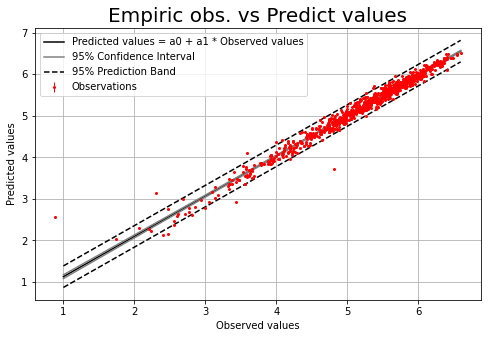

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y['LN_GS_cub_m']['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.347, median - 0.347, CI - [0.337-0.358]

SHAP-values for: DBH_cm: mean - 0.031, median - 0.029, CI - [0.023-0.038]

SHAP-values for: H_m: mean - 0.352, median - 0.352, CI - [0.334-0.374]

SHAP-values for: Origin_ID: mean - 0.009, median - 0.009, CI - [0.007-0.01]

SHAP-values for: Species_ID: mean - 0.019, median - 0.019, CI - [0.017-0.022]



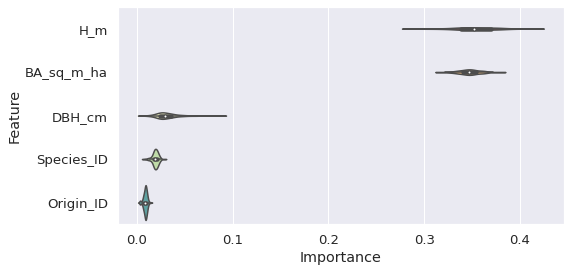

In [28]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['H_m', 'BA_sq_m_ha', 'DBH_cm', 'Species_ID', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [27]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 115.495, median: 115.5,
 pred. interval (P(0.025)-P(0.975)): 42.95-177.0, 
 conf. interval (p-value=0.95): 73.693-162.683 
***
Aggregate bias statistic: 
 mean: 0.001, median: 0.001,
 pred. interval (P(0.025)-P(0.975)): -0.025-0.022, 
 conf. interval (p-value=0.95): -0.009-0.01 
***
Aggregate RMSE statistic: 
 mean: 0.132, median: 0.122, pred. interval (P(0.025)-P(0.975)): 0.098-0.192, 
 conf. interval (p-value=0.95): 0.108-0.165 
***
Aggregate MSE statistic: 
 mean: 0.018, median: 0.015, pred. interval (P(0.025)-P(0.975)): 0.01-0.037, 
 conf. interval (p-value=0.95): 0.012-0.027 
***
Aggregate R^2 statistic: 
 mean: 0.974, median: 0.978, pred. interval (P(0.025)-P(0.975)): 0.951-0.986, 
 conf. interval (p-value=0.95): 0.963-0.982 
***
Aggregate bias(%) statistic: 
 mean: 0.014, median: 0.001, pred. interval (P(0.025)-P(0.975)): -0.479-0.43, 
 conf. interval (p-value=0.95): -0.179-0.203 
***
Aggregate RMSE(%) statistic: 
 mean: 

# ***Creating final XGBoost model using all obs. for its training***

In [29]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [30]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [31]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.17393
[1]	validation_0-rmse:3.67691
[2]	validation_0-rmse:3.23614
[3]	validation_0-rmse:2.85061
[4]	validation_0-rmse:2.51049
[5]	validation_0-rmse:2.21099
[6]	validation_0-rmse:1.95006
[7]	validation_0-rmse:1.72010


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51612
[9]	validation_0-rmse:1.33900
[10]	validation_0-rmse:1.18151
[11]	validation_0-rmse:1.04287
[12]	validation_0-rmse:0.92149
[13]	validation_0-rmse:0.81433
[14]	validation_0-rmse:0.72112
[15]	validation_0-rmse:0.63856
[16]	validation_0-rmse:0.56581
[17]	validation_0-rmse:0.50315
[18]	validation_0-rmse:0.44747
[19]	validation_0-rmse:0.39785
[20]	validation_0-rmse:0.35576
[21]	validation_0-rmse:0.31870
[22]	validation_0-rmse:0.28684
[23]	validation_0-rmse:0.25930
[24]	validation_0-rmse:0.23492
[25]	validation_0-rmse:0.21412
[26]	validation_0-rmse:0.19633
[27]	validation_0-rmse:0.18053
[28]	validation_0-rmse:0.16721
[29]	validation_0-rmse:0.15633
[30]	validation_0-rmse:0.14713
[31]	validation_0-rmse:0.14000
[32]	validation_0-rmse:0.13305
[33]	validation_0-rmse:0.12768
[34]	validation_0-rmse:0.12280
[35]	validation_0-rmse:0.11894
[36]	validation_0-rmse:0.11599
[37]	validation_0-rmse:0.11309
[38]	validation_0-rmse:0.11062
[39]	validation_0-rmse:0.10862
[40]	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [32]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 177


In [33]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

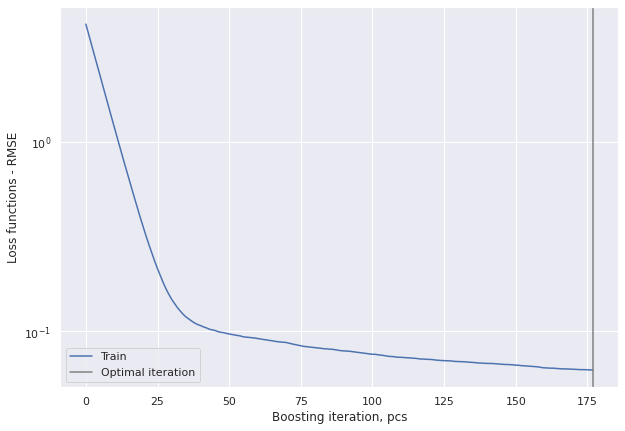

In [34]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [35]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.01
RMSE: 0.1
Relative RMSE(%):  1.210
MSE: 0.0
R square: 99.4%


In [36]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.994
Uncertainty
a0: 0.037+/-0.013
a1: 0.9929+/-0.0025


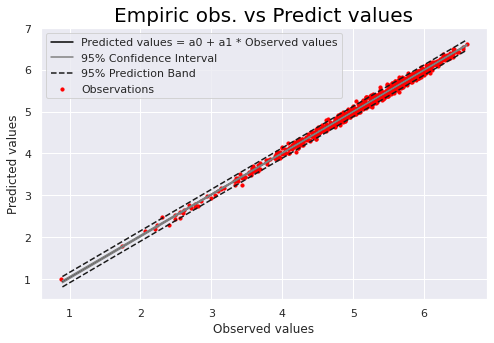

In [50]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.9, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

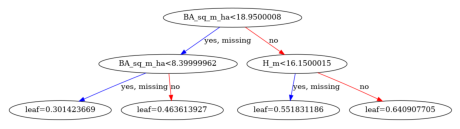

In [38]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [18, 45]
plt.show()

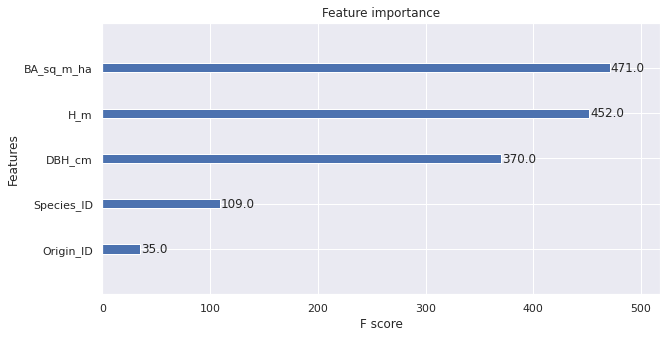

In [40]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

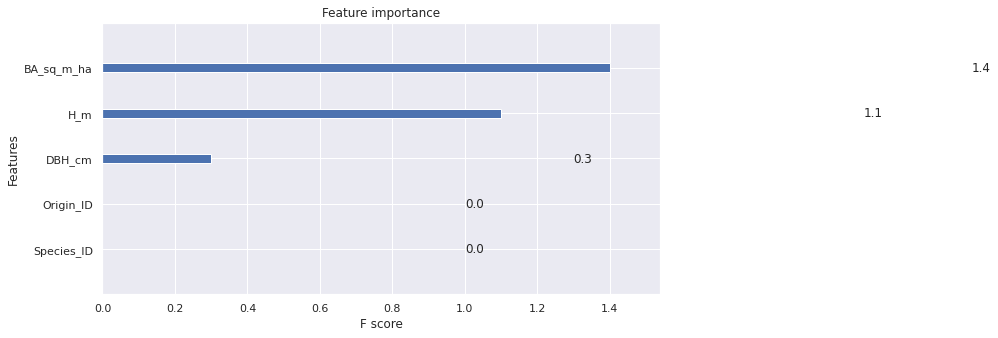

In [42]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

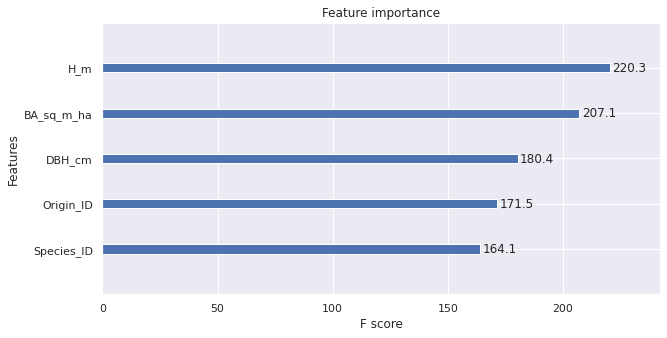

In [43]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [44]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


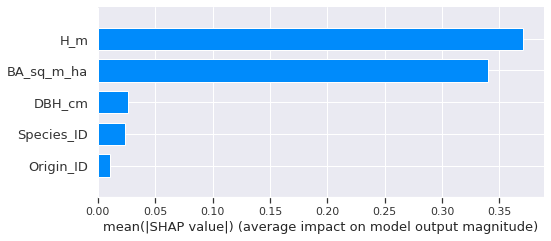

In [45]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

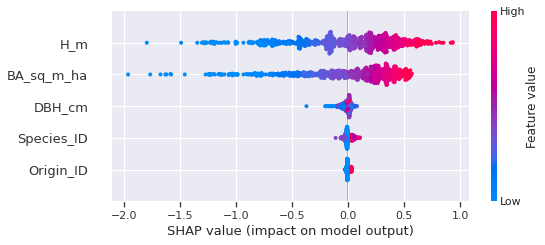

In [46]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

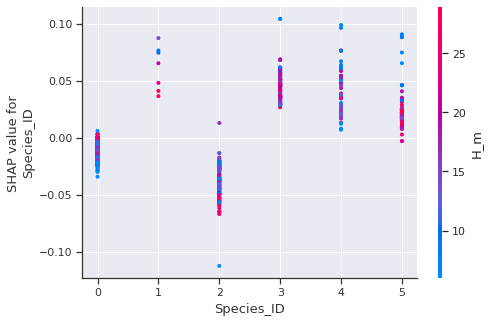

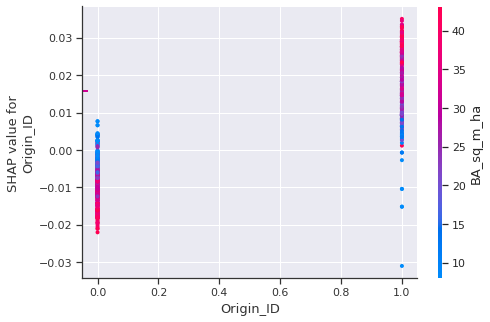

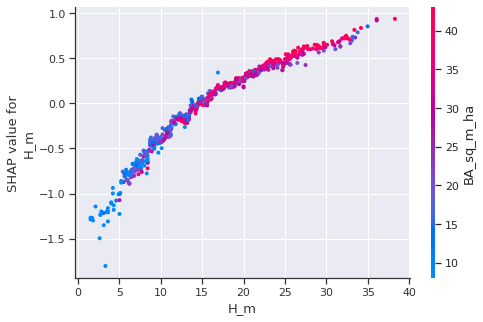

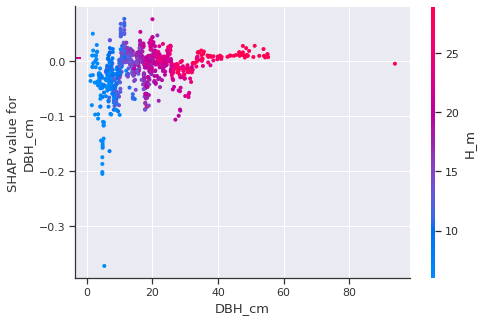

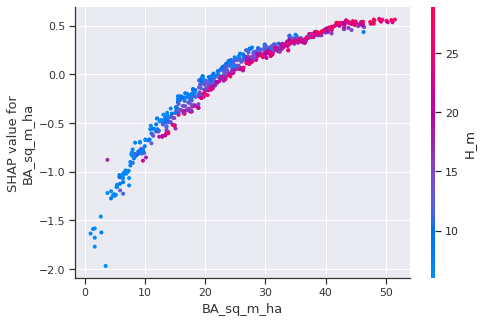

In [47]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [48]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/01_LN_CS_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/01_LN_CS_other_authors_XGB_model.txt")